# Essai sur l'analyse des crises foncières rurales en Côte d'Ivoire


**Dirigé par Professeur KOUAKOU Auguste Konan**

**Directeur UFR Sciences Économiques et de Gestion, Université Jean Lorougnon Guédé de Daloa**

**Maître de Conférences Agrégé, Sciences Économiques**

*_Par Kouassi Sylvain ASSIENIN*


**Data Science PhD Candidate in Economics**

**Université Jean Lorougnon GUÉDÉ x Université Paris 1 Panthéon-Sorbonne**

# Objectifs de la recherche

### Analyser les crises foncières rurales en Côte d'Ivoire

De facon spécifique, il s'agira de :



****Prédire les crises foncières rurales****

****Analyser les déterminants des crises foncières rurales****

****Quantifier les effets de ces déterminants par l'approche SHAP Values****

## Load librairies and Data

In [1]:
# I. Import de librairies
import pandas as pd            
from sklearn.model_selection import train_test_split
import numpy as np
from pandas import DataFrame
import seaborn as sns
import dython
from dython.nominal import associations
import matplotlib.pyplot as plt
import sys
import warnings
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# II. Data Management : Chargement de la base de données et sélection des variables théoriquement pertinentes
df_ = pd.read_excel("assienindata.xlsx")

print('Dimensions de la table des données:', df_.shape)

#____________________________________________________________
# Donner quelques infos sur les types de colonnes et le nombre de valeurs nulles
tab_info=pd.DataFrame(df_.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df_.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_.isnull().sum()/df_.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)
#
print("______________________________________________________________________")
# Afficher les premières lignes
display(df_[:5])

Dimensions de la table des données: (35356, 255)


,vague,grappe,menage,s16aq02,s16a01a,s16aq03,s16a01b,s16aq04,s16aq05,s16aq06,...,type_csp,volhor,salaire,emploi_sec,sectins_sec,csp_sec,volhor_sec,salaire_sec,bank,_merge
column type,int64,int64,int64,float64,object,float64,object,float64,object,float64,...,object,float64,float64,object,object,object,float64,float64,object,object
null values (nb),0,0,0,14292,14292,14292,14292,14293,14293,17006,...,10582,15418,30498,0,32010,32010,32012,34804,0,0
null values (%),0.0,0.0,0.0,40.423125,40.423125,40.423125,40.423125,40.425953,40.425953,48.099333,...,29.929856,43.607874,86.259758,0.0,90.53626,90.53626,90.541917,98.438737,0.0,0.0


______________________________________________________________________


,vague,grappe,menage,s16aq02,s16a01a,s16aq03,s16a01b,s16aq04,s16aq05,s16aq06,...,type_csp,volhor,salaire,emploi_sec,sectins_sec,csp_sec,volhor_sec,salaire_sec,bank,_merge
0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ouvrier,3120.0,2040000.0,Non,NaN,NaN,NaN,NaN,Oui,using only (2)
1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Non,NaN,NaN,NaN,NaN,Oui,using only (2)
2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Non,NaN,NaN,NaN,NaN,Oui,using only (2)
3,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Patron,3600.0,NaN,Non,NaN,NaN,NaN,NaN,Oui,using only (2)
4,1,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Non,NaN,NaN,NaN,NaN,Non,using only (2)


In [3]:
df_.isnull().sum()

vague              0
grappe             0
menage             0
s16aq02        14292
s16a01a        14292
               ...  
csp_sec        32010
volhor_sec     32012
salaire_sec    34804
bank               0
_merge             0
Length: 255, dtype: int64

In [4]:
# Variables théoriquement pertinentes
df__ = df_.copy()
df__.head()

,vague,grappe,menage,s16aq02,s16a01a,s16aq03,s16a01b,s16aq04,s16aq05,s16aq06,...,type_csp,volhor,salaire,emploi_sec,sectins_sec,csp_sec,volhor_sec,salaire_sec,bank,_merge
0,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ouvrier,3120.0,2040000.0,Non,NaN,NaN,NaN,NaN,Oui,using only (2)
1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Non,NaN,NaN,NaN,NaN,Oui,using only (2)
2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Non,NaN,NaN,NaN,NaN,Oui,using only (2)
3,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Patron,3600.0,NaN,Non,NaN,NaN,NaN,NaN,Oui,using only (2)
4,1,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Non,NaN,NaN,NaN,NaN,Non,using only (2)


In [5]:
df__ = df_[['s16aq05','s16aq07','s16aq08','s16aq09a','s16aq10', 's16aq12','s16aq13','s16aq15','s16aq18','s16aq19','s16aq20','zae','zone','culture','sousregion','milieu','sexe','age','mstat','sitmat','religion','nation','educ_hi','diplome','telpor','type_branche','internet','type_csp','bank','classe_diplome']]

df__.head()

,s16aq05,s16aq07,s16aq08,s16aq09a,s16aq10,s16aq12,s16aq13,s16aq15,s16aq18,s16aq19,...,religion,nation,educ_hi,diplome,telpor,type_branche,internet,type_csp,bank,classe_diplome
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Musulman,CIV,Secondaire,CEPE,Oui,NaN,Oui,Ouvrier,Oui,CEPE
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Musulman,CIV,Secondaire,CEPE,Oui,NaN,Oui,NaN,Oui,CEPE
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Musulman,CIV,Secondaire,CEPE,Oui,NaN,Oui,NaN,Oui,CEPE
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Musulman,Autres,Secondaire,BT,Oui,Autres,Oui,Patron,Oui,Secondaire
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Chrétien,CIV,Aucun,Aucun,Oui,NaN,Oui,NaN,Non,Aucun


In [6]:
df__.isna().sum()

s16aq05           14293
s16aq07           14292
s16aq08           14332
s16aq09a          14296
s16aq10           14293
s16aq12           17620
s16aq13           17620
s16aq15           17620
s16aq18           14293
s16aq19           14293
s16aq20           14293
zae                   0
zone                  0
culture           14332
sousregion            0
milieu                0
sexe                  0
age                   0
mstat                 0
sitmat                0
religion              0
nation                0
educ_hi               0
diplome               0
telpor                0
type_branche      10583
internet              0
type_csp          10582
bank                  0
classe_diplome        0
dtype: int64

In [7]:
# Renommer les colonnes selon le questionnaire de l'ENV-18
df__ = df__.rename(columns = {'s16aq05': 'mode_gestion','s16aq07': 'nombre_cultures_parcelle','s16aq08': 'principale_culture','s16aq09a': 'superficie_parcelle', 's16aq10': 'mode_occupation', 's16aq12': 'mode_acquisition', 's16aq13': 'document_legal', 's16aq15': 'risque_desaccord','s16aq18': 'type_sol','s16aq19':'topographie_parcelle','s16aq20':'fertilité_sol','zae':'zone_agroécologique','sousregion':'departement_résidence','milieu':'milieu_résidence','sexe':'genre','age':'age','mstat':'situation_matrimoniale','religion':'réligion','nation':'nationalité','educ_scol':'education_courante','educ_hi':'education_achevée','diplome':'diplôme','telpor':'téléphone_portable','internet':'accès_internet','bank':'compte_bancaire'})
df__

,mode_gestion,nombre_cultures_parcelle,principale_culture,superficie_parcelle,mode_occupation,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,...,réligion,nationalité,education_achevée,diplôme,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Musulman,CIV,Secondaire,CEPE,Oui,NaN,Oui,Ouvrier,Oui,CEPE
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Musulman,CIV,Secondaire,CEPE,Oui,NaN,Oui,NaN,Oui,CEPE
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Musulman,CIV,Secondaire,CEPE,Oui,NaN,Oui,NaN,Oui,CEPE
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Musulman,Autres,Secondaire,BT,Oui,Autres,Oui,Patron,Oui,Secondaire
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Chrétien,CIV,Aucun,Aucun,Oui,NaN,Oui,NaN,Non,Aucun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Chrétien,CIV,Superieur,DEUG,Oui,NaN,Oui,NaN,Oui,Superieur
35352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Chrétien,CIV,Secondaire,BT,Oui,NaN,Oui,NaN,Oui,Secondaire
35353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Chrétien,CIV,Superieur,Master/DEA,Oui,NaN,Oui,NaN,Oui,Superieur
35354,Individuelle,2.0,Manioc,0.5,Pret gratuit,NaN,NaN,NaN,Argileux,Plaine,...,Animiste,CIV,Primaire,Aucun,Oui,Agriculture,Non,Patron,Non,Aucun


In [8]:
#Recherche de non-valeurs
df__.isnull().sum()

mode_gestion                14293
nombre_cultures_parcelle    14292
principale_culture          14332
superficie_parcelle         14296
mode_occupation             14293
mode_acquisition            17620
document_legal              17620
risque_desaccord            17620
type_sol                    14293
topographie_parcelle        14293
fertilité_sol               14293
zone_agroécologique             0
zone                            0
culture                     14332
departement_résidence           0
milieu_résidence                0
genre                           0
age                             0
situation_matrimoniale          0
sitmat                          0
réligion                        0
nationalité                     0
education_achevée               0
diplôme                         0
téléphone_portable              0
type_branche                10583
accès_internet                  0
type_csp                    10582
compte_bancaire                 0
classe_diplome

In [9]:
df__['risque_desaccord'].unique()

array([nan, 'Non', 'Oui'], dtype=object)

In [10]:
df__ = df__.dropna(subset=['risque_desaccord'])
df__

,mode_gestion,nombre_cultures_parcelle,principale_culture,superficie_parcelle,mode_occupation,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,...,réligion,nationalité,education_achevée,diplôme,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome
124,Individuelle,3.0,Cacao,1.5,Proprietaire,Heritage,Aucun,Non,Sableux,Plaine,...,Sans réligion,CIV,Primaire,Aucun,Oui,Agriculture,Non,Patron,Oui,Aucun
125,Individuelle,3.0,Cacao,1.5,Proprietaire,Heritage,Aucun,Non,Sableux,Plaine,...,Sans réligion,CIV,Aucun,Aucun,Oui,NaN,Non,NaN,Oui,Aucun
126,Individuelle,1.0,Cacao,5.5,Proprietaire,Achat,Convention de vente,Non,Sableux,Pente raide,...,Chrétien,CIV,Secondaire,CEPE,Oui,Agriculture,Oui,Patron,Oui,CEPE
127,Individuelle,1.0,Cacao,5.5,Proprietaire,Achat,Convention de vente,Non,Sableux,Pente raide,...,Chrétien,CIV,Aucun,Aucun,Non,NaN,Non,NaN,Oui,Aucun
128,Individuelle,1.0,Anacarde,2.0,Proprietaire,Achat,Convention de vente,Non,Sableux,Plaine,...,Chrétien,CIV,Superieur,Licence,Oui,NaN,Oui,NaN,Oui,Superieur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35346,Individuelle,2.0,Manioc,0.5,Proprietaire,Heritage,Aucun,Non,Argileux,Plaine,...,Chrétien,CIV,Aucun,Aucun,Non,NaN,Non,NaN,Non,Aucun
35347,Individuelle,2.0,Manioc,0.5,Proprietaire,Heritage,Aucun,Non,Argileux,Plaine,...,Chrétien,CIV,Aucun,Aucun,Oui,Agriculture,Non,aide familiale,Non,Aucun
35348,Individuelle,1.0,Cacao,3.5,Proprietaire,Heritage,Aucun,Non,Argileux,Pente douce,...,Chrétien,Autres,Aucun,Aucun,Oui,Agriculture,Non,Patron,Oui,Aucun
35349,Individuelle,1.0,Cacao,3.5,Proprietaire,Heritage,Aucun,Non,Argileux,Pente douce,...,Chrétien,Autres,Aucun,Aucun,Oui,NaN,Non,NaN,Non,Aucun


In [11]:
df__ = df__.drop(['mode_occupation'], axis=1)

In [12]:
df__.shape

(17736, 29)

In [13]:
df__['risque_desaccord'].unique()

array(['Non', 'Oui'], dtype=object)

In [14]:
df__['mode_gestion'].unique()

array(['Individuelle', 'Collective'], dtype=object)

In [15]:
df__['principale_culture'].unique()

array(['Cacao', 'Anacarde', 'Hevea', 'Cafe', 'Autre', 'Riz Paddy',
       'Gombo', 'Igname', 'Coton', 'Arachide', 'Maïs', 'Chou', 'Manioc',
       nan, 'Palmier', 'Patate douce', 'Aubergine', 'Piment', 'Sorgho',
       'Radis', 'Mil', 'Sesame', 'Niebe', 'Gingembre', 'Tomate', 'Agrume',
       'Laitue', 'Haricot', 'Manguier', 'Oignon', 'Pomme de terre',
       'Fonio', 'Pasteque', 'Poivron', 'Taro', 'Jaxatu', 'Oseille',
       'Carotte', 'Concombre', 'Betterave', 'Epinard'], dtype=object)

In [16]:
df__['culture'].unique()

array(['industrielle', 'Autres', 'vivriere', nan], dtype=object)

In [17]:
df__['mode_acquisition'].unique()

array(['Heritage', 'Achat', 'Don', 'Mariage', 'Autre'], dtype=object)

In [18]:
df__['document_legal'].unique()

array(['Aucun', 'Convention de vente', 'Procès verbal', 'Titre foncier',
       'Autre', "Permis d'exploiter", 'Bail'], dtype=object)

In [19]:
df__['education_achevée'].unique()

array(['Primaire', 'Aucun', 'Secondaire', 'Superieur', 'Postsecondaire',
       'Maternel'], dtype=object)

In [20]:
df__['nationalité'].unique()

array(['CIV', 'Burkina', 'Autres'], dtype=object)

In [21]:
df__.shape

(17736, 29)

In [22]:
df__.isnull().sum()

mode_gestion                   0
nombre_cultures_parcelle       0
principale_culture            33
superficie_parcelle            3
mode_acquisition               0
document_legal                 0
risque_desaccord               0
type_sol                       0
topographie_parcelle           0
fertilité_sol                  0
zone_agroécologique            0
zone                           0
culture                       33
departement_résidence          0
milieu_résidence               0
genre                          0
age                            0
situation_matrimoniale         0
sitmat                         0
réligion                       0
nationalité                    0
education_achevée              0
diplôme                        0
téléphone_portable             0
type_branche                4165
accès_internet                 0
type_csp                    4165
compte_bancaire                0
classe_diplome                 0
dtype: int64

In [23]:
df__ = df__.dropna(subset=['type_csp'])
df__

,mode_gestion,nombre_cultures_parcelle,principale_culture,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,...,réligion,nationalité,education_achevée,diplôme,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome
124,Individuelle,3.0,Cacao,1.5,Heritage,Aucun,Non,Sableux,Plaine,Moyenne,...,Sans réligion,CIV,Primaire,Aucun,Oui,Agriculture,Non,Patron,Oui,Aucun
126,Individuelle,1.0,Cacao,5.5,Achat,Convention de vente,Non,Sableux,Pente raide,Bonne,...,Chrétien,CIV,Secondaire,CEPE,Oui,Agriculture,Oui,Patron,Oui,CEPE
130,Individuelle,1.0,Anacarde,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,...,Sans réligion,CIV,Aucun,Aucun,Non,Autres,Non,Ouvrier,Non,Aucun
133,Individuelle,1.0,Anacarde,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,...,Chrétien,CIV,Primaire,Aucun,Non,Autres,Non,aide familiale,Non,Aucun
134,Individuelle,1.0,Anacarde,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,...,Chrétien,CIV,Secondaire,Bac,Oui,Autres,Oui,cadre,Oui,Secondaire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35344,Individuelle,1.0,Cacao,1.0,Heritage,Aucun,Non,Sableux,Pente douce,Moyenne,...,Sans réligion,CIV,Primaire,Aucun,Non,Agriculture,Non,aide familiale,Non,Aucun
35345,Individuelle,2.0,Manioc,0.5,Heritage,Aucun,Non,Argileux,Plaine,Moyenne,...,Chrétien,CIV,Primaire,Aucun,Oui,Agriculture,Non,Patron,Oui,Aucun
35347,Individuelle,2.0,Manioc,0.5,Heritage,Aucun,Non,Argileux,Plaine,Moyenne,...,Chrétien,CIV,Aucun,Aucun,Oui,Agriculture,Non,aide familiale,Non,Aucun
35348,Individuelle,1.0,Cacao,3.5,Heritage,Aucun,Non,Argileux,Pente douce,Moyenne,...,Chrétien,Autres,Aucun,Aucun,Oui,Agriculture,Non,Patron,Oui,Aucun


In [24]:
df__.culture

124      industrielle
126      industrielle
130      industrielle
133      industrielle
134      industrielle
             ...     
35344    industrielle
35345        vivriere
35347        vivriere
35348    industrielle
35355    industrielle
Name: culture, Length: 13571, dtype: object

In [25]:
df__.shape

(13571, 29)

In [26]:
df__.nunique()

mode_gestion                  2
nombre_cultures_parcelle      5
principale_culture           36
superficie_parcelle         353
mode_acquisition              5
document_legal                7
risque_desaccord              2
type_sol                      5
topographie_parcelle          6
fertilité_sol                 3
zone_agroécologique           6
zone                          4
culture                       3
departement_résidence       108
milieu_résidence              2
genre                         2
age                          80
situation_matrimoniale        6
sitmat                        4
réligion                      5
nationalité                   3
education_achevée             6
diplôme                      11
téléphone_portable            2
type_branche                  3
accès_internet                2
type_csp                      5
compte_bancaire               2
classe_diplome                4
dtype: int64

In [27]:
df__.isna().sum()

mode_gestion                 0
nombre_cultures_parcelle     0
principale_culture          27
superficie_parcelle          1
mode_acquisition             0
document_legal               0
risque_desaccord             0
type_sol                     0
topographie_parcelle         0
fertilité_sol                0
zone_agroécologique          0
zone                         0
culture                     27
departement_résidence        0
milieu_résidence             0
genre                        0
age                          0
situation_matrimoniale       0
sitmat                       0
réligion                     0
nationalité                  0
education_achevée            0
diplôme                      0
téléphone_portable           0
type_branche                 0
accès_internet               0
type_csp                     0
compte_bancaire              0
classe_diplome               0
dtype: int64

In [28]:
df__['principale_culture'].unique()

array(['Cacao', 'Anacarde', 'Hevea', 'Cafe', 'Autre', 'Riz Paddy',
       'Gombo', 'Igname', 'Coton', 'Arachide', 'Maïs', 'Chou', 'Manioc',
       nan, 'Palmier', 'Patate douce', 'Aubergine', 'Piment', 'Mil',
       'Sesame', 'Niebe', 'Sorgho', 'Gingembre', 'Tomate', 'Agrume',
       'Laitue', 'Haricot', 'Manguier', 'Oignon', 'Pomme de terre',
       'Fonio', 'Pasteque', 'Poivron', 'Oseille', 'Concombre',
       'Betterave', 'Epinard'], dtype=object)

In [29]:
df__ = df__.dropna(subset=['principale_culture'])
df__

,mode_gestion,nombre_cultures_parcelle,principale_culture,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,...,réligion,nationalité,education_achevée,diplôme,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome
124,Individuelle,3.0,Cacao,1.5,Heritage,Aucun,Non,Sableux,Plaine,Moyenne,...,Sans réligion,CIV,Primaire,Aucun,Oui,Agriculture,Non,Patron,Oui,Aucun
126,Individuelle,1.0,Cacao,5.5,Achat,Convention de vente,Non,Sableux,Pente raide,Bonne,...,Chrétien,CIV,Secondaire,CEPE,Oui,Agriculture,Oui,Patron,Oui,CEPE
130,Individuelle,1.0,Anacarde,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,...,Sans réligion,CIV,Aucun,Aucun,Non,Autres,Non,Ouvrier,Non,Aucun
133,Individuelle,1.0,Anacarde,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,...,Chrétien,CIV,Primaire,Aucun,Non,Autres,Non,aide familiale,Non,Aucun
134,Individuelle,1.0,Anacarde,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,...,Chrétien,CIV,Secondaire,Bac,Oui,Autres,Oui,cadre,Oui,Secondaire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35344,Individuelle,1.0,Cacao,1.0,Heritage,Aucun,Non,Sableux,Pente douce,Moyenne,...,Sans réligion,CIV,Primaire,Aucun,Non,Agriculture,Non,aide familiale,Non,Aucun
35345,Individuelle,2.0,Manioc,0.5,Heritage,Aucun,Non,Argileux,Plaine,Moyenne,...,Chrétien,CIV,Primaire,Aucun,Oui,Agriculture,Non,Patron,Oui,Aucun
35347,Individuelle,2.0,Manioc,0.5,Heritage,Aucun,Non,Argileux,Plaine,Moyenne,...,Chrétien,CIV,Aucun,Aucun,Oui,Agriculture,Non,aide familiale,Non,Aucun
35348,Individuelle,1.0,Cacao,3.5,Heritage,Aucun,Non,Argileux,Pente douce,Moyenne,...,Chrétien,Autres,Aucun,Aucun,Oui,Agriculture,Non,Patron,Oui,Aucun


In [30]:
df__.isna().sum()

mode_gestion                0
nombre_cultures_parcelle    0
principale_culture          0
superficie_parcelle         1
mode_acquisition            0
document_legal              0
risque_desaccord            0
type_sol                    0
topographie_parcelle        0
fertilité_sol               0
zone_agroécologique         0
zone                        0
culture                     0
departement_résidence       0
milieu_résidence            0
genre                       0
age                         0
situation_matrimoniale      0
sitmat                      0
réligion                    0
nationalité                 0
education_achevée           0
diplôme                     0
téléphone_portable          0
type_branche                0
accès_internet              0
type_csp                    0
compte_bancaire             0
classe_diplome              0
dtype: int64

In [31]:
df__.nunique()

mode_gestion                  2
nombre_cultures_parcelle      5
principale_culture           36
superficie_parcelle         353
mode_acquisition              5
document_legal                7
risque_desaccord              2
type_sol                      5
topographie_parcelle          6
fertilité_sol                 3
zone_agroécologique           6
zone                          4
culture                       3
departement_résidence       108
milieu_résidence              2
genre                         2
age                          80
situation_matrimoniale        6
sitmat                        4
réligion                      5
nationalité                   3
education_achevée             6
diplôme                      11
téléphone_portable            2
type_branche                  3
accès_internet                2
type_csp                      5
compte_bancaire               2
classe_diplome                4
dtype: int64

In [32]:
df__ = df__.dropna(subset=['superficie_parcelle'])
df__

,mode_gestion,nombre_cultures_parcelle,principale_culture,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,...,réligion,nationalité,education_achevée,diplôme,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome
124,Individuelle,3.0,Cacao,1.5,Heritage,Aucun,Non,Sableux,Plaine,Moyenne,...,Sans réligion,CIV,Primaire,Aucun,Oui,Agriculture,Non,Patron,Oui,Aucun
126,Individuelle,1.0,Cacao,5.5,Achat,Convention de vente,Non,Sableux,Pente raide,Bonne,...,Chrétien,CIV,Secondaire,CEPE,Oui,Agriculture,Oui,Patron,Oui,CEPE
130,Individuelle,1.0,Anacarde,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,...,Sans réligion,CIV,Aucun,Aucun,Non,Autres,Non,Ouvrier,Non,Aucun
133,Individuelle,1.0,Anacarde,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,...,Chrétien,CIV,Primaire,Aucun,Non,Autres,Non,aide familiale,Non,Aucun
134,Individuelle,1.0,Anacarde,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,...,Chrétien,CIV,Secondaire,Bac,Oui,Autres,Oui,cadre,Oui,Secondaire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35344,Individuelle,1.0,Cacao,1.0,Heritage,Aucun,Non,Sableux,Pente douce,Moyenne,...,Sans réligion,CIV,Primaire,Aucun,Non,Agriculture,Non,aide familiale,Non,Aucun
35345,Individuelle,2.0,Manioc,0.5,Heritage,Aucun,Non,Argileux,Plaine,Moyenne,...,Chrétien,CIV,Primaire,Aucun,Oui,Agriculture,Non,Patron,Oui,Aucun
35347,Individuelle,2.0,Manioc,0.5,Heritage,Aucun,Non,Argileux,Plaine,Moyenne,...,Chrétien,CIV,Aucun,Aucun,Oui,Agriculture,Non,aide familiale,Non,Aucun
35348,Individuelle,1.0,Cacao,3.5,Heritage,Aucun,Non,Argileux,Pente douce,Moyenne,...,Chrétien,Autres,Aucun,Aucun,Oui,Agriculture,Non,Patron,Oui,Aucun


In [33]:
df__.isna().sum()

mode_gestion                0
nombre_cultures_parcelle    0
principale_culture          0
superficie_parcelle         0
mode_acquisition            0
document_legal              0
risque_desaccord            0
type_sol                    0
topographie_parcelle        0
fertilité_sol               0
zone_agroécologique         0
zone                        0
culture                     0
departement_résidence       0
milieu_résidence            0
genre                       0
age                         0
situation_matrimoniale      0
sitmat                      0
réligion                    0
nationalité                 0
education_achevée           0
diplôme                     0
téléphone_portable          0
type_branche                0
accès_internet              0
type_csp                    0
compte_bancaire             0
classe_diplome              0
dtype: int64

In [34]:
df__.head()

,mode_gestion,nombre_cultures_parcelle,principale_culture,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,...,réligion,nationalité,education_achevée,diplôme,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome
124,Individuelle,3.0,Cacao,1.5,Heritage,Aucun,Non,Sableux,Plaine,Moyenne,...,Sans réligion,CIV,Primaire,Aucun,Oui,Agriculture,Non,Patron,Oui,Aucun
126,Individuelle,1.0,Cacao,5.5,Achat,Convention de vente,Non,Sableux,Pente raide,Bonne,...,Chrétien,CIV,Secondaire,CEPE,Oui,Agriculture,Oui,Patron,Oui,CEPE
130,Individuelle,1.0,Anacarde,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,...,Sans réligion,CIV,Aucun,Aucun,Non,Autres,Non,Ouvrier,Non,Aucun
133,Individuelle,1.0,Anacarde,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,...,Chrétien,CIV,Primaire,Aucun,Non,Autres,Non,aide familiale,Non,Aucun
134,Individuelle,1.0,Anacarde,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,...,Chrétien,CIV,Secondaire,Bac,Oui,Autres,Oui,cadre,Oui,Secondaire


In [35]:
df__.shape

(13543, 29)

In [36]:
# Créer une fonction qui détermine si la valeur en paramètre est manquante:
def num_missing(x):
    return sum(x.isnull())
# On applique cette fonction pour chaque colonne:
print("Valeurs manquantes par colonne:")
print(df__.apply(num_missing, axis=0)) #axis=0 définit que la fonction sera bien appliquée sur chaque colonne
# Puis application pour chaque ligne:
print("\nValeurs manquantes par ligne:")
print(df__.apply(num_missing, axis=1).head()) #axis=1 définit que la fonction sera bien appliquée sur chaque ligne

Valeurs manquantes par colonne:
mode_gestion                0
nombre_cultures_parcelle    0
principale_culture          0
superficie_parcelle         0
mode_acquisition            0
document_legal              0
risque_desaccord            0
type_sol                    0
topographie_parcelle        0
fertilité_sol               0
zone_agroécologique         0
zone                        0
culture                     0
departement_résidence       0
milieu_résidence            0
genre                       0
age                         0
situation_matrimoniale      0
sitmat                      0
réligion                    0
nationalité                 0
education_achevée           0
diplôme                     0
téléphone_portable          0
type_branche                0
accès_internet              0
type_csp                    0
compte_bancaire             0
classe_diplome              0
dtype: int64

Valeurs manquantes par ligne:
124    0
126    0
130    0
133    0
134    0
dtype: in

In [37]:
df__.nunique()

mode_gestion                  2
nombre_cultures_parcelle      5
principale_culture           36
superficie_parcelle         353
mode_acquisition              5
document_legal                7
risque_desaccord              2
type_sol                      5
topographie_parcelle          6
fertilité_sol                 3
zone_agroécologique           6
zone                          4
culture                       3
departement_résidence       108
milieu_résidence              2
genre                         2
age                          80
situation_matrimoniale        6
sitmat                        4
réligion                      5
nationalité                   3
education_achevée             6
diplôme                      11
téléphone_portable            2
type_branche                  3
accès_internet                2
type_csp                      5
compte_bancaire               2
classe_diplome                4
dtype: int64

In [38]:
df__['risque_desaccord'].value_counts()

Non    13095
Oui      448
Name: risque_desaccord, dtype: int64

Class 0: 13095
Class 1: 448
Proportion: 0.03 : 0


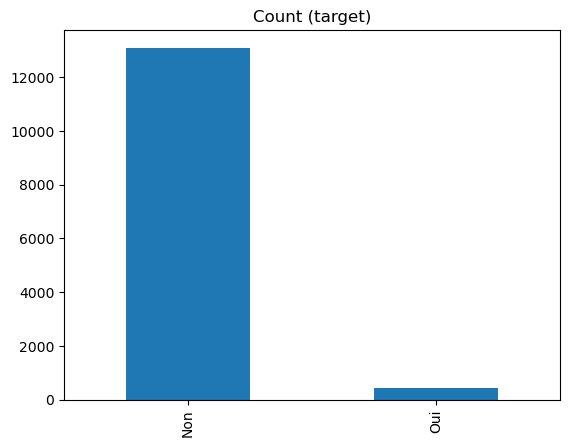

In [39]:
risque_count = df__.risque_desaccord.value_counts()
print('Class 0:', risque_count["Non"])
print('Class 1:', risque_count["Oui"])
print('Proportion:', round(risque_count["Oui"] / risque_count["Non"], 2), ': 0')

risque_count.plot(kind='bar', title='Count (target)');

In [40]:
print(df__['risque_desaccord'].value_counts())
print('\n')
print(df__['risque_desaccord'].value_counts(normalize=True))

Non    13095
Oui      448
Name: risque_desaccord, dtype: int64


Non    0.96692
Oui    0.03308
Name: risque_desaccord, dtype: float64


In [41]:
print(df__['mode_gestion'].value_counts())
print('\n')
print(df__['mode_gestion'].value_counts(normalize=True))

Individuelle    11895
Collective       1648
Name: mode_gestion, dtype: int64


Individuelle    0.878314
Collective      0.121686
Name: mode_gestion, dtype: float64


In [42]:
print(df__['principale_culture'].value_counts())
print('\n')
print(df__['principale_culture'].value_counts(normalize=True))

Cacao             4039
Anacarde          2545
Igname            1840
Riz Paddy         1148
Maïs               831
Hevea              677
Manioc             535
Cafe               447
Arachide           400
Coton              342
Palmier            202
Autre              119
Mil                 82
Aubergine           55
Gombo               55
Sorgho              46
Piment              29
Tomate              28
Haricot             27
Manguier            19
Niebe               14
Patate douce        12
Chou                12
Gingembre            7
Agrume               7
Oignon               5
Fonio                3
Poivron              2
Concombre            2
Oseille              2
Sesame               2
Pasteque             2
Pomme de terre       2
Laitue               2
Epinard              2
Betterave            1
Name: principale_culture, dtype: int64


Cacao             0.298235
Anacarde          0.187920
Igname            0.135864
Riz Paddy         0.084767
Maïs              0.061

In [43]:
print(df__['culture'].value_counts())
print('\n')
print(df__['culture'].value_counts(normalize=True))

industrielle    8278
vivriere        5146
Autres           119
Name: culture, dtype: int64


industrielle    0.611238
vivriere        0.379975
Autres          0.008787
Name: culture, dtype: float64


In [44]:
print(df__['departement_résidence'].value_counts())
print('\n')
print(df__['departement_résidence'].value_counts(normalize=True))

SAN-PEDR    316
sassandr    291
duekoue     286
korhogo     284
bocanda     272
           ... 
bettie       30
100          27
adiake       27
Abidjan      21
GRAND-BA     17
Name: departement_résidence, Length: 108, dtype: int64


SAN-PEDR    0.023333
sassandr    0.021487
duekoue     0.021118
korhogo     0.020970
bocanda     0.020084
              ...   
bettie      0.002215
100         0.001994
adiake      0.001994
Abidjan     0.001551
GRAND-BA    0.001255
Name: departement_résidence, Length: 108, dtype: float64


In [45]:
print(df__['mode_acquisition'].value_counts())
print('\n')
print(df__['mode_acquisition'].value_counts(normalize=True))

Heritage    8462
Achat       2453
Don         2003
Autre        325
Mariage      300
Name: mode_acquisition, dtype: int64


Heritage    0.624825
Achat       0.181127
Don         0.147899
Autre       0.023998
Mariage     0.022152
Name: mode_acquisition, dtype: float64


In [46]:
print(df__['document_legal'].value_counts())
print('\n')
print(df__['document_legal'].value_counts(normalize=True))

Aucun                  10682
Convention de vente     1138
Titre foncier            772
Procès verbal            482
Permis d'exploiter       330
Autre                    134
Bail                       5
Name: document_legal, dtype: int64


Aucun                  0.788747
Convention de vente    0.084029
Titre foncier          0.057004
Procès verbal          0.035590
Permis d'exploiter     0.024367
Autre                  0.009894
Bail                   0.000369
Name: document_legal, dtype: float64


In [47]:
print(df__['type_sol'].value_counts())
print('\n')
print(df__['type_sol'].value_counts(normalize=True))

Sableux     5925
Argileux    3544
Limoneux    3159
Glacis       699
Autre        216
Name: type_sol, dtype: int64


Sableux     0.437495
Argileux    0.261685
Limoneux    0.233257
Glacis      0.051613
Autre       0.015949
Name: type_sol, dtype: float64


In [48]:
print(df__['topographie_parcelle'].value_counts())
print('\n')
print(df__['topographie_parcelle'].value_counts(normalize=True))

Plaine         9011
Pente douce    2921
Colline         822
Vallée          356
Pente raide     351
Autre            82
Name: topographie_parcelle, dtype: int64


Plaine         0.665362
Pente douce    0.215683
Colline        0.060696
Vallée         0.026287
Pente raide    0.025917
Autre          0.006055
Name: topographie_parcelle, dtype: float64


In [49]:
print(df__['fertilité_sol'].value_counts())
print('\n')
print(df__['fertilité_sol'].value_counts(normalize=True))

Bonne      7172
Moyenne    5621
Faible      750
Name: fertilité_sol, dtype: int64


Bonne      0.529572
Moyenne    0.415048
Faible     0.055379
Name: fertilité_sol, dtype: float64


In [50]:
print(df__['zone_agroécologique'].value_counts())
print('\n')
print(df__['zone_agroécologique'].value_counts(normalize=True))

Nord            4819
Centre-Ouest    2880
Centre          2282
Sud-Ouest       2178
Sud-Est         1373
Abidjan           11
Name: zone_agroécologique, dtype: int64


Nord            0.355830
Centre-Ouest    0.212656
Centre          0.168500
Sud-Ouest       0.160821
Sud-Est         0.101381
Abidjan         0.000812
Name: zone_agroécologique, dtype: float64


In [51]:
print(df__['zone'].value_counts())
print('\n')
print(df__['zone'].value_counts(normalize=True))

Nord            4819
Sud             3562
Centre-Ouest    2880
Centre          2282
Name: zone, dtype: int64


Nord            0.355830
Sud             0.263014
Centre-Ouest    0.212656
Centre          0.168500
Name: zone, dtype: float64


In [52]:
print(df__['milieu_résidence'].value_counts())
print('\n')
print(df__['milieu_résidence'].value_counts(normalize=True))

Rural     11490
Urbain     2053
Name: milieu_résidence, dtype: int64


Rural     0.848409
Urbain    0.151591
Name: milieu_résidence, dtype: float64


In [53]:
print(df__['genre'].value_counts())
print('\n')
print(df__['genre'].value_counts(normalize=True))

Masculin    7306
Feminin     6237
Name: genre, dtype: int64


Masculin    0.539467
Feminin     0.460533
Name: genre, dtype: float64


In [54]:
print(df__['situation_matrimoniale'].value_counts())
print('\n')
print(df__['situation_matrimoniale'].value_counts(normalize=True))

Marié(e)       9024
Celibataire    3299
Veuf(ve)        545
Union libre     473
Séparé(e)       116
Divorcé(e)       86
Name: situation_matrimoniale, dtype: int64


Marié(e)       0.666322
Celibataire    0.243594
Veuf(ve)       0.040242
Union libre    0.034926
Séparé(e)      0.008565
Divorcé(e)     0.006350
Name: situation_matrimoniale, dtype: float64


In [55]:
print(df__['sitmat'].value_counts())
print('\n')
print(df__['sitmat'].value_counts(normalize=True))

Marié          9024
Célibataire    3299
Autres          747
Union libre     473
Name: sitmat, dtype: int64


Marié          0.666322
Célibataire    0.243594
Autres         0.055158
Union libre    0.034926
Name: sitmat, dtype: float64


In [56]:
print(df__['réligion'].value_counts())
print('\n')
print(df__['réligion'].value_counts(normalize=True))

Chrétien          5407
Musulman          5244
Sans réligion     1714
Animiste          1084
Autre réligion      94
Name: réligion, dtype: int64


Chrétien          0.399247
Musulman          0.387211
Sans réligion     0.126560
Animiste          0.080041
Autre réligion    0.006941
Name: réligion, dtype: float64


In [57]:
print(df__['nationalité'].value_counts())
print('\n')
print(df__['nationalité'].value_counts(normalize=True))

CIV        11452
Burkina     1718
Autres       373
Name: nationalité, dtype: int64


CIV        0.845603
Burkina    0.126855
Autres     0.027542
Name: nationalité, dtype: float64


In [58]:
print(df__['education_achevée'].value_counts())
print('\n')
print(df__['education_achevée'].value_counts(normalize=True))

Aucun             9318
Primaire          2621
Secondaire        1505
Postsecondaire      54
Superieur           43
Maternel             2
Name: education_achevée, dtype: int64


Aucun             0.688031
Primaire          0.193532
Secondaire        0.111128
Postsecondaire    0.003987
Superieur         0.003175
Maternel          0.000148
Name: education_achevée, dtype: float64


In [59]:
print(df__['diplôme'].value_counts())
print('\n')
print(df__['diplôme'].value_counts(normalize=True))

Aucun         11780
CEPE           1233
BEPC            344
Bac              93
DEUG             51
CAP              16
BT                9
Licence           7
Maitrise          5
Master/DEA        4
Doctorat          1
Name: diplôme, dtype: int64


Aucun         0.869822
CEPE          0.091043
BEPC          0.025401
Bac           0.006867
DEUG          0.003766
CAP           0.001181
BT            0.000665
Licence       0.000517
Maitrise      0.000369
Master/DEA    0.000295
Doctorat      0.000074
Name: diplôme, dtype: float64


In [60]:
print(df__['classe_diplome'].value_counts())
print('\n')
print(df__['classe_diplome'].value_counts(normalize=True))

Aucun         11780
CEPE           1233
Secondaire      462
Superieur        68
Name: classe_diplome, dtype: int64


Aucun         0.869822
CEPE          0.091043
Secondaire    0.034114
Superieur     0.005021
Name: classe_diplome, dtype: float64


In [61]:
print(df__['téléphone_portable'].value_counts())
print('\n')
print(df__['téléphone_portable'].value_counts(normalize=True))

Oui    8826
Non    4717
Name: téléphone_portable, dtype: int64


Oui    0.651702
Non    0.348298
Name: téléphone_portable, dtype: float64


In [62]:
print(df__['accès_internet'].value_counts())
print('\n')
print(df__['accès_internet'].value_counts(normalize=True))

Non    12822
Oui      721
Name: accès_internet, dtype: int64


Non    0.946762
Oui    0.053238
Name: accès_internet, dtype: float64


In [63]:
print(df__['type_branche'].value_counts())
print('\n')
print(df__['type_branche'].value_counts(normalize=True))

Agriculture     11734
Autres           1744
Elevagepeche       65
Name: type_branche, dtype: int64


Agriculture     0.866425
Autres          0.128775
Elevagepeche    0.004800
Name: type_branche, dtype: float64


In [64]:
print(df__['type_csp'].value_counts())
print('\n')
print(df__['type_csp'].value_counts(normalize=True))

Patron            7634
aide familiale    4844
Ouvrier            671
Aide menagère      354
cadre               40
Name: type_csp, dtype: int64


Patron            0.563686
aide familiale    0.357676
Ouvrier           0.049546
Aide menagère     0.026139
cadre             0.002954
Name: type_csp, dtype: float64


In [65]:
print(df__['compte_bancaire'].value_counts())
print('\n')
print(df__['compte_bancaire'].value_counts(normalize=True))

Non    8975
Oui    4568
Name: compte_bancaire, dtype: int64


Non    0.662704
Oui    0.337296
Name: compte_bancaire, dtype: float64


In [66]:
df__.head()

,mode_gestion,nombre_cultures_parcelle,principale_culture,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,...,réligion,nationalité,education_achevée,diplôme,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome
124,Individuelle,3.0,Cacao,1.5,Heritage,Aucun,Non,Sableux,Plaine,Moyenne,...,Sans réligion,CIV,Primaire,Aucun,Oui,Agriculture,Non,Patron,Oui,Aucun
126,Individuelle,1.0,Cacao,5.5,Achat,Convention de vente,Non,Sableux,Pente raide,Bonne,...,Chrétien,CIV,Secondaire,CEPE,Oui,Agriculture,Oui,Patron,Oui,CEPE
130,Individuelle,1.0,Anacarde,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,...,Sans réligion,CIV,Aucun,Aucun,Non,Autres,Non,Ouvrier,Non,Aucun
133,Individuelle,1.0,Anacarde,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,...,Chrétien,CIV,Primaire,Aucun,Non,Autres,Non,aide familiale,Non,Aucun
134,Individuelle,1.0,Anacarde,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,...,Chrétien,CIV,Secondaire,Bac,Oui,Autres,Oui,cadre,Oui,Secondaire


In [67]:
df__.dtypes

mode_gestion                 object
nombre_cultures_parcelle    float64
principale_culture           object
superficie_parcelle         float64
mode_acquisition             object
document_legal               object
risque_desaccord             object
type_sol                     object
topographie_parcelle         object
fertilité_sol                object
zone_agroécologique          object
zone                         object
culture                      object
departement_résidence        object
milieu_résidence             object
genre                        object
age                           int64
situation_matrimoniale       object
sitmat                       object
réligion                     object
nationalité                  object
education_achevée            object
diplôme                      object
téléphone_portable           object
type_branche                 object
accès_internet               object
type_csp                     object
compte_bancaire             

In [68]:
df__['mode_gestion'].value_counts()

Individuelle    11895
Collective       1648
Name: mode_gestion, dtype: int64

In [69]:
df__['mode_acquisition'].value_counts()

Heritage    8462
Achat       2453
Don         2003
Autre        325
Mariage      300
Name: mode_acquisition, dtype: int64

In [70]:
df__['document_legal'].value_counts()

Aucun                  10682
Convention de vente     1138
Titre foncier            772
Procès verbal            482
Permis d'exploiter       330
Autre                    134
Bail                       5
Name: document_legal, dtype: int64

In [71]:
df__['risque_desaccord'].value_counts()

Non    13095
Oui      448
Name: risque_desaccord, dtype: int64

In [72]:
df__.dtypes

mode_gestion                 object
nombre_cultures_parcelle    float64
principale_culture           object
superficie_parcelle         float64
mode_acquisition             object
document_legal               object
risque_desaccord             object
type_sol                     object
topographie_parcelle         object
fertilité_sol                object
zone_agroécologique          object
zone                         object
culture                      object
departement_résidence        object
milieu_résidence             object
genre                        object
age                           int64
situation_matrimoniale       object
sitmat                       object
réligion                     object
nationalité                  object
education_achevée            object
diplôme                      object
téléphone_portable           object
type_branche                 object
accès_internet               object
type_csp                     object
compte_bancaire             

In [73]:
# Comptez le nombre de lignes intégralement dupliquées
print(f"Il y a {df__.duplicated(keep=False).sum()} lignes intégralement dupliquées")

# Affichez les observations intégralement dupliquées
df__[df__.duplicated(keep=False)]

Il y a 79 lignes intégralement dupliquées


,mode_gestion,nombre_cultures_parcelle,principale_culture,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,...,réligion,nationalité,education_achevée,diplôme,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome
1508,Individuelle,1.0,Hevea,8.0,Achat,Titre foncier,Non,Sableux,Plaine,Bonne,...,Chrétien,CIV,Superieur,Bac,Oui,Autres,Oui,aide familiale,Oui,Secondaire
1511,Individuelle,1.0,Hevea,8.0,Achat,Titre foncier,Non,Sableux,Plaine,Bonne,...,Chrétien,CIV,Superieur,Bac,Oui,Autres,Oui,aide familiale,Oui,Secondaire
5002,Individuelle,1.0,Cacao,3.0,Don,Aucun,Non,Limoneux,Pente douce,Moyenne,...,Chrétien,CIV,Primaire,Aucun,Oui,Agriculture,Non,Patron,Oui,Aucun
5185,Individuelle,1.0,Anacarde,6.0,Heritage,Aucun,Non,Glacis,Plaine,Bonne,...,Sans réligion,CIV,Aucun,Aucun,Non,Agriculture,Non,aide familiale,Non,Aucun
5186,Individuelle,1.0,Anacarde,6.0,Heritage,Aucun,Non,Glacis,Plaine,Bonne,...,Sans réligion,CIV,Aucun,Aucun,Non,Agriculture,Non,aide familiale,Non,Aucun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32024,Individuelle,2.0,Autre,0.5,Don,Aucun,Non,Argileux,Vallée,Moyenne,...,Musulman,CIV,Aucun,Aucun,Non,Agriculture,Non,aide familiale,Non,Aucun
34419,Individuelle,1.0,Cacao,1.0,Achat,Convention de vente,Non,Argileux,Plaine,Bonne,...,Musulman,Burkina,Aucun,Aucun,Oui,Autres,Non,Patron,Non,Aucun
34420,Individuelle,1.0,Cacao,1.0,Achat,Convention de vente,Non,Argileux,Plaine,Bonne,...,Musulman,Burkina,Aucun,Aucun,Oui,Autres,Non,Patron,Non,Aucun
34759,Individuelle,1.0,Riz Paddy,2.0,Don,Aucun,Non,Limoneux,Pente douce,Moyenne,...,Sans réligion,CIV,Aucun,Aucun,Non,Agriculture,Non,aide familiale,Non,Aucun


In [74]:
df__['risque_desaccord'].unique()

array(['Non', 'Oui'], dtype=object)

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from imblearn import FunctionSampler  # to use a idendity sampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

In [76]:
columns_name = df__.columns
columns_name

Index(['mode_gestion', 'nombre_cultures_parcelle', 'principale_culture',
       'superficie_parcelle', 'mode_acquisition', 'document_legal',
       'risque_desaccord', 'type_sol', 'topographie_parcelle', 'fertilité_sol',
       'zone_agroécologique', 'zone', 'culture', 'departement_résidence',
       'milieu_résidence', 'genre', 'age', 'situation_matrimoniale', 'sitmat',
       'réligion', 'nationalité', 'education_achevée', 'diplôme',
       'téléphone_portable', 'type_branche', 'accès_internet', 'type_csp',
       'compte_bancaire', 'classe_diplome'],
      dtype='object')

In [77]:
df__ = df__.drop(['departement_résidence'], axis=1)

In [78]:
df__ = df__.drop(['diplôme'], axis=1)

In [79]:
df__ = df__.drop(['education_achevée'], axis=1)

In [80]:
df__ = df__.drop(['principale_culture'], axis=1)

In [81]:
df__.head()

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,situation_matrimoniale,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome
124,Individuelle,3.0,1.5,Heritage,Aucun,Non,Sableux,Plaine,Moyenne,Centre-Ouest,...,Marié(e),Marié,Sans réligion,CIV,Oui,Agriculture,Non,Patron,Oui,Aucun
126,Individuelle,1.0,5.5,Achat,Convention de vente,Non,Sableux,Pente raide,Bonne,Centre-Ouest,...,Marié(e),Marié,Chrétien,CIV,Oui,Agriculture,Oui,Patron,Oui,CEPE
130,Individuelle,1.0,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,Centre-Ouest,...,Celibataire,Célibataire,Sans réligion,CIV,Non,Autres,Non,Ouvrier,Non,Aucun
133,Individuelle,1.0,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,Centre-Ouest,...,Celibataire,Célibataire,Chrétien,CIV,Non,Autres,Non,aide familiale,Non,Aucun
134,Individuelle,1.0,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,Centre-Ouest,...,Marié(e),Marié,Chrétien,CIV,Oui,Autres,Oui,cadre,Oui,Secondaire


In [82]:
columns_name = df__.columns
columns_name

Index(['mode_gestion', 'nombre_cultures_parcelle', 'superficie_parcelle',
       'mode_acquisition', 'document_legal', 'risque_desaccord', 'type_sol',
       'topographie_parcelle', 'fertilité_sol', 'zone_agroécologique', 'zone',
       'culture', 'milieu_résidence', 'genre', 'age', 'situation_matrimoniale',
       'sitmat', 'réligion', 'nationalité', 'téléphone_portable',
       'type_branche', 'accès_internet', 'type_csp', 'compte_bancaire',
       'classe_diplome'],
      dtype='object')

## Data Preprocessing

In [83]:
df__.nunique()

mode_gestion                  2
nombre_cultures_parcelle      5
superficie_parcelle         353
mode_acquisition              5
document_legal                7
risque_desaccord              2
type_sol                      5
topographie_parcelle          6
fertilité_sol                 3
zone_agroécologique           6
zone                          4
culture                       3
milieu_résidence              2
genre                         2
age                          80
situation_matrimoniale        6
sitmat                        4
réligion                      5
nationalité                   3
téléphone_portable            2
type_branche                  3
accès_internet                2
type_csp                      5
compte_bancaire               2
classe_diplome                4
dtype: int64

In [84]:
df__.isna().sum()

mode_gestion                0
nombre_cultures_parcelle    0
superficie_parcelle         0
mode_acquisition            0
document_legal              0
risque_desaccord            0
type_sol                    0
topographie_parcelle        0
fertilité_sol               0
zone_agroécologique         0
zone                        0
culture                     0
milieu_résidence            0
genre                       0
age                         0
situation_matrimoniale      0
sitmat                      0
réligion                    0
nationalité                 0
téléphone_portable          0
type_branche                0
accès_internet              0
type_csp                    0
compte_bancaire             0
classe_diplome              0
dtype: int64

In [85]:
df__['Titre'] = np.where(df__['document_legal'] == 'Aucun', 'Aucun','Oui')
df__

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
124,Individuelle,3.0,1.5,Heritage,Aucun,Non,Sableux,Plaine,Moyenne,Centre-Ouest,...,Marié,Sans réligion,CIV,Oui,Agriculture,Non,Patron,Oui,Aucun,Aucun
126,Individuelle,1.0,5.5,Achat,Convention de vente,Non,Sableux,Pente raide,Bonne,Centre-Ouest,...,Marié,Chrétien,CIV,Oui,Agriculture,Oui,Patron,Oui,CEPE,Oui
130,Individuelle,1.0,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,Centre-Ouest,...,Célibataire,Sans réligion,CIV,Non,Autres,Non,Ouvrier,Non,Aucun,Oui
133,Individuelle,1.0,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,Centre-Ouest,...,Célibataire,Chrétien,CIV,Non,Autres,Non,aide familiale,Non,Aucun,Oui
134,Individuelle,1.0,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,Centre-Ouest,...,Marié,Chrétien,CIV,Oui,Autres,Oui,cadre,Oui,Secondaire,Oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35344,Individuelle,1.0,1.0,Heritage,Aucun,Non,Sableux,Pente douce,Moyenne,Centre-Ouest,...,Célibataire,Sans réligion,CIV,Non,Agriculture,Non,aide familiale,Non,Aucun,Aucun
35345,Individuelle,2.0,0.5,Heritage,Aucun,Non,Argileux,Plaine,Moyenne,Centre-Ouest,...,Célibataire,Chrétien,CIV,Oui,Agriculture,Non,Patron,Oui,Aucun,Aucun
35347,Individuelle,2.0,0.5,Heritage,Aucun,Non,Argileux,Plaine,Moyenne,Centre-Ouest,...,Célibataire,Chrétien,CIV,Oui,Agriculture,Non,aide familiale,Non,Aucun,Aucun
35348,Individuelle,1.0,3.5,Heritage,Aucun,Non,Argileux,Pente douce,Moyenne,Sud-Ouest,...,Marié,Chrétien,Autres,Oui,Agriculture,Non,Patron,Oui,Aucun,Aucun


In [86]:
print(df__['Titre'].value_counts())
print('\n')
print(df__['Titre'].value_counts(normalize=True))

Aucun    10682
Oui       2861
Name: Titre, dtype: int64


Aucun    0.788747
Oui      0.211253
Name: Titre, dtype: float64


In [87]:
df__ = df__.astype({"nombre_cultures_parcelle": int})
df__.head()

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
124,Individuelle,3,1.5,Heritage,Aucun,Non,Sableux,Plaine,Moyenne,Centre-Ouest,...,Marié,Sans réligion,CIV,Oui,Agriculture,Non,Patron,Oui,Aucun,Aucun
126,Individuelle,1,5.5,Achat,Convention de vente,Non,Sableux,Pente raide,Bonne,Centre-Ouest,...,Marié,Chrétien,CIV,Oui,Agriculture,Oui,Patron,Oui,CEPE,Oui
130,Individuelle,1,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,Centre-Ouest,...,Célibataire,Sans réligion,CIV,Non,Autres,Non,Ouvrier,Non,Aucun,Oui
133,Individuelle,1,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,Centre-Ouest,...,Célibataire,Chrétien,CIV,Non,Autres,Non,aide familiale,Non,Aucun,Oui
134,Individuelle,1,2.0,Achat,Convention de vente,Non,Sableux,Plaine,Moyenne,Centre-Ouest,...,Marié,Chrétien,CIV,Oui,Autres,Oui,cadre,Oui,Secondaire,Oui


In [88]:
df__.dtypes

mode_gestion                 object
nombre_cultures_parcelle      int32
superficie_parcelle         float64
mode_acquisition             object
document_legal               object
risque_desaccord             object
type_sol                     object
topographie_parcelle         object
fertilité_sol                object
zone_agroécologique          object
zone                         object
culture                      object
milieu_résidence             object
genre                        object
age                           int64
situation_matrimoniale       object
sitmat                       object
réligion                     object
nationalité                  object
téléphone_portable           object
type_branche                 object
accès_internet               object
type_csp                     object
compte_bancaire              object
classe_diplome               object
Titre                        object
dtype: object

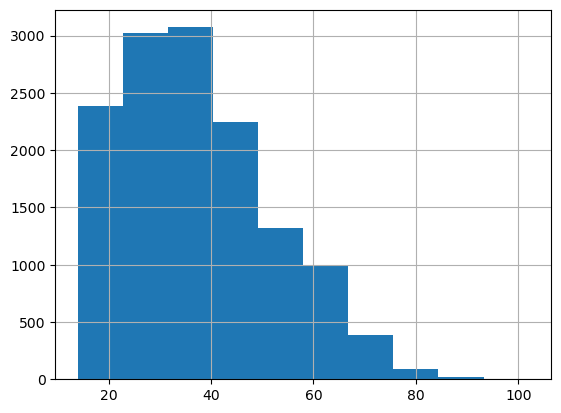

In [89]:
hist = df__['age'].hist()

plt.savefig("pandas_hist_01.png", bbox_inches='tight', dpi=100)

In [90]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df__, test_size=0.2)

In [91]:
df_train.head()

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,Collective,1,25.0,Heritage,Aucun,Non,Autre,Autre,Moyenne,Nord,...,Célibataire,Musulman,CIV,Oui,Agriculture,Oui,aide familiale,Oui,Aucun,Aucun
15672,Individuelle,2,0.5,Mariage,Aucun,Non,Sableux,Plaine,Bonne,Centre-Ouest,...,Marié,Chrétien,CIV,Non,Agriculture,Non,Patron,Non,Aucun,Aucun
12993,Individuelle,1,3.5,Heritage,Aucun,Non,Autre,Plaine,Bonne,Nord,...,Célibataire,Musulman,CIV,Oui,Autres,Non,Patron,Non,Aucun,Aucun
33110,Individuelle,1,4.0,Heritage,Permis d'exploiter,Non,Argileux,Colline,Bonne,Sud-Ouest,...,Marié,Chrétien,Burkina,Oui,Agriculture,Oui,Patron,Oui,CEPE,Oui
5728,Individuelle,5,1.0,Heritage,Aucun,Non,Argileux,Plaine,Moyenne,Centre,...,Marié,Chrétien,CIV,Oui,Autres,Oui,Patron,Oui,Secondaire,Aucun


In [92]:
df_test.head()

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
33789,Individuelle,1,7.0,Heritage,Aucun,Non,Limoneux,Plaine,Moyenne,Sud-Est,...,Célibataire,Chrétien,CIV,Oui,Agriculture,Non,Patron,Oui,Aucun,Aucun
14245,Individuelle,2,0.5,Heritage,Aucun,Non,Limoneux,Pente douce,Moyenne,Centre-Ouest,...,Marié,Animiste,CIV,Non,Agriculture,Non,Patron,Non,Aucun,Aucun
20202,Individuelle,1,20.0,Achat,Aucun,Non,Sableux,Plaine,Bonne,Sud-Est,...,Marié,Musulman,CIV,Non,Agriculture,Non,aide familiale,Non,Aucun,Aucun
27488,Individuelle,1,1.0,Don,Aucun,Non,Sableux,Plaine,Moyenne,Nord,...,Célibataire,Animiste,CIV,Oui,Agriculture,Non,Patron,Non,Aucun,Aucun
17799,Individuelle,3,1.5,Heritage,Aucun,Non,Argileux,Plaine,Bonne,Centre-Ouest,...,Marié,Sans réligion,CIV,Oui,Agriculture,Non,Patron,Oui,CEPE,Aucun


In [93]:
df_test.shape

(2709, 26)

In [94]:
df_train.shape

(10834, 26)

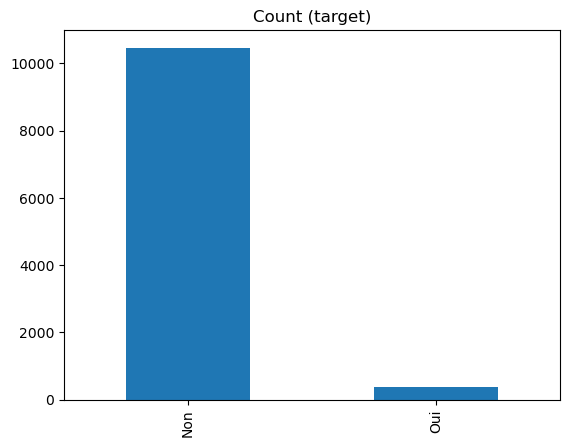

In [95]:
risque_count = df_train.risque_desaccord.value_counts()

risque_count.plot(kind='bar', title='Count (target)');

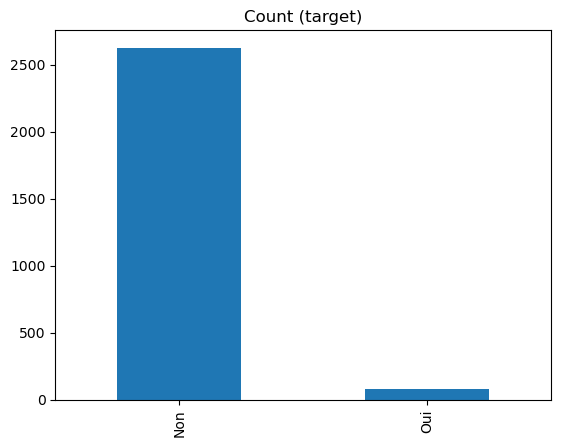

In [96]:
risque_count = df_test.risque_desaccord.value_counts()

risque_count.plot(kind='bar', title='Count (target)');

In [97]:
# Get list of categorical variables
s = (df_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['mode_gestion', 'mode_acquisition', 'document_legal', 'risque_desaccord', 'type_sol', 'topographie_parcelle', 'fertilité_sol', 'zone_agroécologique', 'zone', 'culture', 'milieu_résidence', 'genre', 'situation_matrimoniale', 'sitmat', 'réligion', 'nationalité', 'téléphone_portable', 'type_branche', 'accès_internet', 'type_csp', 'compte_bancaire', 'classe_diplome', 'Titre']


In [98]:
# Get list of integer variables
l = (df_train.dtypes == 'float')
quant_cols = list(l[l].index)

print("Quantitative variables:")
print(quant_cols)

Quantitative variables:
['superficie_parcelle']


### Data Engineering

#### Encoding

In [99]:
df_train.head()

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,Collective,1,25.0,Heritage,Aucun,Non,Autre,Autre,Moyenne,Nord,...,Célibataire,Musulman,CIV,Oui,Agriculture,Oui,aide familiale,Oui,Aucun,Aucun
15672,Individuelle,2,0.5,Mariage,Aucun,Non,Sableux,Plaine,Bonne,Centre-Ouest,...,Marié,Chrétien,CIV,Non,Agriculture,Non,Patron,Non,Aucun,Aucun
12993,Individuelle,1,3.5,Heritage,Aucun,Non,Autre,Plaine,Bonne,Nord,...,Célibataire,Musulman,CIV,Oui,Autres,Non,Patron,Non,Aucun,Aucun
33110,Individuelle,1,4.0,Heritage,Permis d'exploiter,Non,Argileux,Colline,Bonne,Sud-Ouest,...,Marié,Chrétien,Burkina,Oui,Agriculture,Oui,Patron,Oui,CEPE,Oui
5728,Individuelle,5,1.0,Heritage,Aucun,Non,Argileux,Plaine,Moyenne,Centre,...,Marié,Chrétien,CIV,Oui,Autres,Oui,Patron,Oui,Secondaire,Aucun


In [100]:
# Feature engineering par le One-Hot-Encoder permettant par le get-dummies d'eviter les relations d'ordre entre les modalités

from sklearn.preprocessing import OneHotEncoder

# On instancie l'encoder
enc = OneHotEncoder()

In [101]:
# Récupération des valeurs de la colonne
values = df_train['mode_gestion'].values.reshape(-1,1)

# Utilisation du fit_transform
gestion_OHE = enc.fit_transform(values).toarray()

# Récupération du nom des colonnes après encodage
columns_encoded = enc.get_feature_names_out(['mode_gestion']) # Si vous souhaitez encoder un DataFrame 
                                                         # l'argument est df.columns

# Création d'un DataFrame encodé
gestion_OHE = pd.DataFrame(gestion_OHE, columns=columns_encoded) 

# Reset l'index
gestion_OHE.reset_index(drop=True,inplace=True)

# Affichage 
gestion_OHE

,mode_gestion_Collective,mode_gestion_Individuelle
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
10829,0.0,1.0
10830,0.0,1.0
10831,1.0,0.0
10832,0.0,1.0


In [102]:
# Encodage type_sol

# On importe la méthode
from sklearn import preprocessing

# On instancie l'encoder
le = preprocessing.LabelEncoder()

# Apprentissage de l'encodage à appliquer
le.fit(df_train['mode_gestion'])

# Application de l'encoding
df_train['mode_gestion'] = le.transform(df_train['mode_gestion'])

# Affichage
df_train

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,0,1,25.00,Heritage,Aucun,Non,Autre,Autre,Moyenne,Nord,...,Célibataire,Musulman,CIV,Oui,Agriculture,Oui,aide familiale,Oui,Aucun,Aucun
15672,1,2,0.50,Mariage,Aucun,Non,Sableux,Plaine,Bonne,Centre-Ouest,...,Marié,Chrétien,CIV,Non,Agriculture,Non,Patron,Non,Aucun,Aucun
12993,1,1,3.50,Heritage,Aucun,Non,Autre,Plaine,Bonne,Nord,...,Célibataire,Musulman,CIV,Oui,Autres,Non,Patron,Non,Aucun,Aucun
33110,1,1,4.00,Heritage,Permis d'exploiter,Non,Argileux,Colline,Bonne,Sud-Ouest,...,Marié,Chrétien,Burkina,Oui,Agriculture,Oui,Patron,Oui,CEPE,Oui
5728,1,5,1.00,Heritage,Aucun,Non,Argileux,Plaine,Moyenne,Centre,...,Marié,Chrétien,CIV,Oui,Autres,Oui,Patron,Oui,Secondaire,Aucun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,1,1,2.50,Achat,Titre foncier,Non,Sableux,Plaine,Bonne,Sud-Est,...,Marié,Chrétien,CIV,Oui,Autres,Oui,Ouvrier,Oui,Secondaire,Oui
23835,1,2,0.25,Mariage,Aucun,Oui,Sableux,Plaine,Bonne,Centre,...,Marié,Chrétien,CIV,Non,Agriculture,Non,aide familiale,Oui,Aucun,Aucun
29147,0,1,2.00,Heritage,Aucun,Non,Argileux,Plaine,Moyenne,Sud-Ouest,...,Marié,Chrétien,CIV,Non,Agriculture,Non,aide familiale,Non,Aucun,Aucun
5955,1,1,3.00,Heritage,Aucun,Non,Sableux,Colline,Faible,Centre,...,Marié,Sans réligion,CIV,Oui,Autres,Non,Patron,Oui,Aucun,Aucun


In [103]:
# Encodage mode_acquisition

# Récupération des valeurs de la colonne
values = df_train['mode_acquisition'].values.reshape(-1,1)

# Utilisation du fit_transform
acquisition_OHE = enc.fit_transform(values).toarray()

# Récupération du nom des colonnes après encodage
columns_encoded = enc.get_feature_names_out(['mode_acquisition']) # Si vous souhaitez encoder un DataFrame 
                                                         # l'argument est df.columns

# Création d'un DataFrame encodé
acquisition_OHE = pd.DataFrame(acquisition_OHE, columns=columns_encoded) 

# Reset l'index
acquisition_OHE.reset_index(drop=True,inplace=True)

# Affichage 
acquisition_OHE

,mode_acquisition_Achat,mode_acquisition_Autre,mode_acquisition_Don,mode_acquisition_Heritage,mode_acquisition_Mariage
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
10829,1.0,0.0,0.0,0.0,0.0
10830,0.0,0.0,0.0,0.0,1.0
10831,0.0,0.0,0.0,1.0,0.0
10832,0.0,0.0,0.0,1.0,0.0


In [104]:
# Encodage document_legal

# Récupération des valeurs de la colonne
values = df_train['document_legal'].values.reshape(-1,1)

# Utilisation du fit_transform
doclegal_OHE = enc.fit_transform(values).toarray()

# Récupération du nom des colonnes après encodage
columns_encoded = enc.get_feature_names_out(['document_legal']) # Si vous souhaitez encoder un DataFrame 
                                                         # l'argument est df.columns

# Création d'un DataFrame encodé
doclegal_OHE = pd.DataFrame(doclegal_OHE, columns=columns_encoded) 

# Reset l'index
doclegal_OHE.reset_index(drop=True,inplace=True)

# Affichage 
doclegal_OHE

,document_legal_Aucun,document_legal_Autre,document_legal_Bail,document_legal_Convention de vente,document_legal_Permis d'exploiter,document_legal_Procès verbal,document_legal_Titre foncier
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
10829,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10830,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10831,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10832,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
# Encodage type_sol

# On importe la méthode
from sklearn import preprocessing

# On instancie l'encoder
le = preprocessing.LabelEncoder()

# Apprentissage de l'encodage à appliquer
le.fit(df_train['type_sol'])

# Application de l'encoding
df_train['type_sol'] = le.transform(df_train['type_sol'])

# Affichage
df_train

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,0,1,25.00,Heritage,Aucun,Non,1,Autre,Moyenne,Nord,...,Célibataire,Musulman,CIV,Oui,Agriculture,Oui,aide familiale,Oui,Aucun,Aucun
15672,1,2,0.50,Mariage,Aucun,Non,4,Plaine,Bonne,Centre-Ouest,...,Marié,Chrétien,CIV,Non,Agriculture,Non,Patron,Non,Aucun,Aucun
12993,1,1,3.50,Heritage,Aucun,Non,1,Plaine,Bonne,Nord,...,Célibataire,Musulman,CIV,Oui,Autres,Non,Patron,Non,Aucun,Aucun
33110,1,1,4.00,Heritage,Permis d'exploiter,Non,0,Colline,Bonne,Sud-Ouest,...,Marié,Chrétien,Burkina,Oui,Agriculture,Oui,Patron,Oui,CEPE,Oui
5728,1,5,1.00,Heritage,Aucun,Non,0,Plaine,Moyenne,Centre,...,Marié,Chrétien,CIV,Oui,Autres,Oui,Patron,Oui,Secondaire,Aucun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,1,1,2.50,Achat,Titre foncier,Non,4,Plaine,Bonne,Sud-Est,...,Marié,Chrétien,CIV,Oui,Autres,Oui,Ouvrier,Oui,Secondaire,Oui
23835,1,2,0.25,Mariage,Aucun,Oui,4,Plaine,Bonne,Centre,...,Marié,Chrétien,CIV,Non,Agriculture,Non,aide familiale,Oui,Aucun,Aucun
29147,0,1,2.00,Heritage,Aucun,Non,0,Plaine,Moyenne,Sud-Ouest,...,Marié,Chrétien,CIV,Non,Agriculture,Non,aide familiale,Non,Aucun,Aucun
5955,1,1,3.00,Heritage,Aucun,Non,4,Colline,Faible,Centre,...,Marié,Sans réligion,CIV,Oui,Autres,Non,Patron,Oui,Aucun,Aucun


In [106]:
# Encodage topographie_parcelle

# On importe la méthode
from sklearn import preprocessing

# On instancie l'encoder
le = preprocessing.LabelEncoder()

# Apprentissage de l'encodage à appliquer
le.fit(df_train['topographie_parcelle'])

# Application de l'encoding
df_train['topographie_parcelle'] = le.transform(df_train['topographie_parcelle'])

# Affichage
df_train

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,0,1,25.00,Heritage,Aucun,Non,1,0,Moyenne,Nord,...,Célibataire,Musulman,CIV,Oui,Agriculture,Oui,aide familiale,Oui,Aucun,Aucun
15672,1,2,0.50,Mariage,Aucun,Non,4,4,Bonne,Centre-Ouest,...,Marié,Chrétien,CIV,Non,Agriculture,Non,Patron,Non,Aucun,Aucun
12993,1,1,3.50,Heritage,Aucun,Non,1,4,Bonne,Nord,...,Célibataire,Musulman,CIV,Oui,Autres,Non,Patron,Non,Aucun,Aucun
33110,1,1,4.00,Heritage,Permis d'exploiter,Non,0,1,Bonne,Sud-Ouest,...,Marié,Chrétien,Burkina,Oui,Agriculture,Oui,Patron,Oui,CEPE,Oui
5728,1,5,1.00,Heritage,Aucun,Non,0,4,Moyenne,Centre,...,Marié,Chrétien,CIV,Oui,Autres,Oui,Patron,Oui,Secondaire,Aucun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,1,1,2.50,Achat,Titre foncier,Non,4,4,Bonne,Sud-Est,...,Marié,Chrétien,CIV,Oui,Autres,Oui,Ouvrier,Oui,Secondaire,Oui
23835,1,2,0.25,Mariage,Aucun,Oui,4,4,Bonne,Centre,...,Marié,Chrétien,CIV,Non,Agriculture,Non,aide familiale,Oui,Aucun,Aucun
29147,0,1,2.00,Heritage,Aucun,Non,0,4,Moyenne,Sud-Ouest,...,Marié,Chrétien,CIV,Non,Agriculture,Non,aide familiale,Non,Aucun,Aucun
5955,1,1,3.00,Heritage,Aucun,Non,4,1,Faible,Centre,...,Marié,Sans réligion,CIV,Oui,Autres,Non,Patron,Oui,Aucun,Aucun


In [107]:
# Encodage fertilité_sol

# Construction du dictionnaire 
dict_fertil = {'Bonne':3, 'Moyenne':2, 'Faible':1}

# Label Encoding avec map
df_train['fertilité_sol'] = df_train['fertilité_sol'].map(dict_fertil)

# Affichage 
df_train

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,0,1,25.00,Heritage,Aucun,Non,1,0,2,Nord,...,Célibataire,Musulman,CIV,Oui,Agriculture,Oui,aide familiale,Oui,Aucun,Aucun
15672,1,2,0.50,Mariage,Aucun,Non,4,4,3,Centre-Ouest,...,Marié,Chrétien,CIV,Non,Agriculture,Non,Patron,Non,Aucun,Aucun
12993,1,1,3.50,Heritage,Aucun,Non,1,4,3,Nord,...,Célibataire,Musulman,CIV,Oui,Autres,Non,Patron,Non,Aucun,Aucun
33110,1,1,4.00,Heritage,Permis d'exploiter,Non,0,1,3,Sud-Ouest,...,Marié,Chrétien,Burkina,Oui,Agriculture,Oui,Patron,Oui,CEPE,Oui
5728,1,5,1.00,Heritage,Aucun,Non,0,4,2,Centre,...,Marié,Chrétien,CIV,Oui,Autres,Oui,Patron,Oui,Secondaire,Aucun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,1,1,2.50,Achat,Titre foncier,Non,4,4,3,Sud-Est,...,Marié,Chrétien,CIV,Oui,Autres,Oui,Ouvrier,Oui,Secondaire,Oui
23835,1,2,0.25,Mariage,Aucun,Oui,4,4,3,Centre,...,Marié,Chrétien,CIV,Non,Agriculture,Non,aide familiale,Oui,Aucun,Aucun
29147,0,1,2.00,Heritage,Aucun,Non,0,4,2,Sud-Ouest,...,Marié,Chrétien,CIV,Non,Agriculture,Non,aide familiale,Non,Aucun,Aucun
5955,1,1,3.00,Heritage,Aucun,Non,4,1,1,Centre,...,Marié,Sans réligion,CIV,Oui,Autres,Non,Patron,Oui,Aucun,Aucun


In [108]:
# Encodage zone_agroécologique

# Récupération des valeurs de la colonne
values = df_train['zone_agroécologique'].values.reshape(-1,1)

# Utilisation du fit_transform
zonea_OHE = enc.fit_transform(values).toarray()

# Récupération du nom des colonnes après encodage
columns_encoded = enc.get_feature_names_out(['zone_agroécologique']) # Si vous souhaitez encoder un DataFrame 
                                                         # l'argument est df.columns

# Création d'un DataFrame encodé
zonea_OHE = pd.DataFrame(zonea_OHE, columns=columns_encoded) 

# Reset l'index
zonea_OHE.reset_index(drop=True,inplace=True)

# Affichage 
zonea_OHE

,zone_agroécologique_Abidjan,zone_agroécologique_Centre,zone_agroécologique_Centre-Ouest,zone_agroécologique_Nord,zone_agroécologique_Sud-Est,zone_agroécologique_Sud-Ouest
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10829,0.0,0.0,0.0,0.0,1.0,0.0
10830,0.0,1.0,0.0,0.0,0.0,0.0
10831,0.0,0.0,0.0,0.0,0.0,1.0
10832,0.0,1.0,0.0,0.0,0.0,0.0


In [109]:
# Encodage zone_agroécologique

# Récupération des valeurs de la colonne
values = df_train['zone'].values.reshape(-1,1)

# Utilisation du fit_transform
zoneb_OHE = enc.fit_transform(values).toarray()

# Récupération du nom des colonnes après encodage
columns_encoded = enc.get_feature_names_out(['zone']) # Si vous souhaitez encoder un DataFrame 
                                                         # l'argument est df.columns

# Création d'un DataFrame encodé
zoneb_OHE = pd.DataFrame(zoneb_OHE, columns=columns_encoded) 

# Reset l'index
zoneb_OHE.reset_index(drop=True,inplace=True)

# Affichage 
zoneb_OHE

,zone_Centre,zone_Centre-Ouest,zone_Nord,zone_Sud
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
10829,0.0,0.0,0.0,1.0
10830,1.0,0.0,0.0,0.0
10831,0.0,0.0,0.0,1.0
10832,1.0,0.0,0.0,0.0


In [110]:
# Encodage zone_agroécologique

# On importe la méthode
from sklearn import preprocessing

# On instancie l'encoder
le = preprocessing.LabelEncoder()

# Apprentissage de l'encodage à appliquer
le.fit(df_train['zone'])

# Application de l'encoding
df_train['zone'] = le.transform(df_train['zone'])

# Affichage
df_train

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,0,1,25.00,Heritage,Aucun,Non,1,0,2,Nord,...,Célibataire,Musulman,CIV,Oui,Agriculture,Oui,aide familiale,Oui,Aucun,Aucun
15672,1,2,0.50,Mariage,Aucun,Non,4,4,3,Centre-Ouest,...,Marié,Chrétien,CIV,Non,Agriculture,Non,Patron,Non,Aucun,Aucun
12993,1,1,3.50,Heritage,Aucun,Non,1,4,3,Nord,...,Célibataire,Musulman,CIV,Oui,Autres,Non,Patron,Non,Aucun,Aucun
33110,1,1,4.00,Heritage,Permis d'exploiter,Non,0,1,3,Sud-Ouest,...,Marié,Chrétien,Burkina,Oui,Agriculture,Oui,Patron,Oui,CEPE,Oui
5728,1,5,1.00,Heritage,Aucun,Non,0,4,2,Centre,...,Marié,Chrétien,CIV,Oui,Autres,Oui,Patron,Oui,Secondaire,Aucun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,1,1,2.50,Achat,Titre foncier,Non,4,4,3,Sud-Est,...,Marié,Chrétien,CIV,Oui,Autres,Oui,Ouvrier,Oui,Secondaire,Oui
23835,1,2,0.25,Mariage,Aucun,Oui,4,4,3,Centre,...,Marié,Chrétien,CIV,Non,Agriculture,Non,aide familiale,Oui,Aucun,Aucun
29147,0,1,2.00,Heritage,Aucun,Non,0,4,2,Sud-Ouest,...,Marié,Chrétien,CIV,Non,Agriculture,Non,aide familiale,Non,Aucun,Aucun
5955,1,1,3.00,Heritage,Aucun,Non,4,1,1,Centre,...,Marié,Sans réligion,CIV,Oui,Autres,Non,Patron,Oui,Aucun,Aucun


In [111]:
# Encodage culture

# Construction du dictionnaire 
dict_culture = {'industrielle':3, 'vivriere':2, 'Autres':1}

# Label Encoding avec map
df_train['culture'] = df_train['culture'].map(dict_culture)

# Affichage 
df_train

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,0,1,25.00,Heritage,Aucun,Non,1,0,2,Nord,...,Célibataire,Musulman,CIV,Oui,Agriculture,Oui,aide familiale,Oui,Aucun,Aucun
15672,1,2,0.50,Mariage,Aucun,Non,4,4,3,Centre-Ouest,...,Marié,Chrétien,CIV,Non,Agriculture,Non,Patron,Non,Aucun,Aucun
12993,1,1,3.50,Heritage,Aucun,Non,1,4,3,Nord,...,Célibataire,Musulman,CIV,Oui,Autres,Non,Patron,Non,Aucun,Aucun
33110,1,1,4.00,Heritage,Permis d'exploiter,Non,0,1,3,Sud-Ouest,...,Marié,Chrétien,Burkina,Oui,Agriculture,Oui,Patron,Oui,CEPE,Oui
5728,1,5,1.00,Heritage,Aucun,Non,0,4,2,Centre,...,Marié,Chrétien,CIV,Oui,Autres,Oui,Patron,Oui,Secondaire,Aucun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,1,1,2.50,Achat,Titre foncier,Non,4,4,3,Sud-Est,...,Marié,Chrétien,CIV,Oui,Autres,Oui,Ouvrier,Oui,Secondaire,Oui
23835,1,2,0.25,Mariage,Aucun,Oui,4,4,3,Centre,...,Marié,Chrétien,CIV,Non,Agriculture,Non,aide familiale,Oui,Aucun,Aucun
29147,0,1,2.00,Heritage,Aucun,Non,0,4,2,Sud-Ouest,...,Marié,Chrétien,CIV,Non,Agriculture,Non,aide familiale,Non,Aucun,Aucun
5955,1,1,3.00,Heritage,Aucun,Non,4,1,1,Centre,...,Marié,Sans réligion,CIV,Oui,Autres,Non,Patron,Oui,Aucun,Aucun


In [112]:
# Encodage departement_résidence

# Récupération des valeurs de la colonne
values = df_train['milieu_résidence'].values.reshape(-1,1)

# Utilisation du fit_transform
milieu_OHE = enc.fit_transform(values).toarray()

# Récupération du nom des colonnes après encodage
columns_encoded = enc.get_feature_names_out(['milieu_résidence']) # Si vous souhaitez encoder un DataFrame 
                                                         # l'argument est df.columns

# Création d'un DataFrame encodé
milieu_OHE = pd.DataFrame(milieu_OHE, columns=columns_encoded) 

# Reset l'index
milieu_OHE.reset_index(drop=True,inplace=True)

# Affichage 
milieu_OHE

,milieu_résidence_Rural,milieu_résidence_Urbain
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
10829,0.0,1.0
10830,1.0,0.0
10831,1.0,0.0
10832,1.0,0.0


In [113]:
# Encodage genre

# Récupération des valeurs de la colonne
values = df_train['genre'].values.reshape(-1,1)

# Utilisation du fit_transform
genre_OHE = enc.fit_transform(values).toarray()

# Récupération du nom des colonnes après encodage
columns_encoded = enc.get_feature_names_out(['genre']) # Si vous souhaitez encoder un DataFrame 
                                                         # l'argument est df.columns

# Création d'un DataFrame encodé
genre_OHE = pd.DataFrame(genre_OHE, columns=columns_encoded) 

# Reset l'index
genre_OHE.reset_index(drop=True,inplace=True)

# Affichage 
genre_OHE

,genre_Feminin,genre_Masculin
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
10829,1.0,0.0
10830,1.0,0.0
10831,1.0,0.0
10832,0.0,1.0


In [114]:
# Encodage genre

# On importe la méthode
from sklearn import preprocessing

# On instancie l'encoder
le = preprocessing.LabelEncoder()

# Apprentissage de l'encodage à appliquer
le.fit(df_train['genre'])

# Application de l'encoding
df_train['genre'] = le.transform(df_train['genre'])

# Affichage
df_train

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,0,1,25.00,Heritage,Aucun,Non,1,0,2,Nord,...,Célibataire,Musulman,CIV,Oui,Agriculture,Oui,aide familiale,Oui,Aucun,Aucun
15672,1,2,0.50,Mariage,Aucun,Non,4,4,3,Centre-Ouest,...,Marié,Chrétien,CIV,Non,Agriculture,Non,Patron,Non,Aucun,Aucun
12993,1,1,3.50,Heritage,Aucun,Non,1,4,3,Nord,...,Célibataire,Musulman,CIV,Oui,Autres,Non,Patron,Non,Aucun,Aucun
33110,1,1,4.00,Heritage,Permis d'exploiter,Non,0,1,3,Sud-Ouest,...,Marié,Chrétien,Burkina,Oui,Agriculture,Oui,Patron,Oui,CEPE,Oui
5728,1,5,1.00,Heritage,Aucun,Non,0,4,2,Centre,...,Marié,Chrétien,CIV,Oui,Autres,Oui,Patron,Oui,Secondaire,Aucun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,1,1,2.50,Achat,Titre foncier,Non,4,4,3,Sud-Est,...,Marié,Chrétien,CIV,Oui,Autres,Oui,Ouvrier,Oui,Secondaire,Oui
23835,1,2,0.25,Mariage,Aucun,Oui,4,4,3,Centre,...,Marié,Chrétien,CIV,Non,Agriculture,Non,aide familiale,Oui,Aucun,Aucun
29147,0,1,2.00,Heritage,Aucun,Non,0,4,2,Sud-Ouest,...,Marié,Chrétien,CIV,Non,Agriculture,Non,aide familiale,Non,Aucun,Aucun
5955,1,1,3.00,Heritage,Aucun,Non,4,1,1,Centre,...,Marié,Sans réligion,CIV,Oui,Autres,Non,Patron,Oui,Aucun,Aucun


In [115]:
# Encodage situation_matrimoniale

# Récupération des valeurs de la colonne
values = df_train['situation_matrimoniale'].values.reshape(-1,1)

# Utilisation du fit_transform
sitmat_OHE = enc.fit_transform(values).toarray()

# Récupération du nom des colonnes après encodage
columns_encoded = enc.get_feature_names_out(['situation_matrimoniale']) # Si vous souhaitez encoder un DataFrame 
                                                         # l'argument est df.columns

# Création d'un DataFrame encodé
sitmat_OHE = pd.DataFrame(sitmat_OHE, columns=columns_encoded) 

# Reset l'index
sitmat_OHE.reset_index(drop=True,inplace=True)

# Affichage 
sitmat_OHE

,situation_matrimoniale_Celibataire,situation_matrimoniale_Divorcé(e),situation_matrimoniale_Marié(e),situation_matrimoniale_Séparé(e),situation_matrimoniale_Union libre,situation_matrimoniale_Veuf(ve)
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10829,0.0,0.0,1.0,0.0,0.0,0.0
10830,0.0,0.0,1.0,0.0,0.0,0.0
10831,0.0,0.0,1.0,0.0,0.0,0.0
10832,0.0,0.0,1.0,0.0,0.0,0.0


In [116]:
# Encodage situation_matrimoniale

# Récupération des valeurs de la colonne
values = df_train['sitmat'].values.reshape(-1,1)

# Utilisation du fit_transform
sitma_OHE = enc.fit_transform(values).toarray()

# Récupération du nom des colonnes après encodage
columns_encoded = enc.get_feature_names_out(['sitmat']) # Si vous souhaitez encoder un DataFrame 
                                                         # l'argument est df.columns

# Création d'un DataFrame encodé
sitma_OHE = pd.DataFrame(sitma_OHE, columns=columns_encoded) 

# Reset l'index
sitma_OHE.reset_index(drop=True,inplace=True)

# Affichage 
sitma_OHE

,sitmat_Autres,sitmat_Célibataire,sitmat_Marié,sitmat_Union libre
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
10829,0.0,0.0,1.0,0.0
10830,0.0,0.0,1.0,0.0
10831,0.0,0.0,1.0,0.0
10832,0.0,0.0,1.0,0.0


In [117]:
# Encodage réligion

# On importe la méthode
from sklearn import preprocessing

# On instancie l'encoder
le = preprocessing.LabelEncoder()

# Apprentissage de l'encodage à appliquer
le.fit(df_train['réligion'])

# Application de l'encoding
df_train['réligion'] = le.transform(df_train['réligion'])

# Affichage
df_train

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,0,1,25.00,Heritage,Aucun,Non,1,0,2,Nord,...,Célibataire,3,CIV,Oui,Agriculture,Oui,aide familiale,Oui,Aucun,Aucun
15672,1,2,0.50,Mariage,Aucun,Non,4,4,3,Centre-Ouest,...,Marié,2,CIV,Non,Agriculture,Non,Patron,Non,Aucun,Aucun
12993,1,1,3.50,Heritage,Aucun,Non,1,4,3,Nord,...,Célibataire,3,CIV,Oui,Autres,Non,Patron,Non,Aucun,Aucun
33110,1,1,4.00,Heritage,Permis d'exploiter,Non,0,1,3,Sud-Ouest,...,Marié,2,Burkina,Oui,Agriculture,Oui,Patron,Oui,CEPE,Oui
5728,1,5,1.00,Heritage,Aucun,Non,0,4,2,Centre,...,Marié,2,CIV,Oui,Autres,Oui,Patron,Oui,Secondaire,Aucun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,1,1,2.50,Achat,Titre foncier,Non,4,4,3,Sud-Est,...,Marié,2,CIV,Oui,Autres,Oui,Ouvrier,Oui,Secondaire,Oui
23835,1,2,0.25,Mariage,Aucun,Oui,4,4,3,Centre,...,Marié,2,CIV,Non,Agriculture,Non,aide familiale,Oui,Aucun,Aucun
29147,0,1,2.00,Heritage,Aucun,Non,0,4,2,Sud-Ouest,...,Marié,2,CIV,Non,Agriculture,Non,aide familiale,Non,Aucun,Aucun
5955,1,1,3.00,Heritage,Aucun,Non,4,1,1,Centre,...,Marié,4,CIV,Oui,Autres,Non,Patron,Oui,Aucun,Aucun


In [118]:
# Encodage nationalité

# Récupération des valeurs de la colonne
values = df_train['nationalité'].values.reshape(-1,1)

# Utilisation du fit_transform
nationality_OHE = enc.fit_transform(values).toarray()

# Récupération du nom des colonnes après encodage
columns_encoded = enc.get_feature_names_out(['nationalité']) # Si vous souhaitez encoder un DataFrame 
                                                         # l'argument est df.columns

# Création d'un DataFrame encodé
nationality_OHE = pd.DataFrame(nationality_OHE, columns=columns_encoded) 

# Reset l'index
nationality_OHE.reset_index(drop=True,inplace=True)

# Affichage 
nationality_OHE

,nationalité_Autres,nationalité_Burkina,nationalité_CIV
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
...,...,...,...
10829,0.0,0.0,1.0
10830,0.0,0.0,1.0
10831,0.0,0.0,1.0
10832,0.0,0.0,1.0


In [119]:
# Encodage nationalité

# Récupération des valeurs de la colonne
values = df_train['Titre'].values.reshape(-1,1)

# Utilisation du fit_transform
Titre_OHE = enc.fit_transform(values).toarray()

# Récupération du nom des colonnes après encodage
columns_encoded = enc.get_feature_names_out(['Titre']) # Si vous souhaitez encoder un DataFrame 
                                                         # l'argument est df.columns

# Création d'un DataFrame encodé
Titre_OHE = pd.DataFrame(Titre_OHE, columns=columns_encoded) 

# Reset l'index
Titre_OHE.reset_index(drop=True,inplace=True)

# Affichage 
Titre_OHE

,Titre_Aucun,Titre_Oui
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
10829,0.0,1.0
10830,1.0,0.0
10831,1.0,0.0
10832,1.0,0.0


In [120]:
# Encodage Titre

# On importe la méthode
from sklearn import preprocessing

# On instancie l'encoder
le = preprocessing.LabelEncoder()

# Apprentissage de l'encodage à appliquer
le.fit(df_train['Titre'])

# Application de l'encoding
df_train['Titre'] = le.transform(df_train['Titre'])

# Affichage
df_train

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,0,1,25.00,Heritage,Aucun,Non,1,0,2,Nord,...,Célibataire,3,CIV,Oui,Agriculture,Oui,aide familiale,Oui,Aucun,0
15672,1,2,0.50,Mariage,Aucun,Non,4,4,3,Centre-Ouest,...,Marié,2,CIV,Non,Agriculture,Non,Patron,Non,Aucun,0
12993,1,1,3.50,Heritage,Aucun,Non,1,4,3,Nord,...,Célibataire,3,CIV,Oui,Autres,Non,Patron,Non,Aucun,0
33110,1,1,4.00,Heritage,Permis d'exploiter,Non,0,1,3,Sud-Ouest,...,Marié,2,Burkina,Oui,Agriculture,Oui,Patron,Oui,CEPE,1
5728,1,5,1.00,Heritage,Aucun,Non,0,4,2,Centre,...,Marié,2,CIV,Oui,Autres,Oui,Patron,Oui,Secondaire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,1,1,2.50,Achat,Titre foncier,Non,4,4,3,Sud-Est,...,Marié,2,CIV,Oui,Autres,Oui,Ouvrier,Oui,Secondaire,1
23835,1,2,0.25,Mariage,Aucun,Oui,4,4,3,Centre,...,Marié,2,CIV,Non,Agriculture,Non,aide familiale,Oui,Aucun,0
29147,0,1,2.00,Heritage,Aucun,Non,0,4,2,Sud-Ouest,...,Marié,2,CIV,Non,Agriculture,Non,aide familiale,Non,Aucun,0
5955,1,1,3.00,Heritage,Aucun,Non,4,1,1,Centre,...,Marié,4,CIV,Oui,Autres,Non,Patron,Oui,Aucun,0


In [121]:
# Encodage téléphone_portable

# On importe la méthode
from sklearn import preprocessing

# On instancie l'encoder
le = preprocessing.LabelEncoder()

# Apprentissage de l'encodage à appliquer
le.fit(df_train['téléphone_portable'])

# Application de l'encoding
df_train['téléphone_portable'] = le.transform(df_train['téléphone_portable'])

# Affichage
df_train

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,0,1,25.00,Heritage,Aucun,Non,1,0,2,Nord,...,Célibataire,3,CIV,1,Agriculture,Oui,aide familiale,Oui,Aucun,0
15672,1,2,0.50,Mariage,Aucun,Non,4,4,3,Centre-Ouest,...,Marié,2,CIV,0,Agriculture,Non,Patron,Non,Aucun,0
12993,1,1,3.50,Heritage,Aucun,Non,1,4,3,Nord,...,Célibataire,3,CIV,1,Autres,Non,Patron,Non,Aucun,0
33110,1,1,4.00,Heritage,Permis d'exploiter,Non,0,1,3,Sud-Ouest,...,Marié,2,Burkina,1,Agriculture,Oui,Patron,Oui,CEPE,1
5728,1,5,1.00,Heritage,Aucun,Non,0,4,2,Centre,...,Marié,2,CIV,1,Autres,Oui,Patron,Oui,Secondaire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,1,1,2.50,Achat,Titre foncier,Non,4,4,3,Sud-Est,...,Marié,2,CIV,1,Autres,Oui,Ouvrier,Oui,Secondaire,1
23835,1,2,0.25,Mariage,Aucun,Oui,4,4,3,Centre,...,Marié,2,CIV,0,Agriculture,Non,aide familiale,Oui,Aucun,0
29147,0,1,2.00,Heritage,Aucun,Non,0,4,2,Sud-Ouest,...,Marié,2,CIV,0,Agriculture,Non,aide familiale,Non,Aucun,0
5955,1,1,3.00,Heritage,Aucun,Non,4,1,1,Centre,...,Marié,4,CIV,1,Autres,Non,Patron,Oui,Aucun,0


In [122]:
# Encodage type_branche

# On importe la méthode
from sklearn import preprocessing

# On instancie l'encoder
le = preprocessing.LabelEncoder()

# Apprentissage de l'encodage à appliquer
le.fit(df_train['type_branche'])

# Application de l'encoding
df_train['type_branche'] = le.transform(df_train['type_branche'])

# Affichage
df_train

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,0,1,25.00,Heritage,Aucun,Non,1,0,2,Nord,...,Célibataire,3,CIV,1,0,Oui,aide familiale,Oui,Aucun,0
15672,1,2,0.50,Mariage,Aucun,Non,4,4,3,Centre-Ouest,...,Marié,2,CIV,0,0,Non,Patron,Non,Aucun,0
12993,1,1,3.50,Heritage,Aucun,Non,1,4,3,Nord,...,Célibataire,3,CIV,1,1,Non,Patron,Non,Aucun,0
33110,1,1,4.00,Heritage,Permis d'exploiter,Non,0,1,3,Sud-Ouest,...,Marié,2,Burkina,1,0,Oui,Patron,Oui,CEPE,1
5728,1,5,1.00,Heritage,Aucun,Non,0,4,2,Centre,...,Marié,2,CIV,1,1,Oui,Patron,Oui,Secondaire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,1,1,2.50,Achat,Titre foncier,Non,4,4,3,Sud-Est,...,Marié,2,CIV,1,1,Oui,Ouvrier,Oui,Secondaire,1
23835,1,2,0.25,Mariage,Aucun,Oui,4,4,3,Centre,...,Marié,2,CIV,0,0,Non,aide familiale,Oui,Aucun,0
29147,0,1,2.00,Heritage,Aucun,Non,0,4,2,Sud-Ouest,...,Marié,2,CIV,0,0,Non,aide familiale,Non,Aucun,0
5955,1,1,3.00,Heritage,Aucun,Non,4,1,1,Centre,...,Marié,4,CIV,1,1,Non,Patron,Oui,Aucun,0


In [123]:
# Encodage accès internet

# On importe la méthode
from sklearn import preprocessing

# On instancie l'encoder
le = preprocessing.LabelEncoder()

# Apprentissage de l'encodage à appliquer
le.fit(df_train['accès_internet'])

# Application de l'encoding
df_train['accès_internet'] = le.transform(df_train['accès_internet'])

# Affichage
df_train

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,0,1,25.00,Heritage,Aucun,Non,1,0,2,Nord,...,Célibataire,3,CIV,1,0,1,aide familiale,Oui,Aucun,0
15672,1,2,0.50,Mariage,Aucun,Non,4,4,3,Centre-Ouest,...,Marié,2,CIV,0,0,0,Patron,Non,Aucun,0
12993,1,1,3.50,Heritage,Aucun,Non,1,4,3,Nord,...,Célibataire,3,CIV,1,1,0,Patron,Non,Aucun,0
33110,1,1,4.00,Heritage,Permis d'exploiter,Non,0,1,3,Sud-Ouest,...,Marié,2,Burkina,1,0,1,Patron,Oui,CEPE,1
5728,1,5,1.00,Heritage,Aucun,Non,0,4,2,Centre,...,Marié,2,CIV,1,1,1,Patron,Oui,Secondaire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,1,1,2.50,Achat,Titre foncier,Non,4,4,3,Sud-Est,...,Marié,2,CIV,1,1,1,Ouvrier,Oui,Secondaire,1
23835,1,2,0.25,Mariage,Aucun,Oui,4,4,3,Centre,...,Marié,2,CIV,0,0,0,aide familiale,Oui,Aucun,0
29147,0,1,2.00,Heritage,Aucun,Non,0,4,2,Sud-Ouest,...,Marié,2,CIV,0,0,0,aide familiale,Non,Aucun,0
5955,1,1,3.00,Heritage,Aucun,Non,4,1,1,Centre,...,Marié,4,CIV,1,1,0,Patron,Oui,Aucun,0


In [124]:
# Encodage csp

# Construction du dictionnaire 
csp_dict = {'Patron':3, 'cadre':2, 'Aide menagère':1, 'aide familiale':1, 'Ouvrier':1}

# Label Encoding avec map
df_train['type_csp'] = df_train['type_csp'].map(csp_dict)

# Affichage 
df_train

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,0,1,25.00,Heritage,Aucun,Non,1,0,2,Nord,...,Célibataire,3,CIV,1,0,1,1,Oui,Aucun,0
15672,1,2,0.50,Mariage,Aucun,Non,4,4,3,Centre-Ouest,...,Marié,2,CIV,0,0,0,3,Non,Aucun,0
12993,1,1,3.50,Heritage,Aucun,Non,1,4,3,Nord,...,Célibataire,3,CIV,1,1,0,3,Non,Aucun,0
33110,1,1,4.00,Heritage,Permis d'exploiter,Non,0,1,3,Sud-Ouest,...,Marié,2,Burkina,1,0,1,3,Oui,CEPE,1
5728,1,5,1.00,Heritage,Aucun,Non,0,4,2,Centre,...,Marié,2,CIV,1,1,1,3,Oui,Secondaire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,1,1,2.50,Achat,Titre foncier,Non,4,4,3,Sud-Est,...,Marié,2,CIV,1,1,1,1,Oui,Secondaire,1
23835,1,2,0.25,Mariage,Aucun,Oui,4,4,3,Centre,...,Marié,2,CIV,0,0,0,1,Oui,Aucun,0
29147,0,1,2.00,Heritage,Aucun,Non,0,4,2,Sud-Ouest,...,Marié,2,CIV,0,0,0,1,Non,Aucun,0
5955,1,1,3.00,Heritage,Aucun,Non,4,1,1,Centre,...,Marié,4,CIV,1,1,0,3,Oui,Aucun,0


In [125]:
# Encodage compte_bancaire

# On importe la méthode
from sklearn import preprocessing

# On instancie l'encoder
le = preprocessing.LabelEncoder()

# Apprentissage de l'encodage à appliquer
le.fit(df_train['compte_bancaire'])

# Application de l'encoding
df_train['compte_bancaire'] = le.transform(df_train['compte_bancaire'])

# Affichage
df_train

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,0,1,25.00,Heritage,Aucun,Non,1,0,2,Nord,...,Célibataire,3,CIV,1,0,1,1,1,Aucun,0
15672,1,2,0.50,Mariage,Aucun,Non,4,4,3,Centre-Ouest,...,Marié,2,CIV,0,0,0,3,0,Aucun,0
12993,1,1,3.50,Heritage,Aucun,Non,1,4,3,Nord,...,Célibataire,3,CIV,1,1,0,3,0,Aucun,0
33110,1,1,4.00,Heritage,Permis d'exploiter,Non,0,1,3,Sud-Ouest,...,Marié,2,Burkina,1,0,1,3,1,CEPE,1
5728,1,5,1.00,Heritage,Aucun,Non,0,4,2,Centre,...,Marié,2,CIV,1,1,1,3,1,Secondaire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,1,1,2.50,Achat,Titre foncier,Non,4,4,3,Sud-Est,...,Marié,2,CIV,1,1,1,1,1,Secondaire,1
23835,1,2,0.25,Mariage,Aucun,Oui,4,4,3,Centre,...,Marié,2,CIV,0,0,0,1,1,Aucun,0
29147,0,1,2.00,Heritage,Aucun,Non,0,4,2,Sud-Ouest,...,Marié,2,CIV,0,0,0,1,0,Aucun,0
5955,1,1,3.00,Heritage,Aucun,Non,4,1,1,Centre,...,Marié,4,CIV,1,1,0,3,1,Aucun,0


In [126]:
# Encodage diplôme

# Construction du dictionnaire 
dict_dipl = {'Superieur':4, 'Secondaire':3, 'CEPE':2, 'Aucun':1}

# Label Encoding avec map
df_train['classe_diplome'] = df_train['classe_diplome'].map(dict_dipl)

# Affichage 
df_train

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
31689,0,1,25.00,Heritage,Aucun,Non,1,0,2,Nord,...,Célibataire,3,CIV,1,0,1,1,1,1,0
15672,1,2,0.50,Mariage,Aucun,Non,4,4,3,Centre-Ouest,...,Marié,2,CIV,0,0,0,3,0,1,0
12993,1,1,3.50,Heritage,Aucun,Non,1,4,3,Nord,...,Célibataire,3,CIV,1,1,0,3,0,1,0
33110,1,1,4.00,Heritage,Permis d'exploiter,Non,0,1,3,Sud-Ouest,...,Marié,2,Burkina,1,0,1,3,1,2,1
5728,1,5,1.00,Heritage,Aucun,Non,0,4,2,Centre,...,Marié,2,CIV,1,1,1,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28949,1,1,2.50,Achat,Titre foncier,Non,4,4,3,Sud-Est,...,Marié,2,CIV,1,1,1,1,1,3,1
23835,1,2,0.25,Mariage,Aucun,Oui,4,4,3,Centre,...,Marié,2,CIV,0,0,0,1,1,1,0
29147,0,1,2.00,Heritage,Aucun,Non,0,4,2,Sud-Ouest,...,Marié,2,CIV,0,0,0,1,0,1,0
5955,1,1,3.00,Heritage,Aucun,Non,4,1,1,Centre,...,Marié,4,CIV,1,1,0,3,1,1,0


In [127]:
df_train.reset_index(drop=True,inplace=True)
df_train

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,sitmat,réligion,nationalité,téléphone_portable,type_branche,accès_internet,type_csp,compte_bancaire,classe_diplome,Titre
0,0,1,25.00,Heritage,Aucun,Non,1,0,2,Nord,...,Célibataire,3,CIV,1,0,1,1,1,1,0
1,1,2,0.50,Mariage,Aucun,Non,4,4,3,Centre-Ouest,...,Marié,2,CIV,0,0,0,3,0,1,0
2,1,1,3.50,Heritage,Aucun,Non,1,4,3,Nord,...,Célibataire,3,CIV,1,1,0,3,0,1,0
3,1,1,4.00,Heritage,Permis d'exploiter,Non,0,1,3,Sud-Ouest,...,Marié,2,Burkina,1,0,1,3,1,2,1
4,1,5,1.00,Heritage,Aucun,Non,0,4,2,Centre,...,Marié,2,CIV,1,1,1,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,1,1,2.50,Achat,Titre foncier,Non,4,4,3,Sud-Est,...,Marié,2,CIV,1,1,1,1,1,3,1
10830,1,2,0.25,Mariage,Aucun,Oui,4,4,3,Centre,...,Marié,2,CIV,0,0,0,1,1,1,0
10831,0,1,2.00,Heritage,Aucun,Non,0,4,2,Sud-Ouest,...,Marié,2,CIV,0,0,0,1,0,1,0
10832,1,1,3.00,Heritage,Aucun,Non,4,1,1,Centre,...,Marié,4,CIV,1,1,0,3,1,1,0


In [128]:
result = pd.concat([df_train,gestion_OHE,acquisition_OHE,doclegal_OHE,zoneb_OHE,milieu_OHE,genre_OHE,sitma_OHE,nationality_OHE,Titre_OHE], axis=1)
result.head()

,mode_gestion,nombre_cultures_parcelle,superficie_parcelle,mode_acquisition,document_legal,risque_desaccord,type_sol,topographie_parcelle,fertilité_sol,zone_agroécologique,...,genre_Masculin,sitmat_Autres,sitmat_Célibataire,sitmat_Marié,sitmat_Union libre,nationalité_Autres,nationalité_Burkina,nationalité_CIV,Titre_Aucun,Titre_Oui
0,0,1,25.0,Heritage,Aucun,Non,1,0,2,Nord,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1,2,0.5,Mariage,Aucun,Non,4,4,3,Centre-Ouest,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,1,3.5,Heritage,Aucun,Non,1,4,3,Nord,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1,1,4.0,Heritage,Permis d'exploiter,Non,0,1,3,Sud-Ouest,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,5,1.0,Heritage,Aucun,Non,0,4,2,Centre,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [129]:
result.columns

Index(['mode_gestion', 'nombre_cultures_parcelle', 'superficie_parcelle',
       'mode_acquisition', 'document_legal', 'risque_desaccord', 'type_sol',
       'topographie_parcelle', 'fertilité_sol', 'zone_agroécologique', 'zone',
       'culture', 'milieu_résidence', 'genre', 'age', 'situation_matrimoniale',
       'sitmat', 'réligion', 'nationalité', 'téléphone_portable',
       'type_branche', 'accès_internet', 'type_csp', 'compte_bancaire',
       'classe_diplome', 'Titre', 'mode_gestion_Collective',
       'mode_gestion_Individuelle', 'mode_acquisition_Achat',
       'mode_acquisition_Autre', 'mode_acquisition_Don',
       'mode_acquisition_Heritage', 'mode_acquisition_Mariage',
       'document_legal_Aucun', 'document_legal_Autre', 'document_legal_Bail',
       'document_legal_Convention de vente',
       'document_legal_Permis d'exploiter', 'document_legal_Procès verbal',
       'document_legal_Titre foncier', 'zone_Centre', 'zone_Centre-Ouest',
       'zone_Nord', 'zone_Sud', 'm

In [130]:
df_result = result.drop(['topographie_parcelle','mode_gestion', 'nombre_cultures_parcelle', 'superficie_parcelle','mode_acquisition', 'situation_matrimoniale', 'nationalité', 'sitmat', 'milieu_résidence', 'document_legal', 'zone_agroécologique','Titre','document_legal_Aucun','document_legal_Autre','document_legal_Bail','document_legal_Convention de vente',"document_legal_Permis d'exploiter",'document_legal_Procès verbal','document_legal_Titre foncier',], axis=1)
df_result.head()

,risque_desaccord,type_sol,fertilité_sol,zone,culture,genre,age,réligion,téléphone_portable,type_branche,...,genre_Masculin,sitmat_Autres,sitmat_Célibataire,sitmat_Marié,sitmat_Union libre,nationalité_Autres,nationalité_Burkina,nationalité_CIV,Titre_Aucun,Titre_Oui
0,Non,1,2,2,3,1,20,3,1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,Non,4,3,1,2,0,53,2,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,Non,1,3,2,3,0,18,3,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,Non,0,3,3,3,1,26,2,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Non,0,2,0,3,1,32,2,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [131]:
df_result.dtypes

risque_desaccord              object
type_sol                       int32
fertilité_sol                  int64
zone                           int32
culture                        int64
genre                          int32
age                            int64
réligion                       int32
téléphone_portable             int32
type_branche                   int32
accès_internet                 int32
type_csp                       int64
compte_bancaire                int32
classe_diplome                 int64
mode_gestion_Collective      float64
mode_gestion_Individuelle    float64
mode_acquisition_Achat       float64
mode_acquisition_Autre       float64
mode_acquisition_Don         float64
mode_acquisition_Heritage    float64
mode_acquisition_Mariage     float64
zone_Centre                  float64
zone_Centre-Ouest            float64
zone_Nord                    float64
zone_Sud                     float64
milieu_résidence_Rural       float64
milieu_résidence_Urbain      float64
g

In [132]:
df_result.nunique()

risque_desaccord              2
type_sol                      5
fertilité_sol                 3
zone                          4
culture                       3
genre                         2
age                          78
réligion                      5
téléphone_portable            2
type_branche                  3
accès_internet                2
type_csp                      3
compte_bancaire               2
classe_diplome                4
mode_gestion_Collective       2
mode_gestion_Individuelle     2
mode_acquisition_Achat        2
mode_acquisition_Autre        2
mode_acquisition_Don          2
mode_acquisition_Heritage     2
mode_acquisition_Mariage      2
zone_Centre                   2
zone_Centre-Ouest             2
zone_Nord                     2
zone_Sud                      2
milieu_résidence_Rural        2
milieu_résidence_Urbain       2
genre_Feminin                 2
genre_Masculin                2
sitmat_Autres                 2
sitmat_Célibataire            2
sitmat_M

In [133]:
df_result.shape

(10834, 38)

In [134]:
df_result.dtypes

risque_desaccord              object
type_sol                       int32
fertilité_sol                  int64
zone                           int32
culture                        int64
genre                          int32
age                            int64
réligion                       int32
téléphone_portable             int32
type_branche                   int32
accès_internet                 int32
type_csp                       int64
compte_bancaire                int32
classe_diplome                 int64
mode_gestion_Collective      float64
mode_gestion_Individuelle    float64
mode_acquisition_Achat       float64
mode_acquisition_Autre       float64
mode_acquisition_Don         float64
mode_acquisition_Heritage    float64
mode_acquisition_Mariage     float64
zone_Centre                  float64
zone_Centre-Ouest            float64
zone_Nord                    float64
zone_Sud                     float64
milieu_résidence_Rural       float64
milieu_résidence_Urbain      float64
g

## EDA

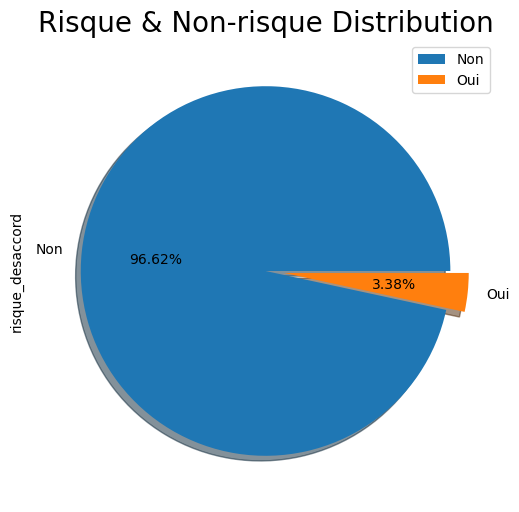

In [135]:
df_result["risque_desaccord"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.2f%%',shadow=True)
plt.title("Risque & Non-risque Distribution",fontsize=20)
plt.legend(["Non","Oui"])
plt.show()

#### Crises et Âge

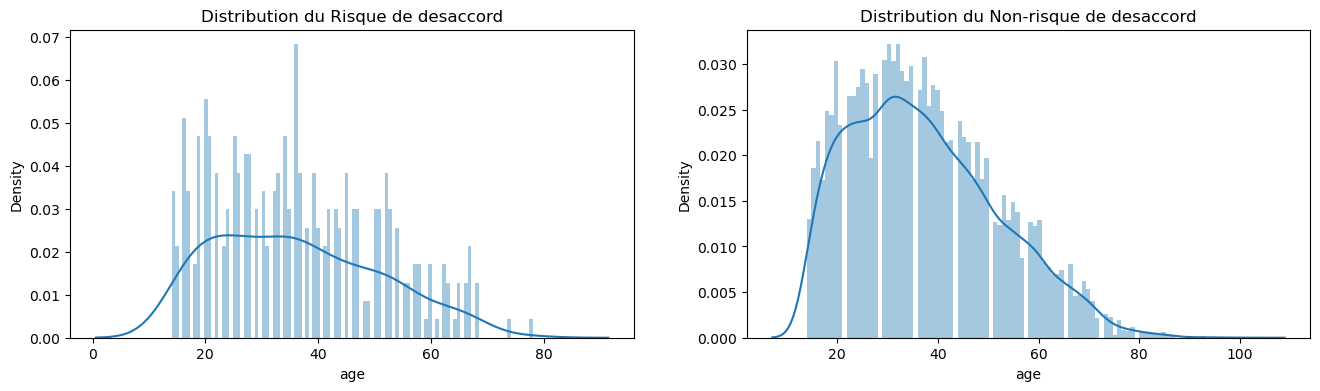

In [136]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['age'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['age'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

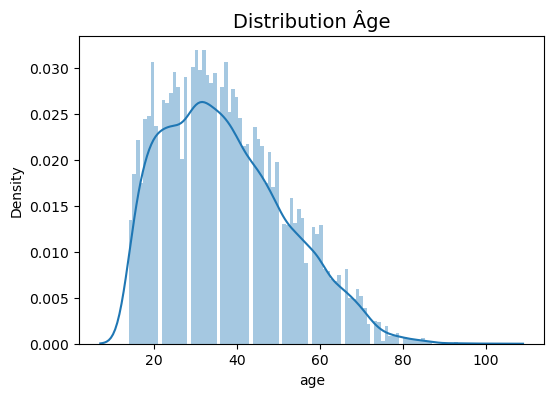

In [137]:
plt.figure(figsize=(6,4))
plt.title('Distribution Âge', fontsize=14)
sns.distplot(df_result['age'], bins=100)
plt.show()

#### Crises et Nationalités

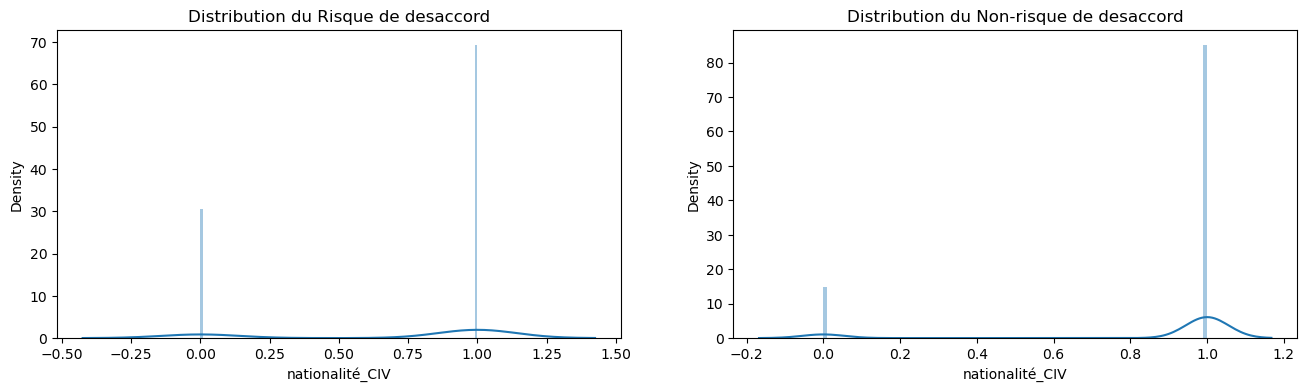

In [138]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['nationalité_CIV'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['nationalité_CIV'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

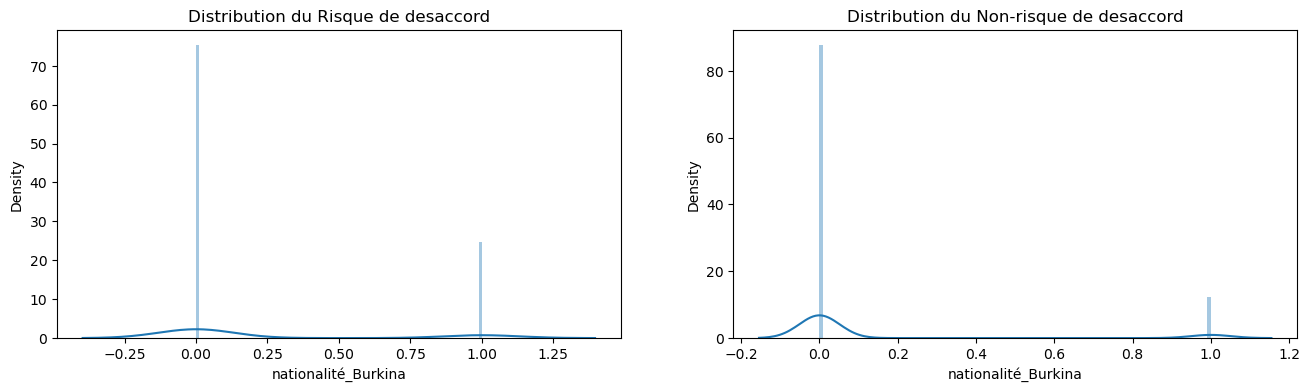

In [139]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['nationalité_Burkina'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['nationalité_Burkina'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

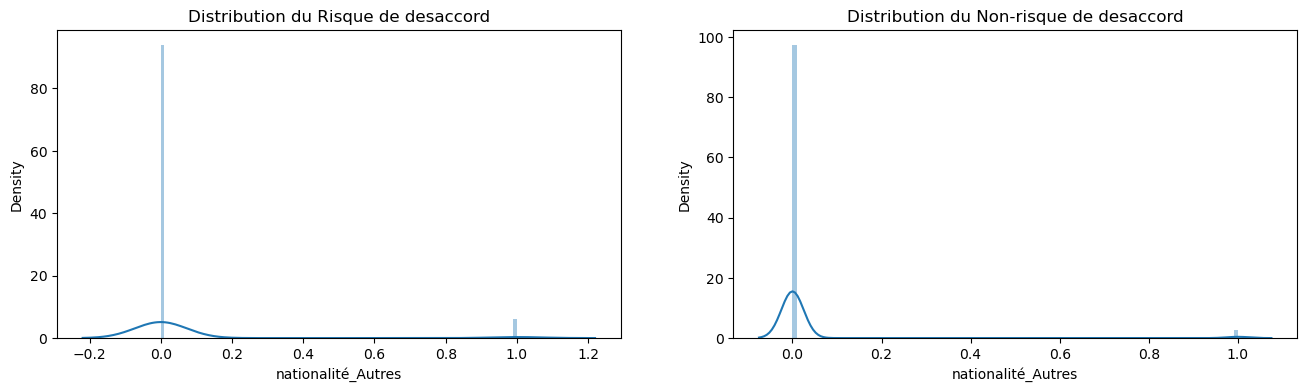

In [140]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['nationalité_Autres'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['nationalité_Autres'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

#### Titres fonciers et Crises

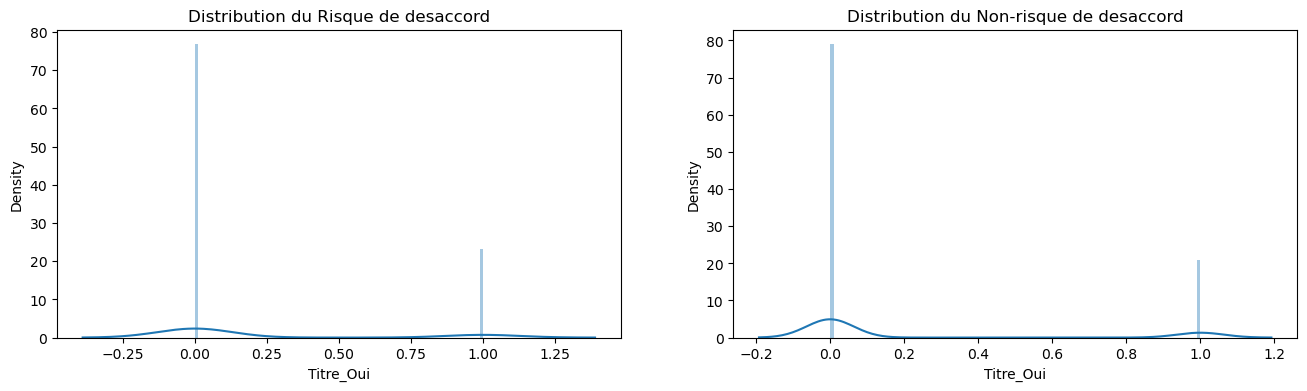

In [141]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['Titre_Oui'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['Titre_Oui'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

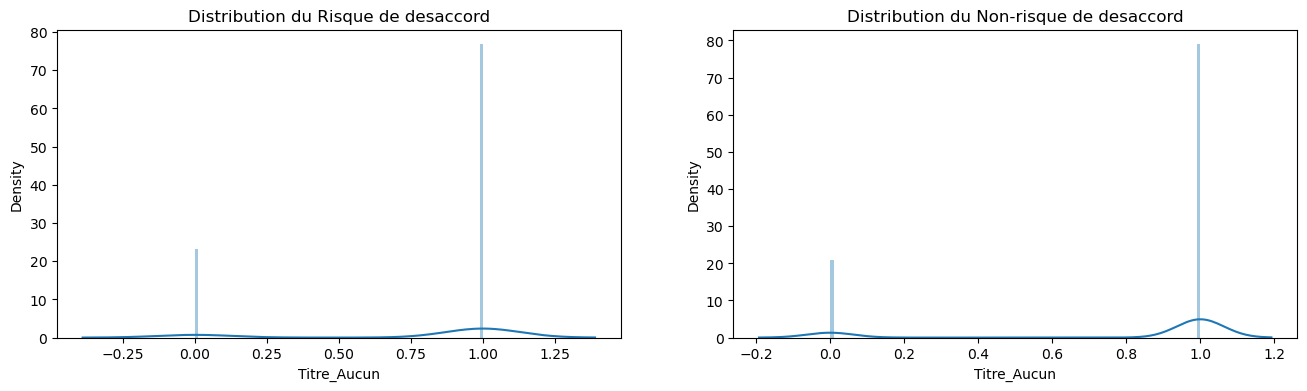

In [142]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['Titre_Aucun'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['Titre_Aucun'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

#### Crises et Cultures agricoles

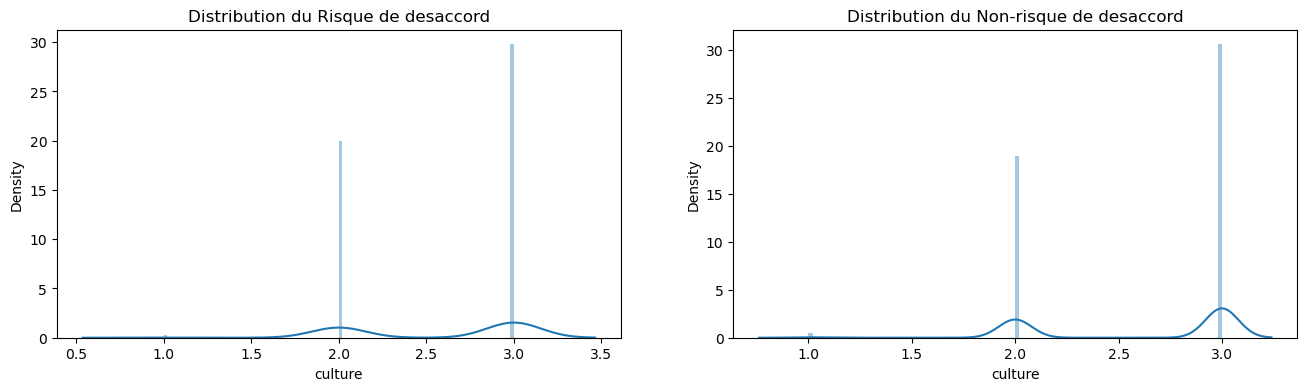

In [143]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['culture'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['culture'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

#### Crises et Milieu de résidences

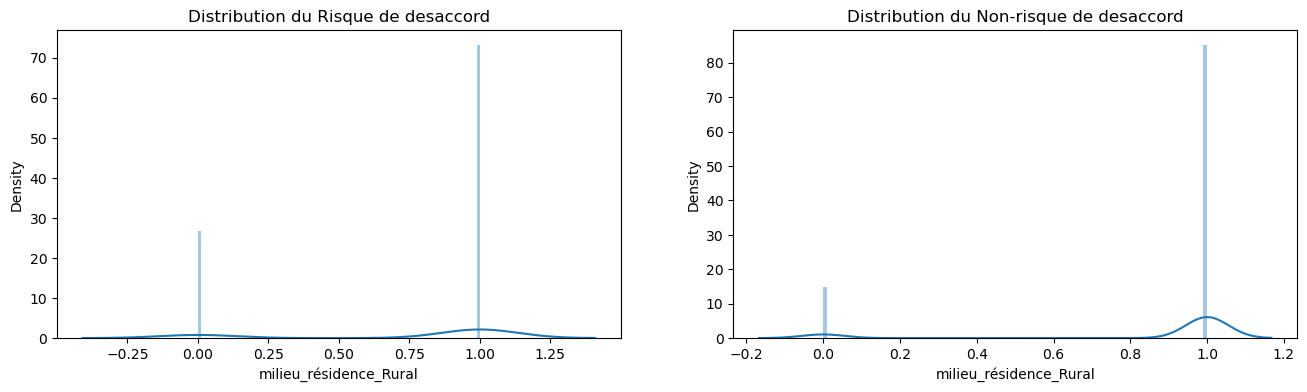

In [144]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['milieu_résidence_Rural'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['milieu_résidence_Rural'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

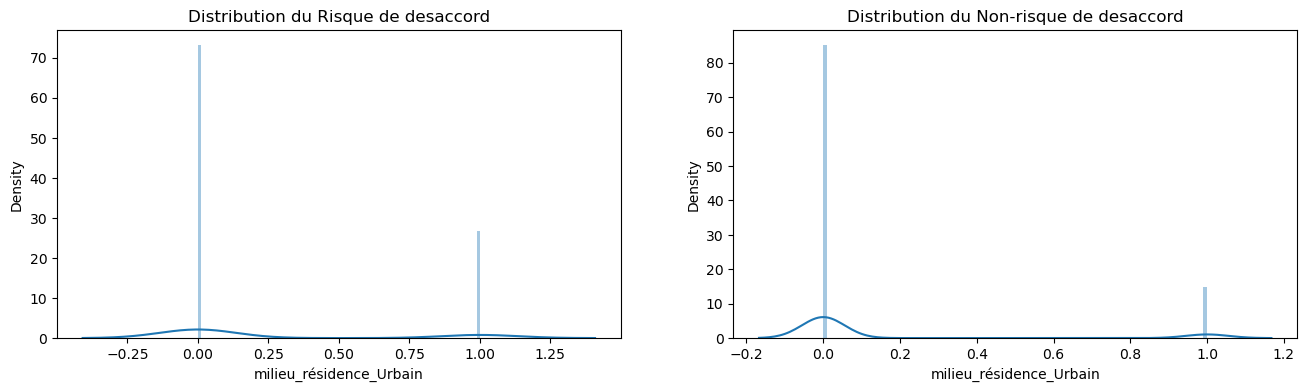

In [145]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['milieu_résidence_Urbain'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['milieu_résidence_Urbain'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

#### Crises et Genre

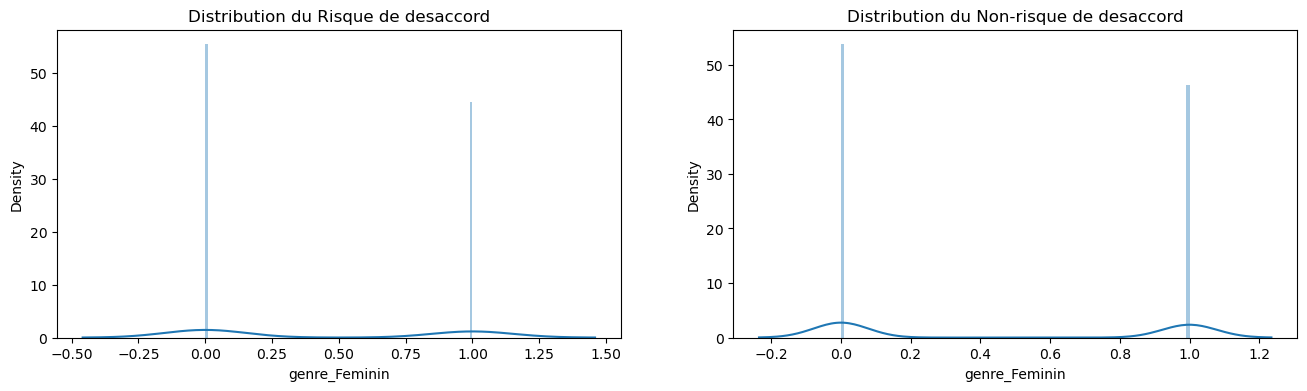

In [146]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['genre_Feminin'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['genre_Feminin'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

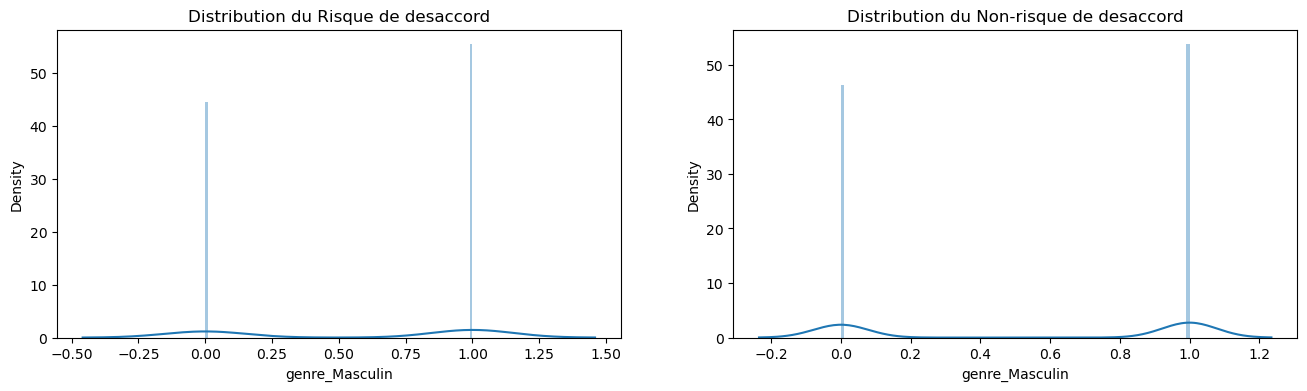

In [147]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['genre_Masculin'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['genre_Masculin'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

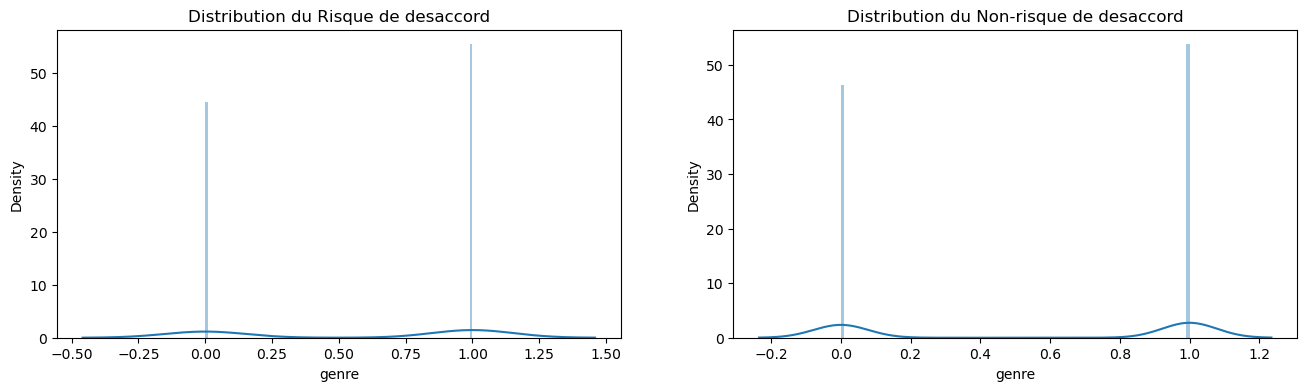

In [148]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['genre'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['genre'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

#### Crises et Niveau de diplômes

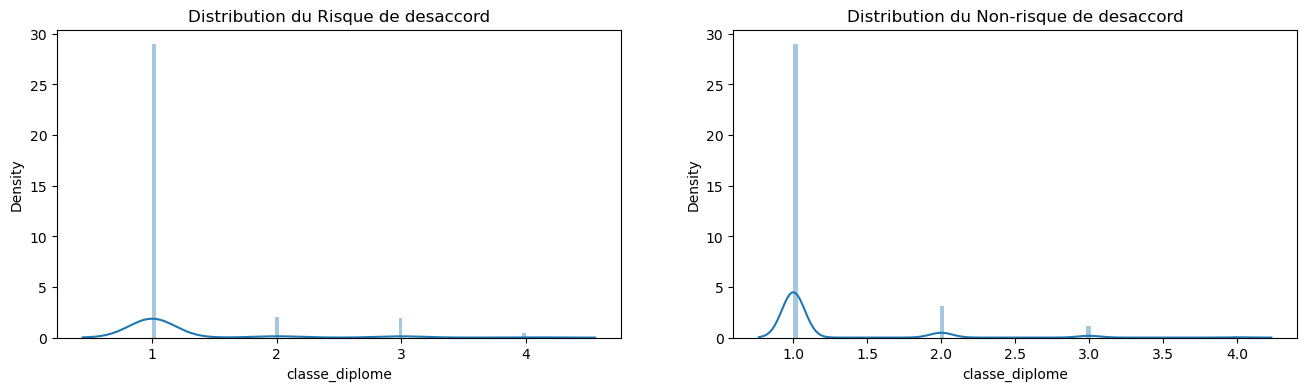

In [149]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['classe_diplome'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['classe_diplome'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

#### Crises et CSP

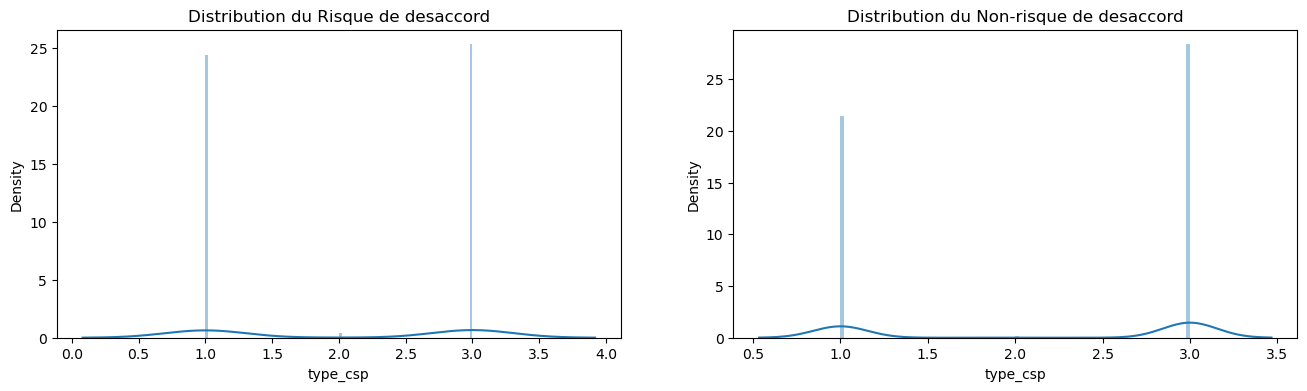

In [150]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['type_csp'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['type_csp'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

#### Crises et branches d'activités

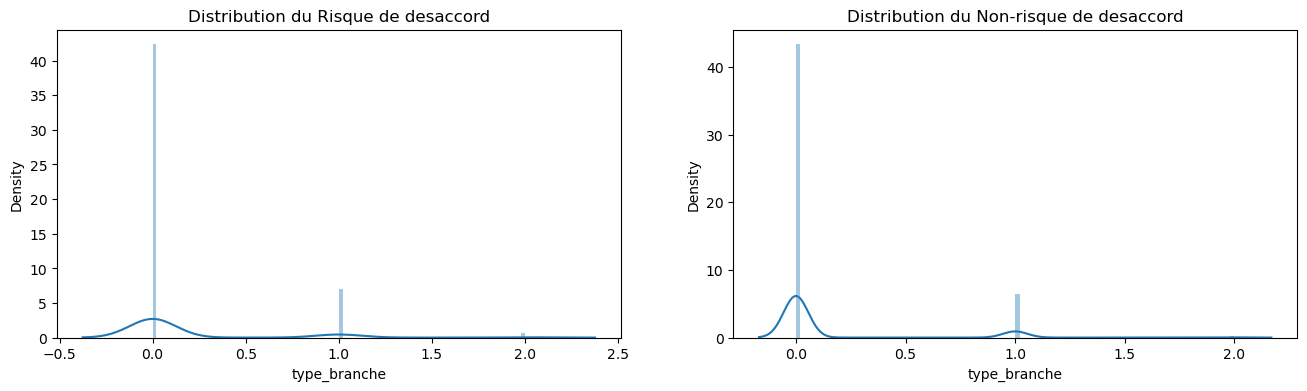

In [151]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['type_branche'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['type_branche'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

#### Crises et Mode de gestion des terres

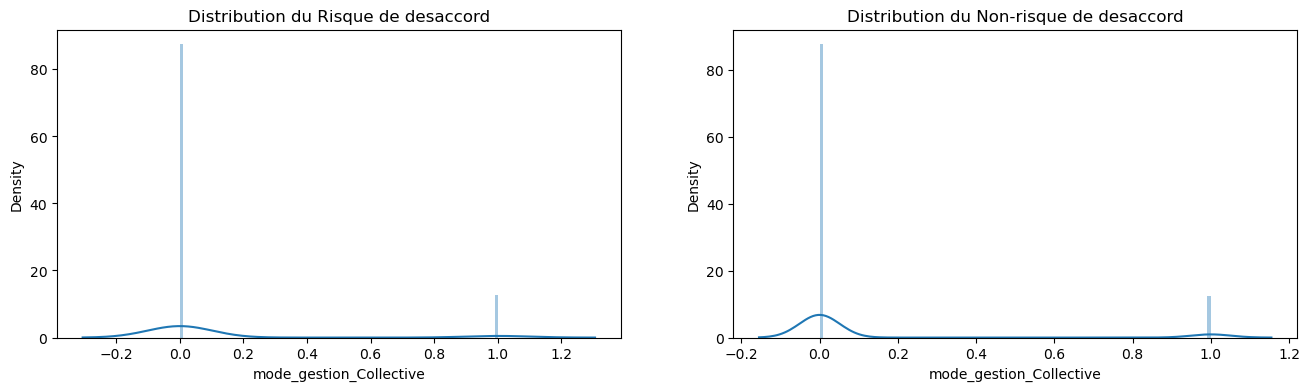

In [152]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['mode_gestion_Collective'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['mode_gestion_Collective'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

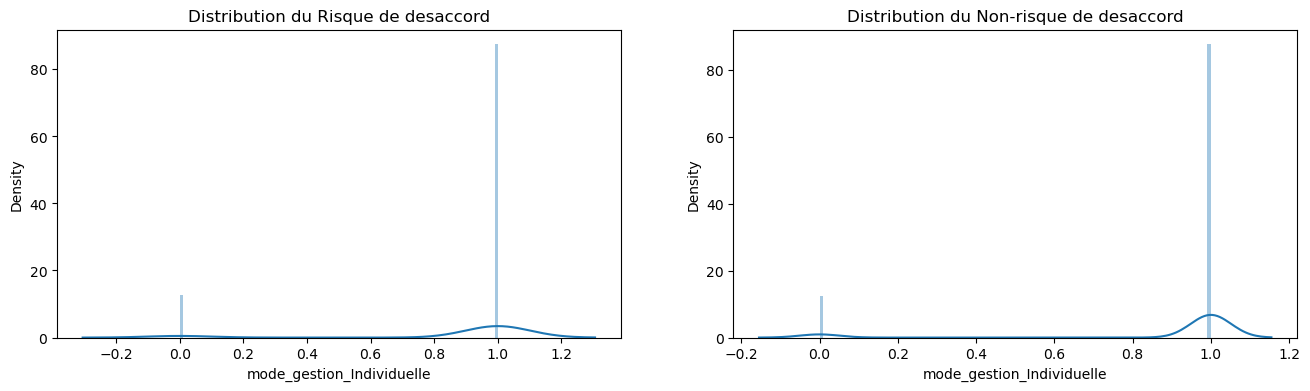

In [153]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['mode_gestion_Individuelle'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['mode_gestion_Individuelle'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

#### Crises et situation matrimoniale

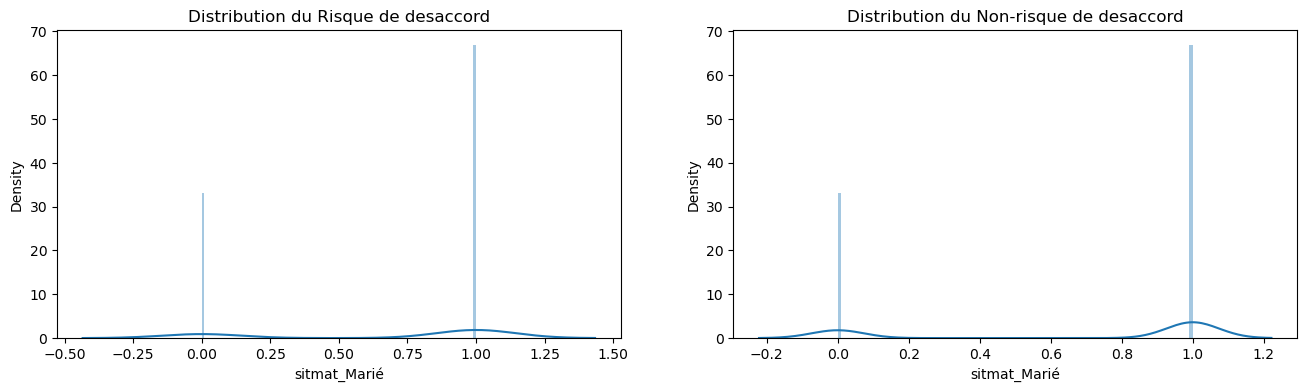

In [154]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['sitmat_Marié'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['sitmat_Marié'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

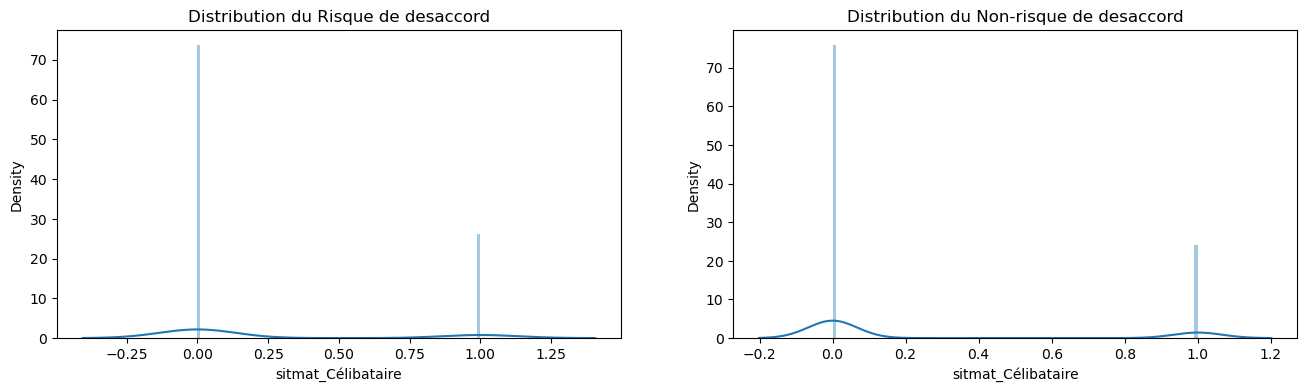

In [155]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['sitmat_Célibataire'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['sitmat_Célibataire'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

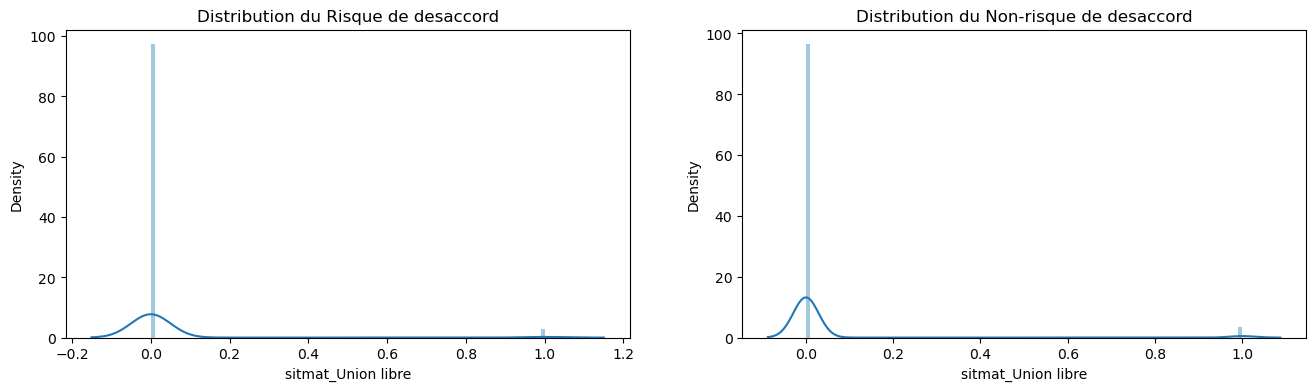

In [156]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['sitmat_Union libre'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['sitmat_Union libre'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

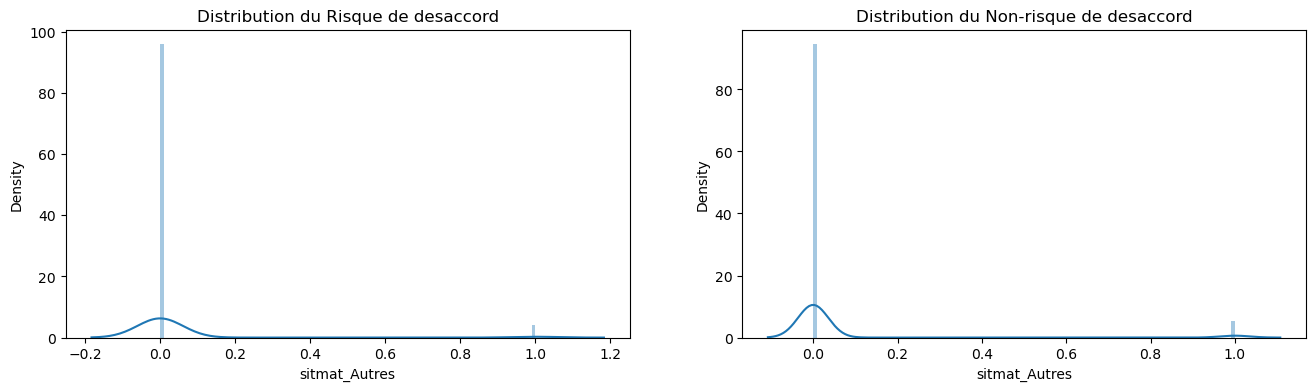

In [157]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['sitmat_Autres'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['sitmat_Autres'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

#### Crises et type de sol

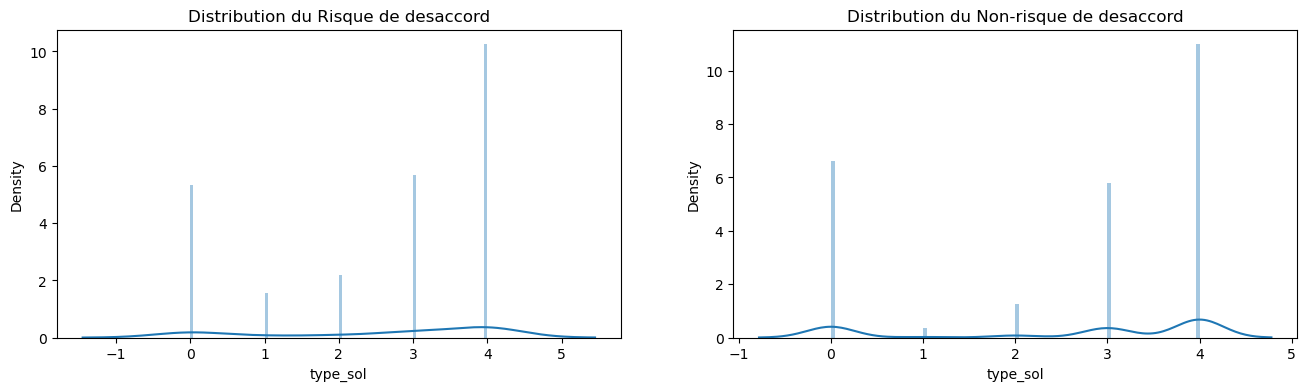

In [158]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['type_sol'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['type_sol'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

#### Crises et zone agroécologique

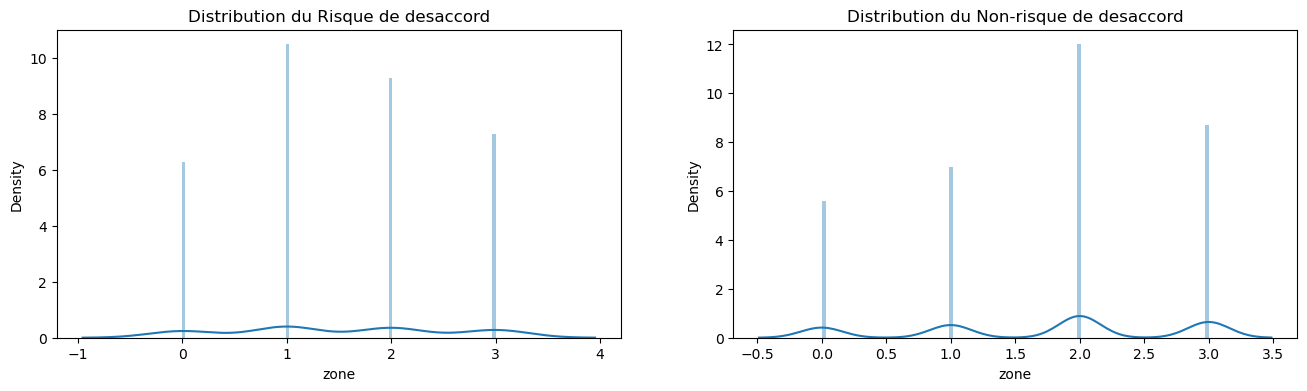

In [159]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['zone'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['zone'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

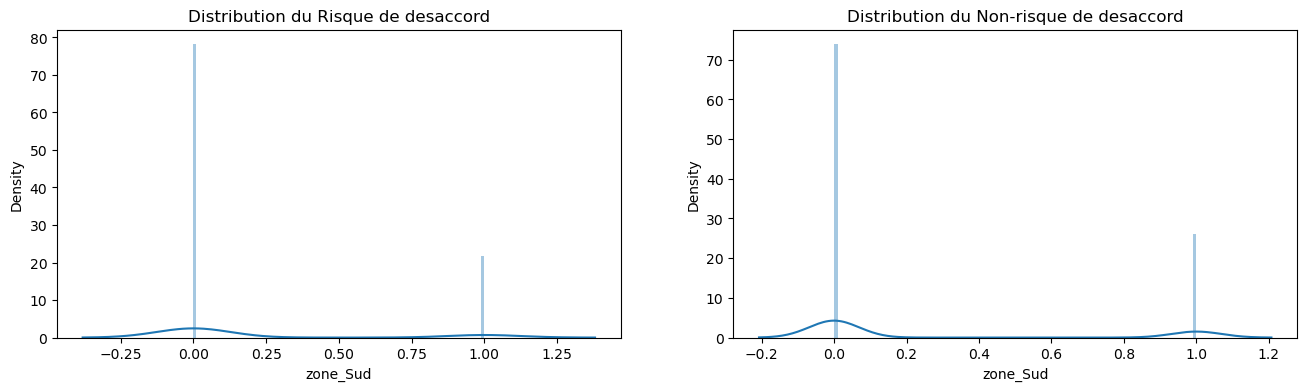

In [160]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['zone_Sud'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['zone_Sud'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

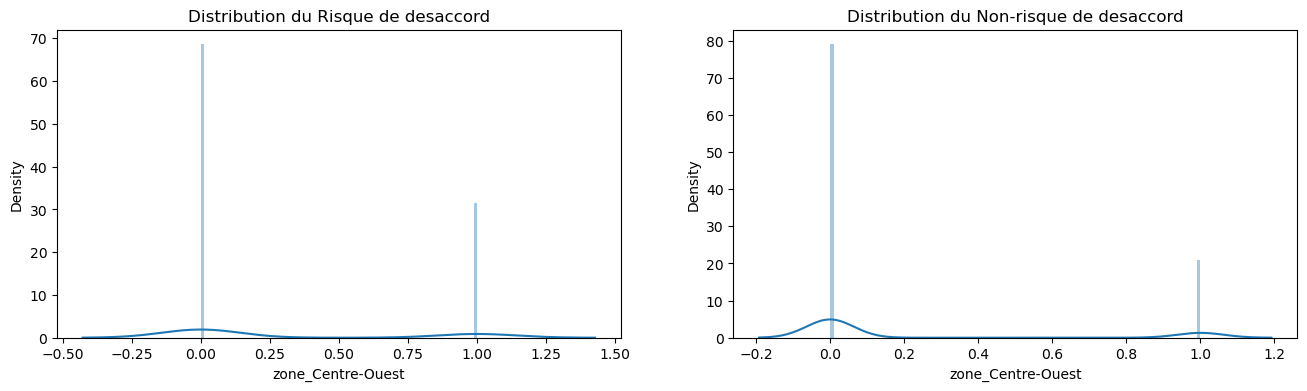

In [161]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['zone_Centre-Ouest'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['zone_Centre-Ouest'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

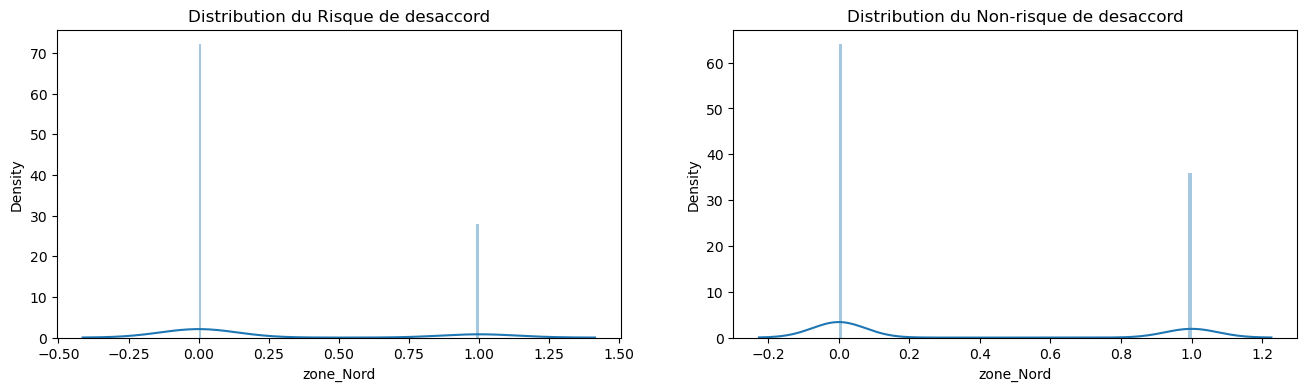

In [162]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['zone_Nord'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['zone_Nord'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

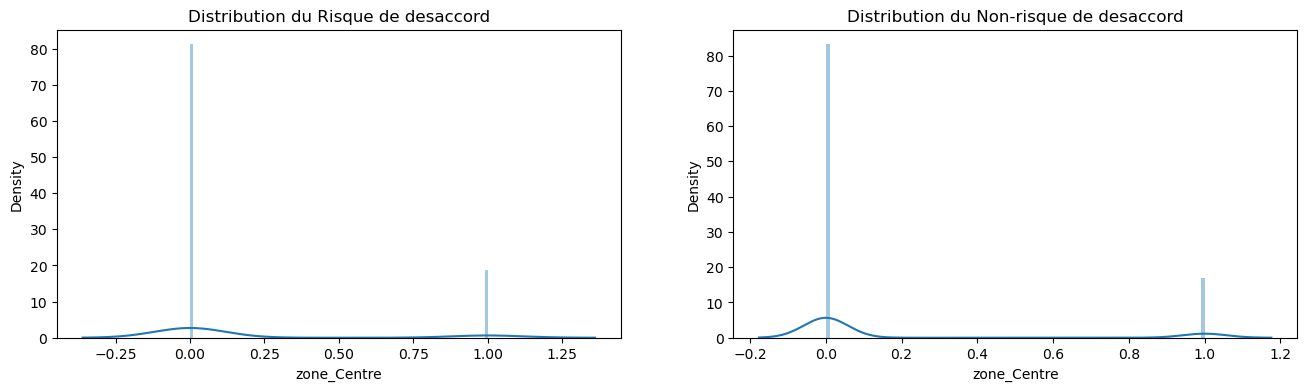

In [163]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['zone_Centre'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['zone_Centre'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

#### Crises et fertilité des sols

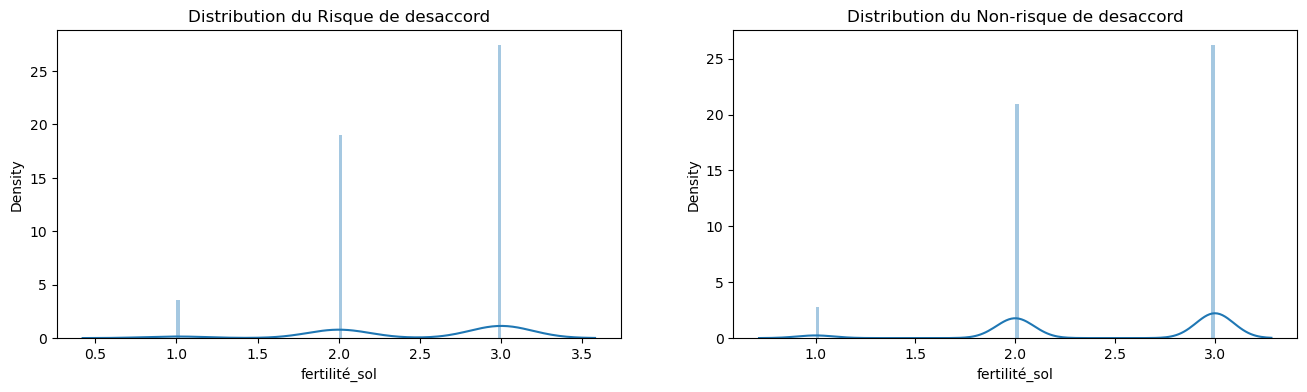

In [164]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['fertilité_sol'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['fertilité_sol'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

#### Crises et Mode d'acquisition des terres

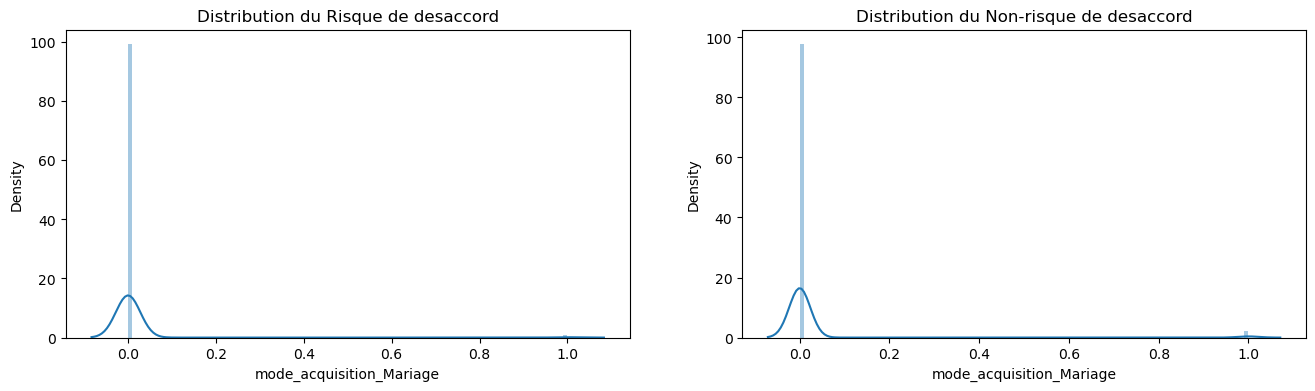

In [165]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['mode_acquisition_Mariage'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['mode_acquisition_Mariage'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

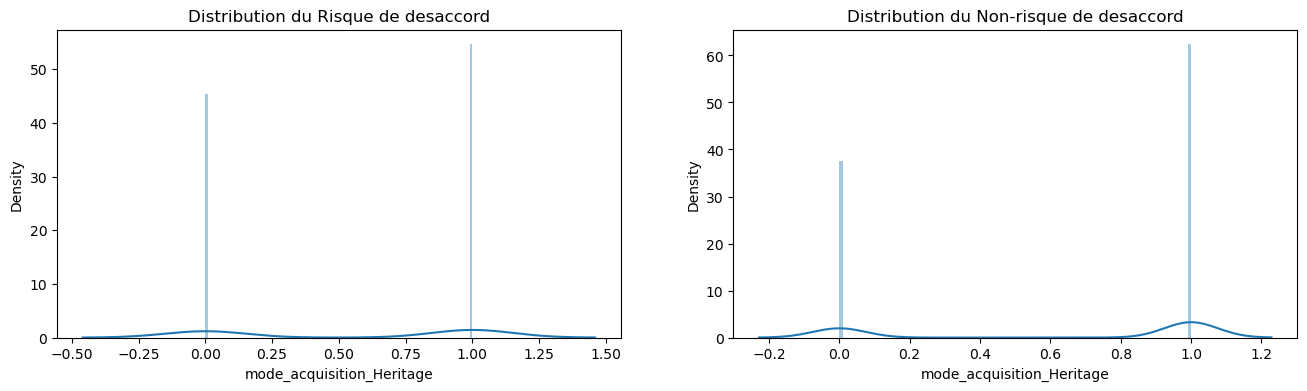

In [166]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['mode_acquisition_Heritage'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['mode_acquisition_Heritage'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

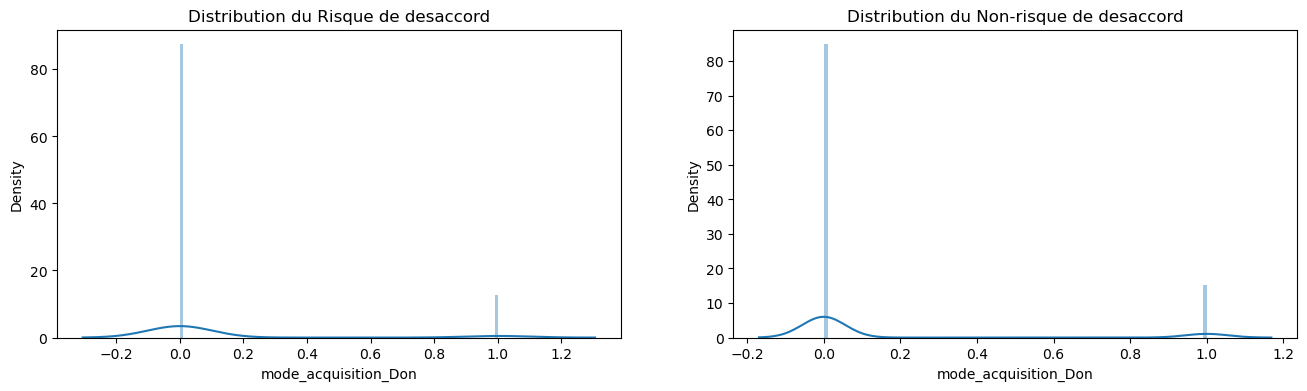

In [167]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['mode_acquisition_Don'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['mode_acquisition_Don'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

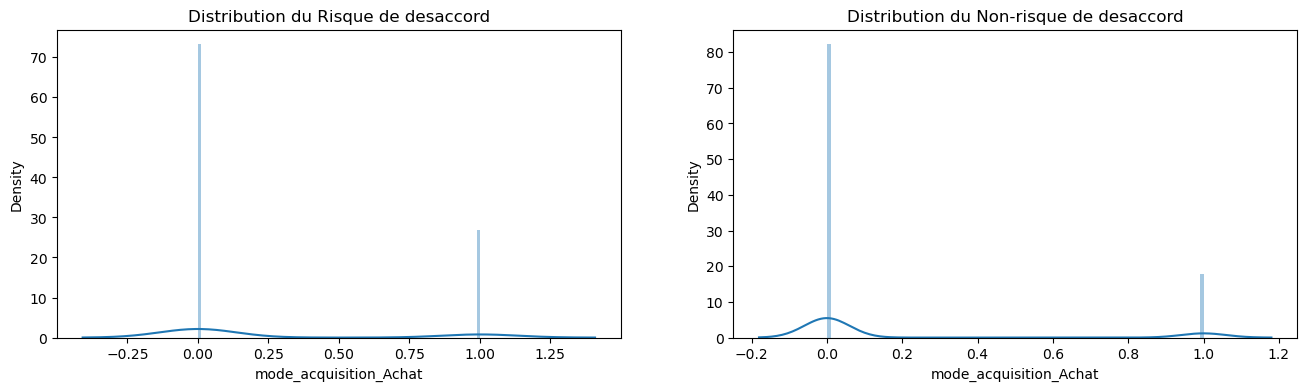

In [168]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['mode_acquisition_Achat'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['mode_acquisition_Achat'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

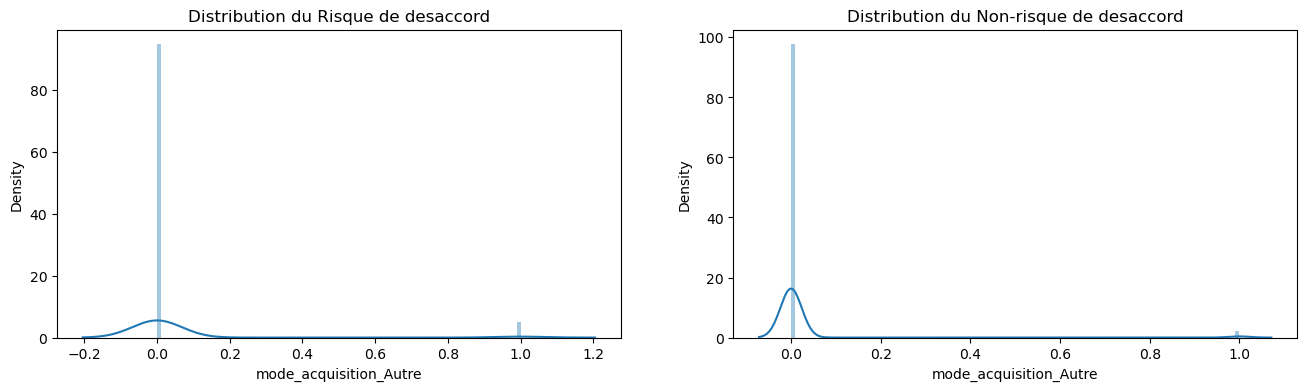

In [169]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df_result[df_result['risque_desaccord'] == 'Oui']['mode_acquisition_Autre'], bins=100, ax=axs[0])
axs[0].set_title("Distribution du Risque de desaccord")

sns.distplot(df_result[df_result['risque_desaccord'] == 'Non']['mode_acquisition_Autre'], bins=100, ax=axs[1])
axs[1].set_title("Distribution du Non-risque de desaccord")

plt.show()

### Encodage Target

In [170]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_result['risque_desaccord'] = encoder.fit_transform(df_result['risque_desaccord'])
df_result.head()

,risque_desaccord,type_sol,fertilité_sol,zone,culture,genre,age,réligion,téléphone_portable,type_branche,...,genre_Masculin,sitmat_Autres,sitmat_Célibataire,sitmat_Marié,sitmat_Union libre,nationalité_Autres,nationalité_Burkina,nationalité_CIV,Titre_Aucun,Titre_Oui
0,0,1,2,2,3,1,20,3,1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,4,3,1,2,0,53,2,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,1,3,2,3,0,18,3,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,0,3,3,3,1,26,2,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,0,2,0,3,1,32,2,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [171]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   risque_desaccord           10834 non-null  int32  
 1   type_sol                   10834 non-null  int32  
 2   fertilité_sol              10834 non-null  int64  
 3   zone                       10834 non-null  int32  
 4   culture                    10834 non-null  int64  
 5   genre                      10834 non-null  int32  
 6   age                        10834 non-null  int64  
 7   réligion                   10834 non-null  int32  
 8   téléphone_portable         10834 non-null  int32  
 9   type_branche               10834 non-null  int32  
 10  accès_internet             10834 non-null  int32  
 11  type_csp                   10834 non-null  int64  
 12  compte_bancaire            10834 non-null  int32  
 13  classe_diplome             10834 non-null  int

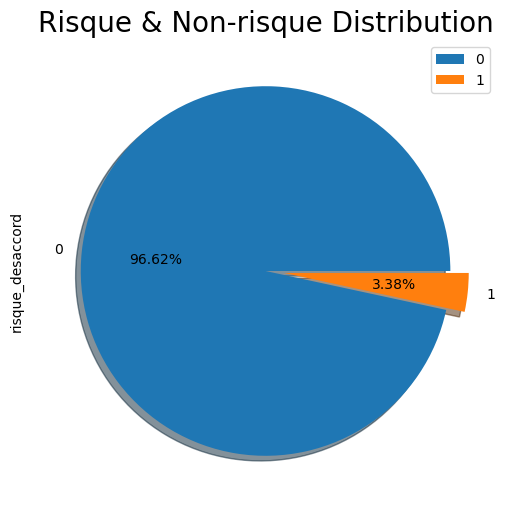

In [172]:
df_result["risque_desaccord"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.2f%%',shadow=True)
plt.title("Risque & Non-risque Distribution",fontsize=20)
plt.legend([0,1])
plt.show()

### Corrélation

In [173]:
df_result[['age','risque_desaccord']].corr()['risque_desaccord'].sort_values(ascending=False).head(10)

risque_desaccord    1.000000
age                -0.013109
Name: risque_desaccord, dtype: float64

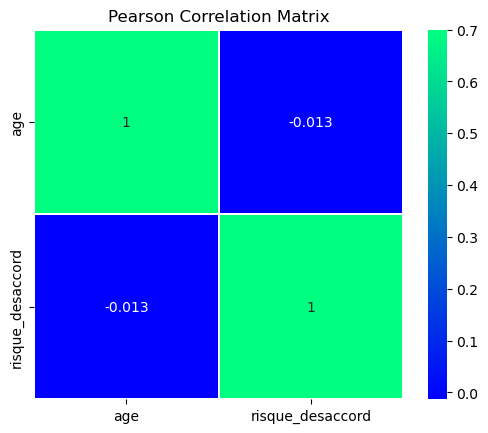

In [174]:
plt.title('Pearson Correlation Matrix')
sns.heatmap(df_result[['age','risque_desaccord']].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="winter",
            linecolor='w',annot=True);

In [175]:
df_result.corr('spearman')

,risque_desaccord,type_sol,fertilité_sol,zone,culture,genre,age,réligion,téléphone_portable,type_branche,...,genre_Masculin,sitmat_Autres,sitmat_Célibataire,sitmat_Marié,sitmat_Union libre,nationalité_Autres,nationalité_Burkina,nationalité_CIV,Titre_Aucun,Titre_Oui
risque_desaccord,1.000000,-0.005005,0.005493,-0.034247,-0.005372,0.006232,-0.012458,0.007044,0.008001,0.011070,...,0.006232,-0.011103,0.009102,0.000193,-0.007963,0.037776,0.067274,-0.079046,-0.009777,0.009777
type_sol,-0.005005,1.000000,0.049717,-0.091926,-0.061945,-0.011042,-0.004552,-0.008203,-0.010764,0.007374,...,-0.011042,0.000722,0.001392,0.002138,-0.009585,0.001567,-0.030472,0.027373,0.076087,-0.076087
fertilité_sol,0.005493,0.049717,1.000000,-0.047307,-0.064108,-0.001993,0.026332,-0.023397,0.005736,0.011548,...,-0.001993,0.016413,0.011537,-0.022532,0.010540,-0.020824,-0.046690,0.052425,-0.011154,0.011154
zone,-0.034247,-0.091926,-0.047307,1.000000,0.205872,0.071462,-0.026748,0.043995,0.061792,0.072888,...,0.071462,-0.067189,-0.043361,0.090483,-0.047654,0.071313,0.159365,-0.179047,-0.187122,0.187122
culture,-0.005372,-0.061945,-0.064108,0.205872,1.000000,0.071069,0.008923,-0.015162,0.047570,0.040191,...,0.071069,-0.066842,-0.010779,0.051199,-0.023416,0.014201,0.146559,-0.141466,-0.233392,0.233392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nationalité_Autres,0.037776,0.001567,-0.020824,0.071313,0.014201,0.010559,-0.003439,0.073402,0.002066,0.063576,...,0.010559,-0.025156,-0.013558,0.030937,-0.016547,1.000000,-0.063629,-0.392753,-0.069206,0.069206
nationalité_Burkina,0.067274,-0.030472,-0.046690,0.159365,0.146559,0.068783,-0.056891,0.111931,0.055257,-0.048599,...,0.068783,-0.050871,-0.007505,0.042065,-0.027363,-0.063629,1.000000,-0.892790,-0.317510,0.317510
nationalité_CIV,-0.079046,0.027373,0.052425,-0.179047,-0.141466,-0.068150,0.053978,-0.136278,-0.051852,0.016087,...,-0.068150,0.058233,0.013036,-0.052728,0.032685,-0.392753,-0.892790,1.000000,0.323828,-0.323828
Titre_Aucun,-0.009777,0.076087,-0.011154,-0.187122,-0.233392,-0.058364,-0.006341,0.014976,-0.074924,-0.048673,...,-0.058364,0.051286,0.003564,-0.035354,0.018863,-0.069206,-0.317510,0.323828,1.000000,-1.000000


In [176]:
df_result.corr('pearson')

,risque_desaccord,type_sol,fertilité_sol,zone,culture,genre,age,réligion,téléphone_portable,type_branche,...,genre_Masculin,sitmat_Autres,sitmat_Célibataire,sitmat_Marié,sitmat_Union libre,nationalité_Autres,nationalité_Burkina,nationalité_CIV,Titre_Aucun,Titre_Oui
risque_desaccord,1.000000,-0.001080,0.002646,-0.032781,-0.004463,0.006232,-0.013109,0.009296,0.008001,0.014539,...,0.006232,-0.011103,0.009102,0.000193,-0.007963,0.037776,0.067274,-0.079046,-0.009777,0.009777
type_sol,-0.001080,1.000000,0.030151,-0.076815,-0.044952,-0.012614,-0.005861,-0.000836,-0.002816,0.007451,...,-0.012614,-0.000119,-0.001966,0.006830,-0.012736,-0.001112,-0.026415,0.024844,0.062361,-0.062361
fertilité_sol,0.002646,0.030151,1.000000,-0.053927,-0.067602,-0.001998,0.024114,-0.007546,0.008031,0.013307,...,-0.001998,0.012798,0.011278,-0.021017,0.011726,-0.023149,-0.040164,0.047461,-0.009366,0.009366
zone,-0.032781,-0.076815,-0.053927,1.000000,0.205938,0.073148,-0.048729,0.049526,0.052413,0.067848,...,0.073148,-0.071684,-0.050733,0.100628,-0.050908,0.073135,0.159218,-0.179734,-0.184326,0.184326
culture,-0.004463,-0.044952,-0.067602,0.205938,1.000000,0.070581,0.003258,-0.000502,0.044067,0.033828,...,0.070581,-0.066835,-0.010435,0.051950,-0.026146,0.014905,0.143221,-0.138708,-0.230538,0.230538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nationalité_Autres,0.037776,-0.001112,-0.023149,0.073135,0.014905,0.010559,-0.001125,0.059985,0.002066,0.069573,...,0.010559,-0.025156,-0.013558,0.030937,-0.016547,1.000000,-0.063629,-0.392753,-0.069206,0.069206
nationalité_Burkina,0.067274,-0.026415,-0.040164,0.159218,0.143221,0.068783,-0.059723,0.100610,0.055257,-0.044013,...,0.068783,-0.050871,-0.007505,0.042065,-0.027363,-0.063629,1.000000,-0.892790,-0.317510,0.317510
nationalité_CIV,-0.079046,0.024844,0.047461,-0.179734,-0.138708,-0.068150,0.055543,-0.119790,-0.051852,0.009154,...,-0.068150,0.058233,0.013036,-0.052728,0.032685,-0.392753,-0.892790,1.000000,0.323828,-0.323828
Titre_Aucun,-0.009777,0.062361,-0.009366,-0.184326,-0.230538,-0.058364,-0.000435,-0.000476,-0.074924,-0.049121,...,-0.058364,0.051286,0.003564,-0.035354,0.018863,-0.069206,-0.317510,0.323828,1.000000,-1.000000


In [177]:
df_result.corr('kendall')

,risque_desaccord,type_sol,fertilité_sol,zone,culture,genre,age,réligion,téléphone_portable,type_branche,...,genre_Masculin,sitmat_Autres,sitmat_Célibataire,sitmat_Marié,sitmat_Union libre,nationalité_Autres,nationalité_Burkina,nationalité_CIV,Titre_Aucun,Titre_Oui
risque_desaccord,1.000000,-0.004654,0.005368,-0.031418,-0.005349,0.006232,-0.010273,0.006585,0.008001,0.011045,...,0.006232,-0.011103,0.009102,0.000193,-0.007963,0.037776,0.067274,-0.079046,-0.009777,0.009777
type_sol,-0.004654,1.000000,0.045137,-0.078542,-0.057364,-0.010268,-0.003487,-0.007148,-0.010010,0.006840,...,-0.010268,0.000672,0.001294,0.001988,-0.008913,0.001457,-0.028336,0.025454,0.070754,-0.070754
fertilité_sol,0.005368,0.045137,1.000000,-0.042245,-0.062365,-0.001947,0.021279,-0.021333,0.005605,0.011259,...,-0.001947,0.016037,0.011273,-0.022016,0.010299,-0.020347,-0.045621,0.051224,-0.010899,0.010899
zone,-0.031418,-0.078542,-0.042245,1.000000,0.188206,0.065559,-0.020048,0.029937,0.056688,0.066642,...,0.065559,-0.061639,-0.039780,0.083009,-0.043718,0.065423,0.146202,-0.164257,-0.171666,0.171666
culture,-0.005349,-0.057364,-0.062365,0.188206,1.000000,0.070764,0.007333,-0.014116,0.047367,0.039925,...,0.070764,-0.066556,-0.010733,0.050980,-0.023316,0.014140,0.145932,-0.140861,-0.232394,0.232394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nationalité_Autres,0.037776,0.001457,-0.020347,0.065423,0.014140,0.010559,-0.002836,0.068620,0.002066,0.063430,...,0.010559,-0.025156,-0.013558,0.030937,-0.016547,1.000000,-0.063629,-0.392753,-0.069206,0.069206
nationalité_Burkina,0.067274,-0.028336,-0.045621,0.146202,0.145932,0.068783,-0.046914,0.104639,0.055257,-0.048487,...,0.068783,-0.050871,-0.007505,0.042065,-0.027363,-0.063629,1.000000,-0.892790,-0.317510,0.317510
nationalité_CIV,-0.079046,0.025454,0.051224,-0.164257,-0.140861,-0.068150,0.044512,-0.127400,-0.051852,0.016050,...,-0.068150,0.058233,0.013036,-0.052728,0.032685,-0.392753,-0.892790,1.000000,0.323828,-0.323828
Titre_Aucun,-0.009777,0.070754,-0.010899,-0.171666,-0.232394,-0.058364,-0.005229,0.014000,-0.074924,-0.048561,...,-0.058364,0.051286,0.003564,-0.035354,0.018863,-0.069206,-0.317510,0.323828,1.000000,-1.000000


In [178]:
df_result.corr()

,risque_desaccord,type_sol,fertilité_sol,zone,culture,genre,age,réligion,téléphone_portable,type_branche,...,genre_Masculin,sitmat_Autres,sitmat_Célibataire,sitmat_Marié,sitmat_Union libre,nationalité_Autres,nationalité_Burkina,nationalité_CIV,Titre_Aucun,Titre_Oui
risque_desaccord,1.000000,-0.001080,0.002646,-0.032781,-0.004463,0.006232,-0.013109,0.009296,0.008001,0.014539,...,0.006232,-0.011103,0.009102,0.000193,-0.007963,0.037776,0.067274,-0.079046,-0.009777,0.009777
type_sol,-0.001080,1.000000,0.030151,-0.076815,-0.044952,-0.012614,-0.005861,-0.000836,-0.002816,0.007451,...,-0.012614,-0.000119,-0.001966,0.006830,-0.012736,-0.001112,-0.026415,0.024844,0.062361,-0.062361
fertilité_sol,0.002646,0.030151,1.000000,-0.053927,-0.067602,-0.001998,0.024114,-0.007546,0.008031,0.013307,...,-0.001998,0.012798,0.011278,-0.021017,0.011726,-0.023149,-0.040164,0.047461,-0.009366,0.009366
zone,-0.032781,-0.076815,-0.053927,1.000000,0.205938,0.073148,-0.048729,0.049526,0.052413,0.067848,...,0.073148,-0.071684,-0.050733,0.100628,-0.050908,0.073135,0.159218,-0.179734,-0.184326,0.184326
culture,-0.004463,-0.044952,-0.067602,0.205938,1.000000,0.070581,0.003258,-0.000502,0.044067,0.033828,...,0.070581,-0.066835,-0.010435,0.051950,-0.026146,0.014905,0.143221,-0.138708,-0.230538,0.230538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nationalité_Autres,0.037776,-0.001112,-0.023149,0.073135,0.014905,0.010559,-0.001125,0.059985,0.002066,0.069573,...,0.010559,-0.025156,-0.013558,0.030937,-0.016547,1.000000,-0.063629,-0.392753,-0.069206,0.069206
nationalité_Burkina,0.067274,-0.026415,-0.040164,0.159218,0.143221,0.068783,-0.059723,0.100610,0.055257,-0.044013,...,0.068783,-0.050871,-0.007505,0.042065,-0.027363,-0.063629,1.000000,-0.892790,-0.317510,0.317510
nationalité_CIV,-0.079046,0.024844,0.047461,-0.179734,-0.138708,-0.068150,0.055543,-0.119790,-0.051852,0.009154,...,-0.068150,0.058233,0.013036,-0.052728,0.032685,-0.392753,-0.892790,1.000000,0.323828,-0.323828
Titre_Aucun,-0.009777,0.062361,-0.009366,-0.184326,-0.230538,-0.058364,-0.000435,-0.000476,-0.074924,-0.049121,...,-0.058364,0.051286,0.003564,-0.035354,0.018863,-0.069206,-0.317510,0.323828,1.000000,-1.000000


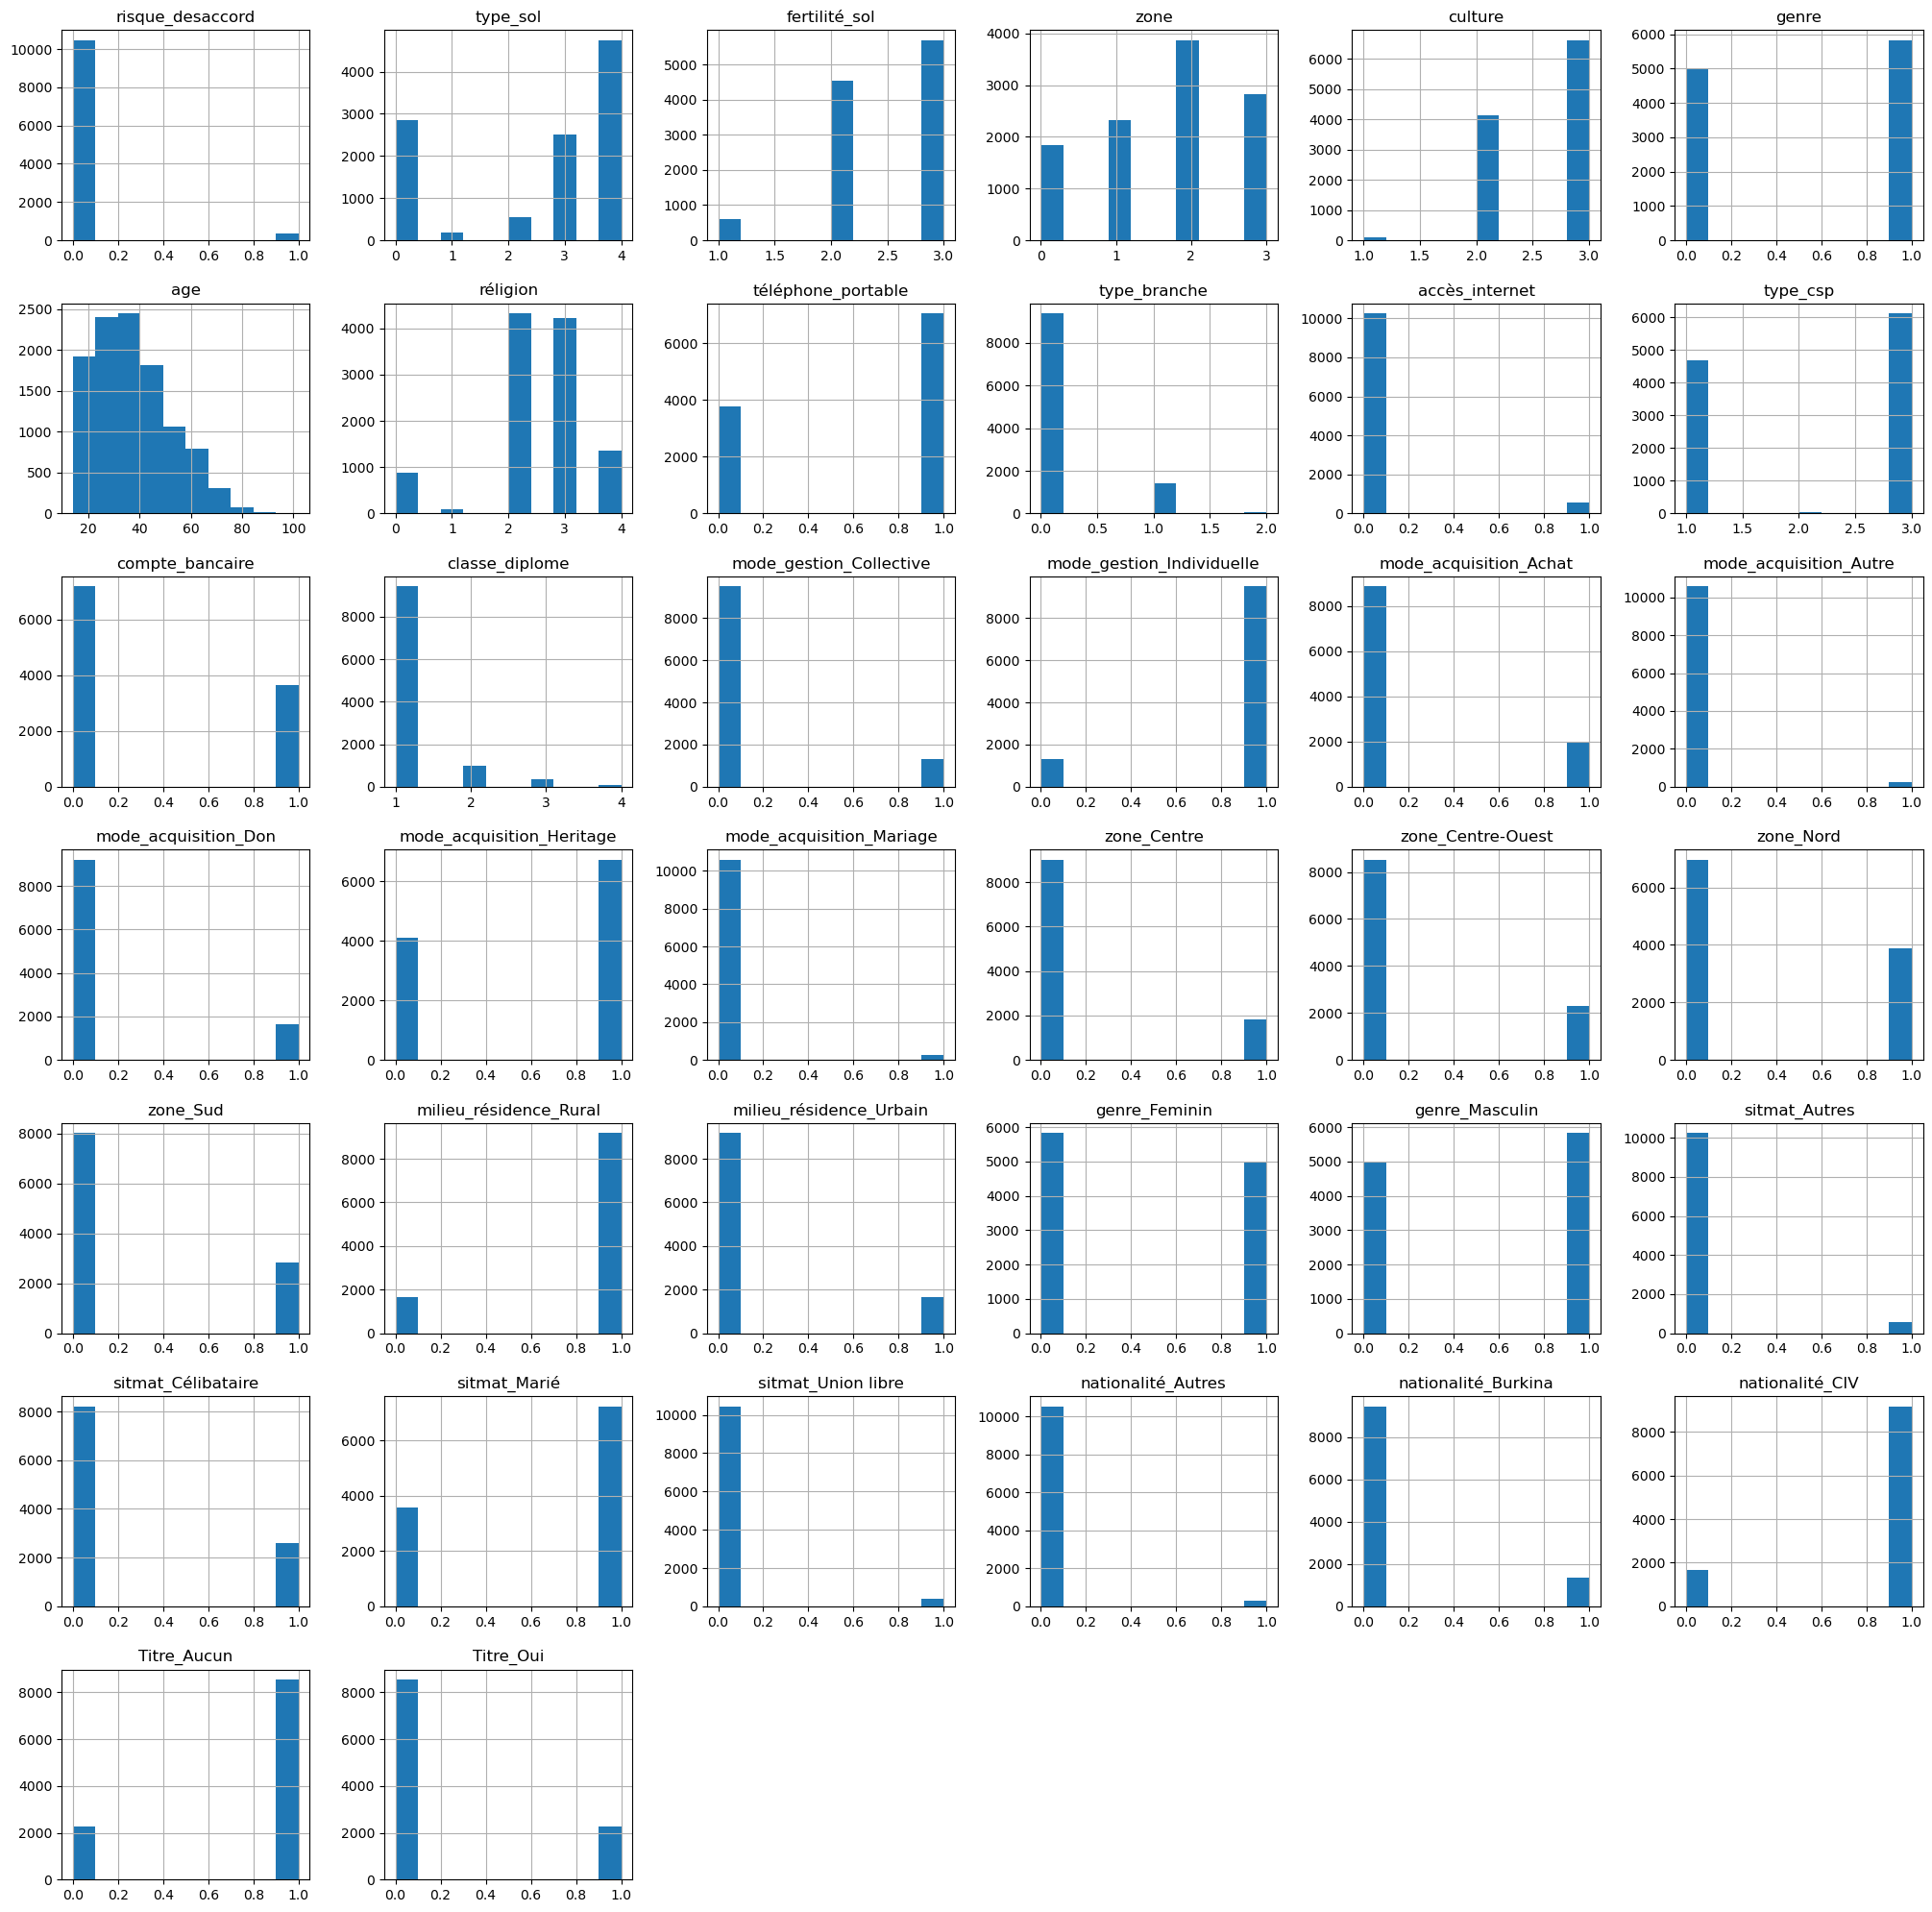

In [179]:
df_result.hist(figsize = (25,25))
plt.show()

In [180]:
df_result.head()

,risque_desaccord,type_sol,fertilité_sol,zone,culture,genre,age,réligion,téléphone_portable,type_branche,...,genre_Masculin,sitmat_Autres,sitmat_Célibataire,sitmat_Marié,sitmat_Union libre,nationalité_Autres,nationalité_Burkina,nationalité_CIV,Titre_Aucun,Titre_Oui
0,0,1,2,2,3,1,20,3,1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0,4,3,1,2,0,53,2,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0,1,3,2,3,0,18,3,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,0,3,3,3,1,26,2,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,0,2,0,3,1,32,2,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [181]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   risque_desaccord           10834 non-null  int32  
 1   type_sol                   10834 non-null  int32  
 2   fertilité_sol              10834 non-null  int64  
 3   zone                       10834 non-null  int32  
 4   culture                    10834 non-null  int64  
 5   genre                      10834 non-null  int32  
 6   age                        10834 non-null  int64  
 7   réligion                   10834 non-null  int32  
 8   téléphone_portable         10834 non-null  int32  
 9   type_branche               10834 non-null  int32  
 10  accès_internet             10834 non-null  int32  
 11  type_csp                   10834 non-null  int64  
 12  compte_bancaire            10834 non-null  int32  
 13  classe_diplome             10834 non-null  int

In [182]:
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

ss = StandardScaler() # object of the class StandardScaler ()
df_result['age_scaled'] = ss.fit_transform(df_result['age'].values.reshape(-1,1))

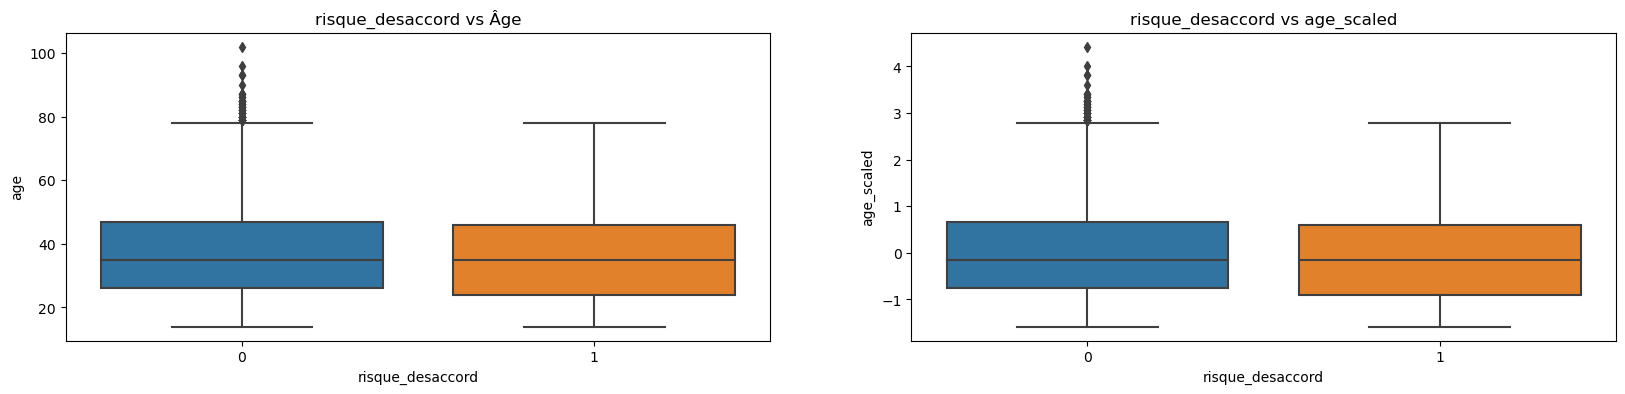

In [183]:
# Let's explore the Amount by Class and see the distribuition of Amount transactions
fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (20,4))

sns.boxplot(x ="risque_desaccord",y="age",data=df_result, ax = axs[0])
axs[0].set_title("risque_desaccord vs Âge")

sns.boxplot(x ="risque_desaccord",y="age_scaled",data=df_result, ax = axs[1])
axs[1].set_title("risque_desaccord vs age_scaled")

plt.show()

In [184]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   risque_desaccord           10834 non-null  int32  
 1   type_sol                   10834 non-null  int32  
 2   fertilité_sol              10834 non-null  int64  
 3   zone                       10834 non-null  int32  
 4   culture                    10834 non-null  int64  
 5   genre                      10834 non-null  int32  
 6   age                        10834 non-null  int64  
 7   réligion                   10834 non-null  int32  
 8   téléphone_portable         10834 non-null  int32  
 9   type_branche               10834 non-null  int32  
 10  accès_internet             10834 non-null  int32  
 11  type_csp                   10834 non-null  int64  
 12  compte_bancaire            10834 non-null  int32  
 13  classe_diplome             10834 non-null  int

## Modeling

### Split

In [185]:
# Separate Target Variable and Predictor Variables

X = df_result.drop(['risque_desaccord','age','réligion','téléphone_portable','compte_bancaire','accès_internet','zone','genre','age_scaled'], axis=1) # Features
y = df_result['risque_desaccord'] # Target

In [186]:
X.head()

,type_sol,fertilité_sol,culture,type_branche,type_csp,classe_diplome,mode_gestion_Collective,mode_gestion_Individuelle,mode_acquisition_Achat,mode_acquisition_Autre,...,genre_Masculin,sitmat_Autres,sitmat_Célibataire,sitmat_Marié,sitmat_Union libre,nationalité_Autres,nationalité_Burkina,nationalité_CIV,Titre_Aucun,Titre_Oui
0,1,2,3,0,1,1,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,4,3,2,0,3,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,3,3,1,3,1,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0,3,3,0,3,2,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,2,3,1,3,3,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [187]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   type_sol                   10834 non-null  int32  
 1   fertilité_sol              10834 non-null  int64  
 2   culture                    10834 non-null  int64  
 3   type_branche               10834 non-null  int32  
 4   type_csp                   10834 non-null  int64  
 5   classe_diplome             10834 non-null  int64  
 6   mode_gestion_Collective    10834 non-null  float64
 7   mode_gestion_Individuelle  10834 non-null  float64
 8   mode_acquisition_Achat     10834 non-null  float64
 9   mode_acquisition_Autre     10834 non-null  float64
 10  mode_acquisition_Don       10834 non-null  float64
 11  mode_acquisition_Heritage  10834 non-null  float64
 12  mode_acquisition_Mariage   10834 non-null  float64
 13  zone_Centre                10834 non-null  flo

In [188]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: risque_desaccord, dtype: int32

In [189]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=101)

In [190]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (8667, 30)
y_train -  (8667,)
X_test -  (2167, 30)
y_test -  (2167,)


##### Features Selection with Recursive Feature Elimination (RFE) 

In [191]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)

In [192]:
# perform a scikit-learn Recursive Feature Elimination (RFE)
#===========================================================================
from sklearn.feature_selection import RFE
# here we want only one final feature, we do this to produce a ranking
n_features_to_select = 1
rfe = RFE(rfc, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(max_depth=10), n_features_to_select=1)

In [193]:
# now print out the features in order of ranking
#===========================================================================
from operator import itemgetter
features = X_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 type_sol
2 nationalité_Burkina
3 mode_acquisition_Autre
4 fertilité_sol
5 type_branche
6 culture
7 classe_diplome
8 sitmat_Marié
9 type_csp
10 Titre_Aucun
11 zone_Centre-Ouest
12 milieu_résidence_Rural
13 genre_Feminin
14 mode_acquisition_Achat
15 zone_Centre
16 mode_gestion_Individuelle
17 zone_Sud
18 nationalité_CIV
19 mode_acquisition_Heritage
20 genre_Masculin
21 Titre_Oui
22 sitmat_Célibataire
23 mode_gestion_Collective
24 zone_Nord
25 milieu_résidence_Urbain
26 nationalité_Autres
27 mode_acquisition_Don
28 sitmat_Autres
29 sitmat_Union libre
30 mode_acquisition_Mariage


In [194]:
# ok, this time let's choose the top 10 featues and use them for the model
#===========================================================================
n_features_to_select = 15
rfe = RFE(rfc, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(max_depth=10), n_features_to_select=15)

In [195]:
# use the model to predict the prices for the test data
#===========================================================================
predictions = rfe.predict(X_test)

In [196]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

##### Features selection with Boruta

In [197]:
from boruta import BorutaPy

In [198]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

In [199]:
# Separate Target Variable and Predictor Variables

X = df_result.drop(['risque_desaccord','age','réligion','téléphone_portable','compte_bancaire','accès_internet','zone','genre','age_scaled'], axis=1).values # Features
y = df_result['risque_desaccord'].values # Target

In [200]:
boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=4242, max_iter = 120, perc = 90)
boruta_feature_selector.fit(X, y)

Iteration: 	1 / 120
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 120
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 120
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 120
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 120
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 120
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 120
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 120
Confirmed: 	11
Tentative: 	12
Rejected: 	7
Iteration: 	9 / 120
Confirmed: 	11
Tentative: 	12
Rejected: 	7
Iteration: 	10 / 120
Confirmed: 	11
Tentative: 	12
Rejected: 	7
Iteration: 	11 / 120
Confirmed: 	11
Tentative: 	12
Rejected: 	7
Iteration: 	12 / 120
Confirmed: 	12
Tentative: 	11
Rejected: 	7
Iteration: 	13 / 120
Confirmed: 	12
Tentative: 	10
Rejected: 	8
Iteration: 	14 / 120
Confirmed: 	12
Tentative: 	10
Rejected: 	8
Iteration: 	15 / 120
Confirmed: 	12
Tentative: 	10
Rejected: 	8
Iteration: 	16 / 120
Confirmed: 	12
Tentative: 	8
Reject

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=120, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1E5D5816A40),
         max_iter=120, n_estimators='auto', perc=90,
         random_state=RandomState(MT19937) at 0x1E5D5816A40, verbose=2)

In [201]:
X_filtered = boruta_feature_selector.transform(X)
X_filtered.shape

(10834, 14)

In [202]:
final_features = list()
indexes = np.where(boruta_feature_selector.support_ == True)
for x in np.nditer(indexes):
    final_features.append(features[x])
print(final_features)

['type_sol', 'fertilité_sol', 'culture', 'classe_diplome', 'mode_acquisition_Achat', 'mode_acquisition_Autre', 'zone_Centre-Ouest', 'zone_Nord', 'zone_Sud', 'milieu_résidence_Rural', 'milieu_résidence_Urbain', 'nationalité_Autres', 'nationalité_Burkina', 'nationalité_CIV']


#### Constitution des variables pour l'analyse

In [203]:
df_result.head()

,risque_desaccord,type_sol,fertilité_sol,zone,culture,genre,age,réligion,téléphone_portable,type_branche,...,sitmat_Autres,sitmat_Célibataire,sitmat_Marié,sitmat_Union libre,nationalité_Autres,nationalité_Burkina,nationalité_CIV,Titre_Aucun,Titre_Oui,age_scaled
0,0,1,2,2,3,1,20,3,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.176059
1,0,4,3,1,2,0,53,2,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.077646
2,0,1,3,2,3,0,18,3,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-1.312648
3,0,0,3,3,3,1,26,2,1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.766295
4,0,0,2,0,3,1,32,2,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.356530


In [204]:
df_result.columns

Index(['risque_desaccord', 'type_sol', 'fertilité_sol', 'zone', 'culture',
       'genre', 'age', 'réligion', 'téléphone_portable', 'type_branche',
       'accès_internet', 'type_csp', 'compte_bancaire', 'classe_diplome',
       'mode_gestion_Collective', 'mode_gestion_Individuelle',
       'mode_acquisition_Achat', 'mode_acquisition_Autre',
       'mode_acquisition_Don', 'mode_acquisition_Heritage',
       'mode_acquisition_Mariage', 'zone_Centre', 'zone_Centre-Ouest',
       'zone_Nord', 'zone_Sud', 'milieu_résidence_Rural',
       'milieu_résidence_Urbain', 'genre_Feminin', 'genre_Masculin',
       'sitmat_Autres', 'sitmat_Célibataire', 'sitmat_Marié',
       'sitmat_Union libre', 'nationalité_Autres', 'nationalité_Burkina',
       'nationalité_CIV', 'Titre_Aucun', 'Titre_Oui', 'age_scaled'],
      dtype='object')

In [205]:
X_E = df_result.drop(['risque_desaccord','zone','genre','mode_acquisition_Heritage', 'age', 'réligion', 'téléphone_portable', 'type_branche','accès_internet', 'type_csp', 'compte_bancaire','mode_gestion_Collective', 'mode_gestion_Individuelle', 'mode_acquisition_Autre','mode_acquisition_Don','mode_acquisition_Mariage', 'zone_Centre', 'genre_Feminin', 'genre_Masculin','sitmat_Autres', 'sitmat_Célibataire', 'sitmat_Marié','sitmat_Union libre','age_scaled'], axis=1)
X_E.head()

,type_sol,fertilité_sol,culture,classe_diplome,mode_acquisition_Achat,zone_Centre-Ouest,zone_Nord,zone_Sud,milieu_résidence_Rural,milieu_résidence_Urbain,nationalité_Autres,nationalité_Burkina,nationalité_CIV,Titre_Aucun,Titre_Oui
0,1,2,3,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,4,3,2,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,3,3,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0,3,3,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,2,3,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [206]:
y_E = df_result.drop(['type_sol', 'fertilité_sol', 'zone', 'culture',
       'genre', 'age', 'réligion', 'téléphone_portable', 'type_branche',
       'accès_internet', 'type_csp', 'compte_bancaire', 'classe_diplome',
       'mode_gestion_Collective', 'mode_gestion_Individuelle',
       'mode_acquisition_Achat', 'mode_acquisition_Autre',
       'mode_acquisition_Don', 'mode_acquisition_Heritage',
       'mode_acquisition_Mariage', 'zone_Centre', 'zone_Centre-Ouest',
       'zone_Nord', 'zone_Sud', 'milieu_résidence_Rural',
       'milieu_résidence_Urbain', 'genre_Feminin', 'genre_Masculin',
       'sitmat_Autres', 'sitmat_Célibataire', 'sitmat_Marié',
       'sitmat_Union libre', 'nationalité_Autres', 'nationalité_Burkina',
       'nationalité_CIV', 'Titre_Aucun', 'Titre_Oui', 'age_scaled'], axis=1)
y_E.head()

,risque_desaccord
0,0
1,0
2,0
3,0
4,0


### Classifier

In [207]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_E, y_E, test_size=0.20, shuffle=True, random_state=4242)

In [208]:
from lazypredict.Supervised import LazyClassifier

In [209]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

 90%|████████▉ | 26/29 [00:42<00:02,  1.05it/s]

[16:06:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [00:46<00:00,  1.61s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.70,0.61,0.61,0.80,0.05
NearestCentroid,0.70,0.60,0.60,0.79,0.06
RandomForestClassifier,0.96,0.55,0.55,0.95,1.07
BaggingClassifier,0.96,0.55,0.55,0.95,0.21
ExtraTreesClassifier,0.96,0.54,0.54,0.95,1.11
...,...,...,...,...,...
LogisticRegression,0.96,0.50,0.50,0.94,0.37
LinearDiscriminantAnalysis,0.96,0.50,0.50,0.94,0.10
DummyClassifier,0.96,0.50,0.50,0.94,0.03


In [210]:
from pivottablejs import pivot_ui

In [211]:
pivot_ui(models)

In [212]:
models.max()

Accuracy             0.96
Balanced Accuracy    0.61
ROC AUC              0.61
F1 Score             0.95
Time Taken          15.89
dtype: float64

### XG Boost Imbalanced

In [213]:
# XGBMClassifier Modeling
from xgboost import XGBClassifier

In [214]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

In [215]:
xgbc = XGBClassifier()
print(xgbc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None,
              monotone_constraints=None, n_estimators=100, n_jobs=1,
              nthread=None, num_parallel_tree=None, objective='multi:softprob',
              predictor=None, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=None, silent=None, subsample=1,
              tree_method=None, ...)

In [216]:
xgbc.fit(X_train, y_train)

[16:06:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [217]:
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.3f" % scores.mean())

[16:06:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:14] WARNING:

In [218]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.3f" % kf_cv_scores.mean())

[16:06:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:37] WARNING:

In [219]:
y_pred = xgbc.predict(X_test)
cm = confusion_matrix(y_test,y_pred) 

print(cm)

[[2083    4]
 [  77    3]]


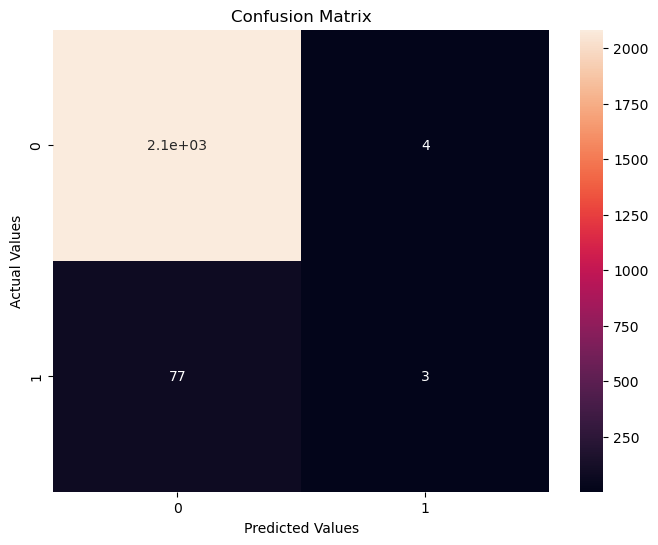

In [220]:
#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Random Forest Classifier with imbalanced data

In [221]:
from sklearn.ensemble import RandomForestClassifier

In [222]:
# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

In [223]:
# fit the model

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [224]:
# Predict the Test set results

y_pred = rfc.predict(X_test)

In [225]:
from sklearn import metrics

In [226]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2087
           1       0.54      0.09      0.15        80

    accuracy                           0.96      2167
   macro avg       0.75      0.54      0.57      2167
weighted avg       0.95      0.96      0.95      2167



In [227]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9635


In [228]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
 # print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.96354
AUC : 0.54231
Precision : 0.53846
Recall : 0.08750
F1 : 0.15054




In [229]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[2081,    6],
       [  73,    7]], dtype=int64)

In [230]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

TN:  2081
FP:  6
FN:  73
TP:  7
recall =  0.088 precision =  0.538
F1 =  0.151


In [231]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
        
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

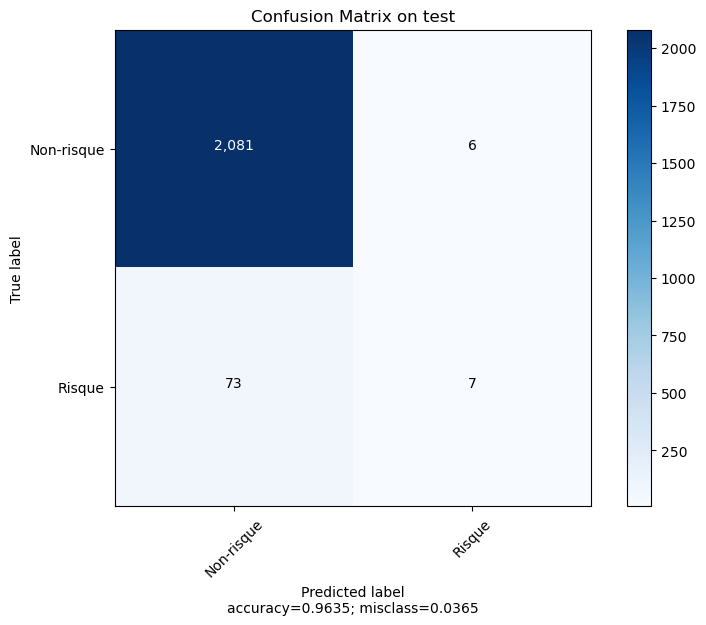

In [232]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['Non-risque', 'Risque'],
                      title        = "Confusion Matrix on test")

f1=0.151


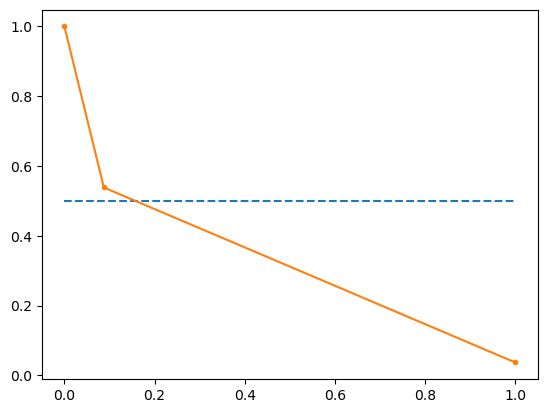

In [233]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)
print('f1=%.3f' % (f1))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

In [234]:
metrics.roc_auc_score(y_test , y_pred) 

0.5423125299472927

AUC -  0.5423125299472927 



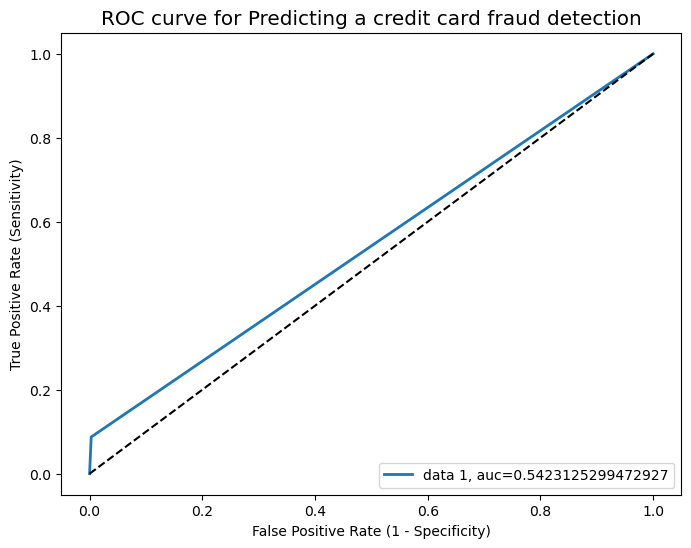

In [235]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### Logistic Regression with imbalanced data

In [236]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step

In [237]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

LogisticRegression()

In [238]:
y_pred = logreg.predict(X_test)

In [239]:
from sklearn import metrics

In [240]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2087
           1       0.00      0.00      0.00        80

    accuracy                           0.96      2167
   macro avg       0.48      0.50      0.49      2167
weighted avg       0.93      0.96      0.94      2167



In [241]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
 # print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.96308
AUC : 0.50000
Precision : 0.00000
Recall : 0.00000
F1 : 0.00000




In [242]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[2087,    0],
       [  80,    0]], dtype=int64)

In [243]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

TN:  2087
FP:  0
FN:  80
TP:  0
recall =  0.0 precision =  nan
F1 =  nan


In [244]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
        
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

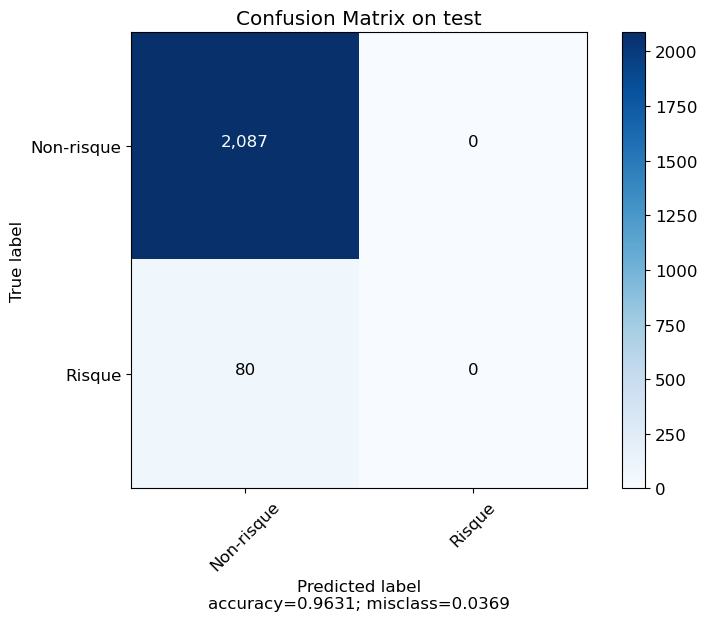

In [245]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['Non-risque', 'Risque'],
                      title        = "Confusion Matrix on test")

f1=0.000


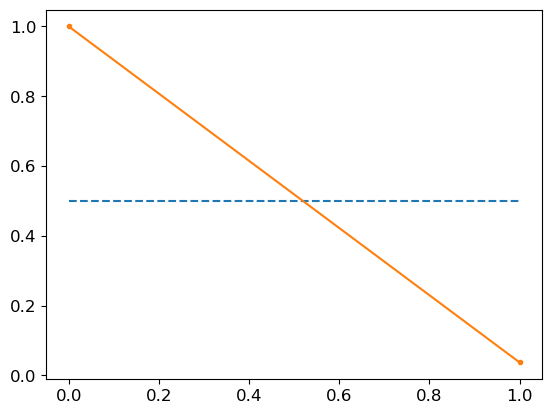

In [246]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)
print('f1=%.3f' % (f1))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

In [247]:
metrics.roc_auc_score(y_test , y_pred) 

0.5

In [248]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.95316713, 0.04683287],
       [0.97481971, 0.02518029],
       [0.99027574, 0.00972426],
       ...,
       [0.98698431, 0.01301569],
       [0.96846108, 0.03153892],
       [0.97696682, 0.02303318]])

AUC -  0.5 



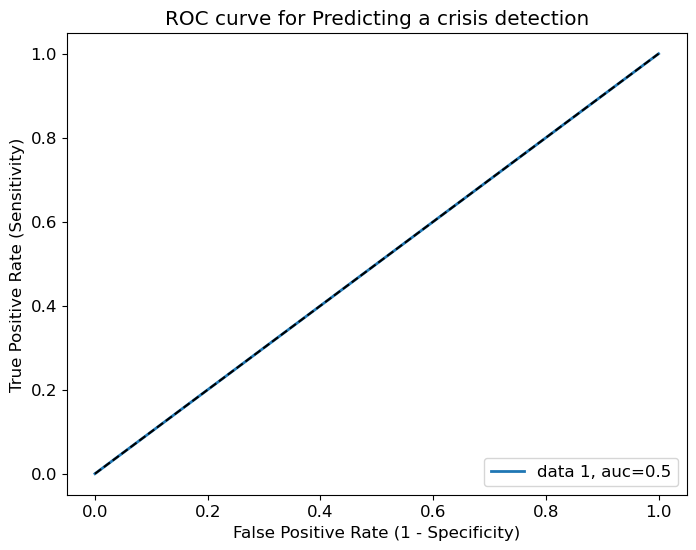

In [249]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a crisis detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### Resampling data

In [250]:
# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [251]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

In [252]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X_E, y_E, test_size=0.2, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (8667, 15)
y_train -  (8667, 1)
X_test -  (2167, 15)
y_test -  (2167, 1)


#### Undersampling data

In [253]:
# Undersampling only on train

print('Original dataset shape %s' % Counter(y_train))
random_state = 42

rus = RandomUnderSampler(random_state=random_state)
X_res, y_res = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

Original dataset shape Counter({'risque_desaccord': 1})
Resampled dataset shape Counter({'risque_desaccord': 1})
X_train -  (582, 15)
y_train -  (582, 1)
X_test -  (2167, 15)
y_test -  (2167, 1)


#### XBMC Modeling with Undersampling data

In [254]:
# XGBMClassifier Modelization
from xgboost import XGBClassifier

In [255]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

In [256]:
xgbc = XGBClassifier()
print(xgbc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None,
              monotone_constraints=None, n_estimators=100, n_jobs=1,
              nthread=None, num_parallel_tree=None, objective='multi:softprob',
              predictor=None, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=None, silent=None, subsample=1,
              tree_method=None, ...)

In [257]:
xgbc.fit(X_train, y_train)

[16:07:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [258]:
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.3f" % scores.mean())

[16:07:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:07] WARNING:

In [259]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.3f" % kf_cv_scores.mean())

[16:07:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:10] WARNING:

In [260]:
y_pred = xgbc.predict(X_test)
cm = confusion_matrix(y_test,y_pred) 

print(cm)

[[1322  770]
 [  25   50]]


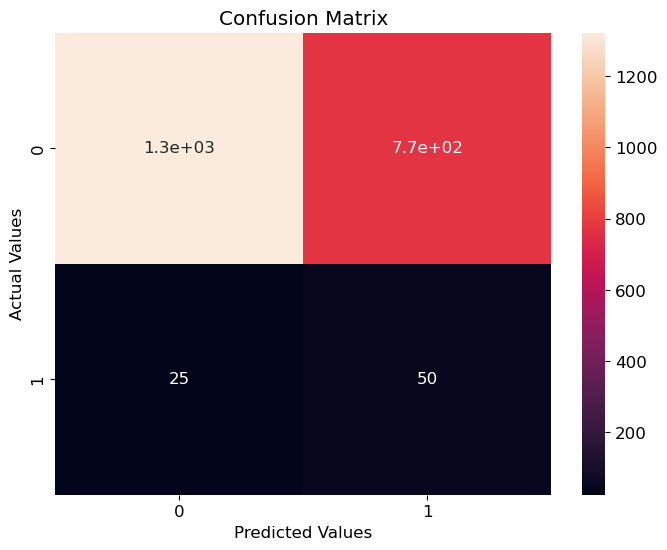

In [261]:
#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [262]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [263]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [264]:
# Apply iterative randomized search to find the best parameter values combination
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

classifier_tuned = RandomizedSearchCV(xgbc, param_distributions=params, n_iter=5, 
                                   scoring='recall', n_jobs=4, cv=skf.split(X_train,y_train), 
                                   verbose=3, random_state=0,return_train_score=False)
classifier_tuned.fit(X_train, y_train,eval_metric="aucpr")
print(classifier_tuned.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 2, 'colsample_bytree': 0.8}


In [265]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(**classifier_tuned.best_params_,use_label_encoder=False)
xgbc.fit(X_train, y_train, eval_metric="aucpr")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [266]:
y_pred = xgbc.predict(X_test)

In [267]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.98      0.80      1445
           1       0.56      0.06      0.11       722

    accuracy                           0.67      2167
   macro avg       0.62      0.52      0.45      2167
weighted avg       0.64      0.67      0.57      2167



In [268]:
xgbc = XGBClassifier(random_state=0)
xgbc.fit(X_train, y_train)
y_train_hat = xgbc.predict(X_train)
y_test_hat = xgbc.predict(X_test)

print(xgbc)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

[16:07:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Train performance
-----------------

#### Logistic Regression Undersampling

In [269]:
# Undersampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [270]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

TN:  1377
FP:  715
FN:  41
TP:  34
recall =  0.453 precision =  0.045
F1 =  0.083


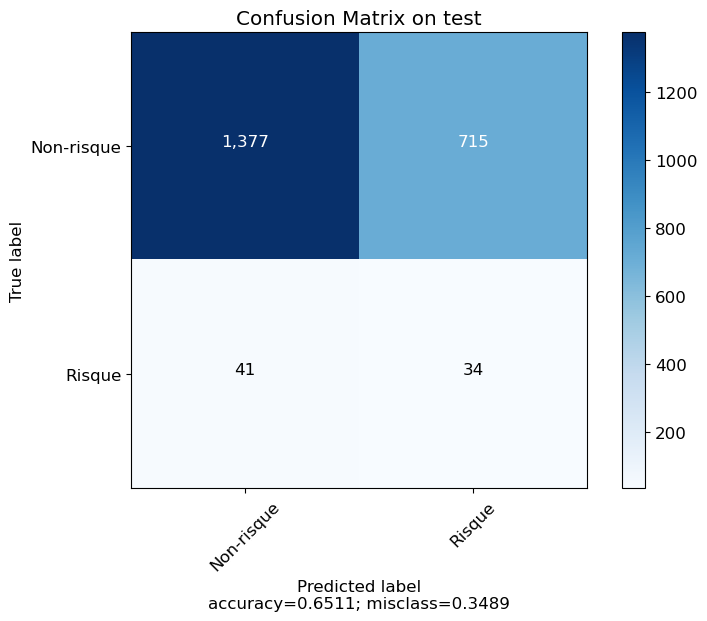

In [271]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['Non-risque', 'Risque'],
                      title        = "Confusion Matrix on test")

In [272]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.65113
AUC : 0.55578
Precision : 0.04539
Recall : 0.45333
F1 : 0.08252


f1=0.083


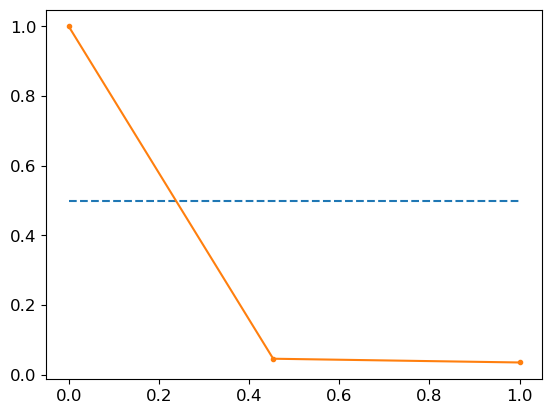

In [273]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)
print('f1=%.3f' % (f1))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

#### Random Forest Classifier with Undersampling data : Default parameters

In [274]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.6654


#### Oversampling Data

In [275]:
from imblearn.over_sampling import RandomOverSampler

In [276]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X_E, y_E, test_size=0.2, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (8667, 15)
y_train -  (8667, 1)
X_test -  (2167, 15)
y_test -  (2167, 1)


In [277]:
# Oversampling only on train

print('Original dataset shape %s' % Counter(y_train))
random_state = 42

ros = RandomOverSampler(random_state=random_state)
X_res, y_res = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

Original dataset shape Counter({'risque_desaccord': 1})
Resampled dataset shape Counter({'risque_desaccord': 1})
X_train -  (16752, 15)
y_train -  (16752, 1)
X_test -  (2167, 15)
y_test -  (2167, 1)


#### Logistic Regression with Random Oversampling technic

In [278]:
# Oversampling with Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [279]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.70143
AUC : 0.60111
Precision : 0.05728
Recall : 0.49333
F1 : 0.10264


In [280]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

TN:  1483
FP:  609
FN:  38
TP:  37
recall =  0.493 precision =  0.057
F1 =  0.103


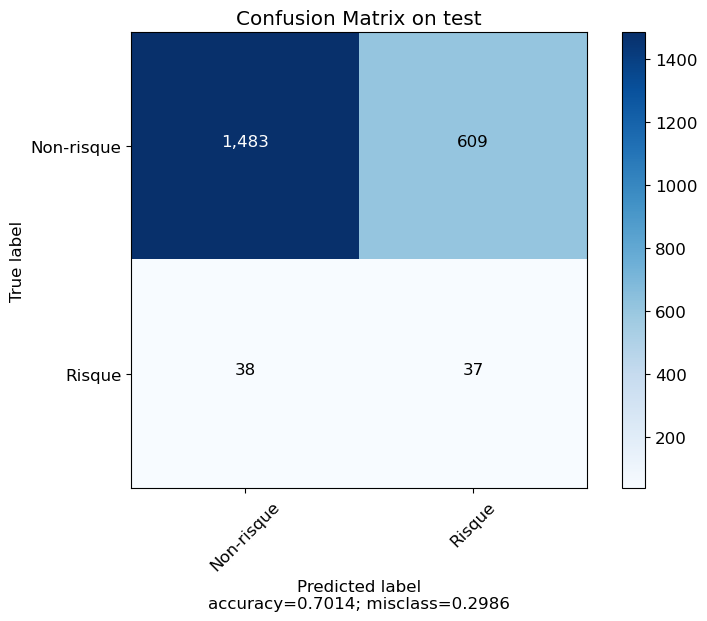

In [281]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['Non-risque', 'Risque'],
                      title        = "Confusion Matrix on test")

#### XBMC Modeling with Oversampling data

In [282]:
# XGBMClassifier Modelization
from xgboost import XGBClassifier

In [283]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

In [284]:
xgbc = XGBClassifier()
print(xgbc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None,
              monotone_constraints=None, n_estimators=100, n_jobs=1,
              nthread=None, num_parallel_tree=None, objective='multi:softprob',
              predictor=None, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=None, silent=None, subsample=1,
              tree_method=None, ...)

In [285]:
xgbc.fit(X_train, y_train)

[16:07:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [286]:
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.3f" % scores.mean())

[16:07:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:40] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:41] WARNING:

In [287]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.3f" % kf_cv_scores.mean())

[16:07:44] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:50] WARNING:

In [288]:
y_pred = xgbc.predict(X_test)
cm = confusion_matrix(y_test,y_pred) 

print(cm)

[[1716  376]
 [  31   44]]


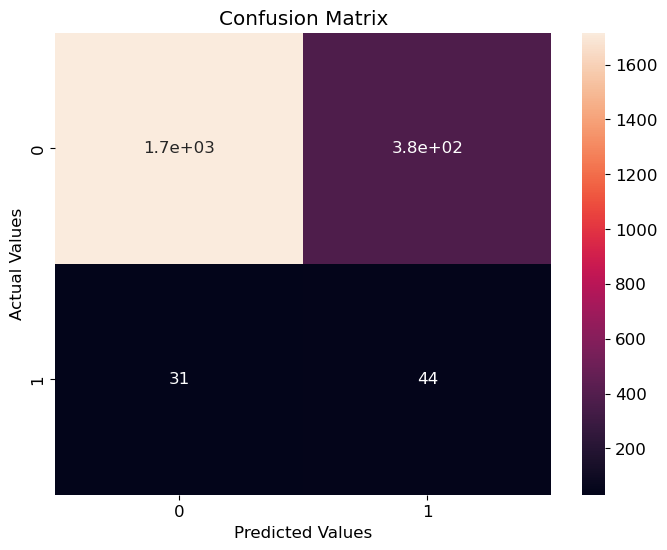

In [289]:
#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [290]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [291]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [292]:
# Apply iterative randomized search to find the best parameter values combination
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

classifier_tuned = RandomizedSearchCV(xgbc, param_distributions=params, n_iter=5, 
                                   scoring='recall', n_jobs=4, cv=skf.split(X_train,y_train), 
                                   verbose=3, random_state=0,return_train_score=False)
classifier_tuned.fit(X_train, y_train,eval_metric="aucpr")
print(classifier_tuned.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 2, 'colsample_bytree': 0.8}


In [293]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(**classifier_tuned.best_params_,use_label_encoder=False)
xgbc.fit(X_train, y_train, eval_metric="aucpr")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [294]:
y_pred = xgbc.predict(X_test)

In [295]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1698
           1       0.64      0.10      0.18       469

    accuracy                           0.79      2167
   macro avg       0.72      0.54      0.53      2167
weighted avg       0.76      0.79      0.73      2167



In [296]:
xgbc = XGBClassifier(random_state=0)
xgbc.fit(X_train, y_train)
y_train_hat = xgbc.predict(X_train)
y_test_hat = xgbc.predict(X_test)

print(xgbc)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

[16:08:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Train performance
-----------------

In [297]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

 90%|████████▉ | 26/29 [02:30<00:27,  9.23s/it]

[16:11:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [02:39<00:00,  5.51s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.80,0.71,0.71,0.86,0.82
XGBClassifier,0.81,0.70,0.70,0.87,9.01
ExtraTreesClassifier,0.81,0.70,0.70,0.87,1.46
RandomForestClassifier,0.81,0.70,0.70,0.87,1.51
ExtraTreeClassifier,0.80,0.69,0.69,0.86,0.06
...,...,...,...,...,...
KNeighborsClassifier,0.96,0.59,0.59,0.95,1.11
Perceptron,0.59,0.55,0.55,0.71,0.08
QuadraticDiscriminantAnalysis,0.81,0.51,0.51,0.87,0.13


### Smote Data

In [298]:
from imblearn.over_sampling import SMOTE, ADASYN

In [299]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X_E, y_E, test_size=0.2, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (8667, 15)
y_train -  (8667, 1)
X_test -  (2167, 15)
y_test -  (2167, 1)


In [300]:
# Smote only on train

print('Original dataset shape %s' % Counter(y_train))
random_state = 42

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

Original dataset shape Counter({'risque_desaccord': 1})
Resampled dataset shape Counter({'risque_desaccord': 1})
X_train -  (16752, 15)
y_train -  (16752, 1)
X_test -  (2167, 15)
y_test -  (2167, 1)


#### XGBoost Classifier on SMOTE data

In [301]:
# XGBMClassifier Modelization
from xgboost import XGBClassifier

In [302]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

In [303]:
xgbc = XGBClassifier()
print(xgbc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None,
              monotone_constraints=None, n_estimators=100, n_jobs=1,
              nthread=None, num_parallel_tree=None, objective='multi:softprob',
              predictor=None, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=None, silent=None, subsample=1,
              tree_method=None, ...)

In [304]:
xgbc.fit(X_train, y_train)

[16:11:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [305]:
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.3f" % scores.mean())

[16:11:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:42] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:45] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:47] WARNING:

In [306]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.3f" % kf_cv_scores.mean())

[16:11:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:56] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:59] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:12:01] WARNING:

In [307]:
y_pred = xgbc.predict(X_test)
cm = confusion_matrix(y_test,y_pred) 

print(cm)

[[1794  298]
 [  48   27]]


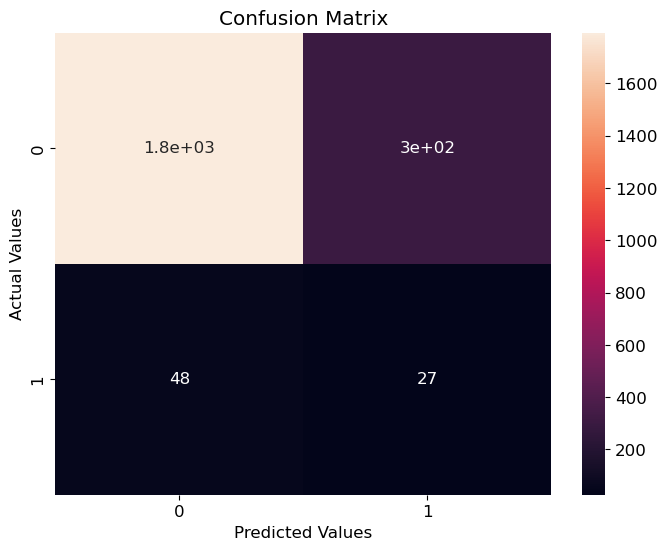

In [308]:
#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [309]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [310]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [311]:
# Apply iterative randomized search to find the best parameter values combination
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

classifier_tuned = RandomizedSearchCV(xgbc, param_distributions=params, n_iter=5, 
                                   scoring='recall', n_jobs=4, cv=skf.split(X_train,y_train), 
                                   verbose=3, random_state=0,return_train_score=False)
classifier_tuned.fit(X_train, y_train,eval_metric="aucpr")
print(classifier_tuned.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 2, 'colsample_bytree': 0.8}


In [312]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(**classifier_tuned.best_params_,use_label_encoder=False)
xgbc.fit(X_train, y_train, eval_metric="aucpr")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [313]:
y_pred = xgbc.predict(X_test)

In [314]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1815
           1       0.47      0.10      0.16       352

    accuracy                           0.84      2167
   macro avg       0.66      0.54      0.54      2167
weighted avg       0.79      0.84      0.79      2167



In [315]:
xgbc = XGBClassifier(random_state=0)
xgbc.fit(X_train, y_train)
y_train_hat = xgbc.predict(X_train)
y_test_hat = xgbc.predict(X_test)

print(xgbc)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

[16:12:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Train performance
-----------------

#### Logistic Regression with SMOTE data

In [316]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [317]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.66451
AUC : 0.60127
Precision : 0.05464
Recall : 0.53333
F1 : 0.09913


In [318]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

TN:  1400
FP:  692
FN:  35
TP:  40
recall =  0.533 precision =  0.055
F1 =  0.099


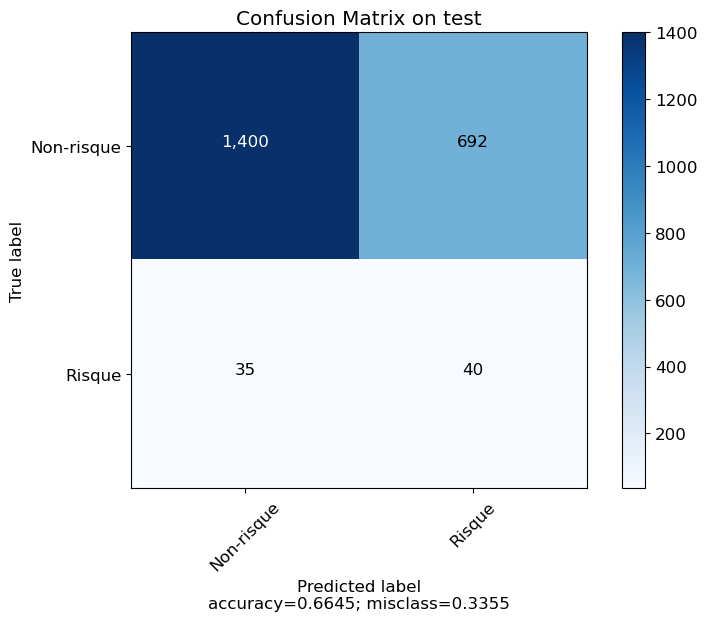

In [319]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['Non-risque', 'Risque'],
                      title        = "Confusion Matrix on test")

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

  7%|▋         | 2/29 [00:01<00:17,  1.51it/s]

### ADASYN Data

In [ ]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X_E, y_E, test_size=0.2, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

In [ ]:
# Oversampling only on train

print('Original dataset shape %s' % Counter(y_train))
random_state = 42

adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

#### XGBoost Classifier with ADASYN data

In [ ]:
# XGBMClassifier Modelization
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
xgbc = XGBClassifier()
print(xgbc)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [ ]:
xgbc.fit(X_train, y_train)

In [ ]:
scores = cross_val_score(xgbc, X_train, y_train, cv=5)
print("Mean cross-validation score: %.3f" % scores.mean())

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbc, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.3f" % kf_cv_scores.mean())

In [ ]:
y_pred = xgbc.predict(X_test)
cm = confusion_matrix(y_test,y_pred) 

print(cm)

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
# Apply iterative randomized search to find the best parameter values combination
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

classifier_tuned = RandomizedSearchCV(xgbc, param_distributions=params, n_iter=5, 
                                   scoring='recall', n_jobs=4, cv=skf.split(X_train,y_train), 
                                   verbose=3, random_state=0,return_train_score=False)
classifier_tuned.fit(X_train, y_train,eval_metric="aucpr")
print(classifier_tuned.best_params_)

In [ ]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(**classifier_tuned.best_params_,use_label_encoder=False)
xgbc.fit(X_train, y_train, eval_metric="aucpr")

In [ ]:
y_pred = xgbc.predict(X_test)

In [ ]:
print(classification_report(y_pred,y_test))

In [ ]:
xgbc = XGBClassifier(random_state=0)
xgbc.fit(X_train, y_train)
y_train_hat = xgbc.predict(X_train)
y_test_hat = xgbc.predict(X_test)

print(xgbc)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

#### Logistic Regression with ADASYN data

In [ ]:
#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [ ]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

In [ ]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

In [ ]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['Non-risque', 'Risque'],
                      title        = "Confusion Matrix on test")

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

models

### Spatial nature of class imbalance

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_reduced_pca_im = PCA(n_components=2, random_state=42).fit_transform(X_E)

In [ ]:
# Generate and plot a synthetic imbalanced classification dataset
plt.figure(figsize=(8,6))

plt.scatter(X_reduced_pca_im[:,0], X_reduced_pca_im[:,1], c=(y == 0), label='Non-risque', cmap='coolwarm', linewidths=1)
plt.scatter(X_reduced_pca_im[:,0], X_reduced_pca_im[:,1], c=(y == 1), label='Risque', cmap='coolwarm', linewidths=1)

plt.title("Scatter Plot of Imbalanced Dataset")
plt.legend()
plt.show()

## Building different models with different balanced datasets

## <a id='usdata'>1. Undersampled Data</a>

In [ ]:
# Split BEFORE any under / oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X_E, y_E, test_size=0.2, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
#print('Original dataset shape %s' % Counter(y_train))
random_state = 42

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

X_train = X_res
y_train = y_res

# Slit into train and test datasets
X_train_under, X_test_under, y_train_under, y_test_under = X_train, X_test, y_train, y_test

print("X_train_under - ",X_train_under.shape)
print("y_train_under - ",y_train_under.shape)
print("X_test_under - ",X_test_under.shape)
print("y_test_under - ",y_test_under.shape)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_under, X_test_under, y_train_under, y_test_under)

models

## <a id='osdata'>2. Oversampled Data</a>

In [ ]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X_E, y_E, test_size=0.2, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
print('Original dataset shape %s' % Counter(y_train))
random_state = 42

ros = RandomOverSampler(random_state=random_state)
X_res, y_res = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res
X_train_over, X_test_over, y_train_over, y_test_over = X_train, X_test, y_train, y_test

print("X_train_over - ",X_train_over.shape)
print("y_train_over - ",y_train_over.shape)
print("X_test_over - ",X_test_over.shape)
print("y_test_over - ",y_test_over.shape)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_over, X_test_over, y_train_over, y_test_over)

models

## <a id='smotedata'>3. SMOTE Data</a>

In [ ]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X_E, y_E, test_size=0.2, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
print('Original dataset shape %s' % Counter(y_train))
random_state = 42

smote = SMOTE(random_state=42)
X_res, y_res  = smote.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res
X_train_smote, X_test_smote, y_train_smote, y_test_smote = X_train, X_test, y_train, y_test

print("X_train_smote - ",X_train_smote.shape)
print("y_train_smote - ",y_train_smote.shape)
print("X_test_smote - ",X_test_smote.shape)
print("y_test_smote - ",y_test_smote.shape)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_smote, X_test_smote, y_train_smote, y_test_smote)

models

## <a id='SMOTE Tomek'>4. SMOTE Tomek</a>

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
# Split BEFORE any SMOTETomek sampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X_E, y_E, test_size=0.2, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
print('Original dataset shape %s' % Counter(y_train))
random_state = 42

smt = SMOTETomek(random_state=0)
X_res, y_res  = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res
X_train_tek, X_test_tek, y_train_tek, y_test_tek = X_train, X_test, y_train, y_test

print("X_train_tek - ",X_train_tek.shape)
print("y_train_tek - ",y_train_tek.shape)
print("X_test_tek - ",X_test_tek.shape)
print("y_test_tek - ",y_test_tek.shape)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_tek, X_test_tek, y_train_tek, y_test_tek)

models

## <a id='adasyndata'>5. ADASYN Data</a>

In [ ]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X_E, y_E, test_size=0.2, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
print('Original dataset shape %s' % Counter(y_train))
random_state = 42

adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = X_train, X_test, y_train, y_test

print("X_train_adasyn - ",X_train_adasyn.shape)
print("y_train_adasyn - ",y_train_adasyn.shape)
print("X_test_adasyn - ",X_test_adasyn.shape)
print("y_test_adasyn - ",y_test_adasyn.shape)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train_tek, X_test_tek, y_train_tek, y_test_tek)

models

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### Function to create the datasets for Undersampling, Oversampling, SMOTE, SMOTE Tomek, ADASYN and capture their performance

In [ ]:
names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model, X_train, X_test, y_train, y_test in models:
        
        names_lst.append(name)

        # split data in train test set
        X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test
        
        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")


### Logistic Regression (LR)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

In [ ]:
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']
## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(X_train, y_train)

In [ ]:
## Getting the best of everything. 
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

In [ ]:
logreg_grid = grid.best_estimator_
logreg_grid.score(X_train,y_train)

In [ ]:
#------------------ Logistic Regression (LR) ------------------#
LRmodels = []

#LRmodels.append(('LR imbalance', LogisticRegression(solver='liblinear', multi_class='ovr'),X,y))
LRmodels.append(('LR Undersampling', logreg_grid,X_train_under, X_test_under, y_train_under, y_test_under))
LRmodels.append(('LR Oversampling', logreg_grid,X_train_over, X_test_over, y_train_over, y_test_over))
LRmodels.append(('LR SMOTE', logreg_grid,X_train_smote, X_test_smote, y_train_smote, y_test_smote))
LRmodels.append(('LR ADASYN', logreg_grid,X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))
LRmodels.append(('LR SMOTE Tomek', logreg_grid,X_train_tek, X_test_tek, y_train_tek, y_test_tek))

# Call function to create model and measure its performance
build_measure_model(LRmodels)

### Decision Tree (DT)

In [ ]:
max_depth = range(1,30)
max_feature = [7,8,9,10,11,12,13,14,15,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
dt = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
dt.fit(X_train, y_train) 

In [ ]:
#-----------------Decision Tree (DT)------------------#
DTmodels = []

#DTmodels.append(('DT imbalance', dt,X,y))
DTmodels.append(('DT Undersampling', dt, X_train_under, X_test_under, y_train_under, y_test_under))
DTmodels.append(('DT Oversampling', dt,X_train_over, X_test_over, y_train_over, y_test_over))
DTmodels.append(('DT SMOTE', dt,X_train_smote, X_test_smote, y_train_smote, y_test_smote))
DTmodels.append(('DT ADASYN', dt ,X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))
DTmodels.append(('DT SMOTE Tomek', dt,X_train_tek, X_test_tek, y_train_tek, y_test_tek))


# Call function to create model and measure its performance
build_measure_model(DTmodels)

### Random Forest (RF)

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.20, random_state=15)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              
        }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X_train,y_train)

In [ ]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

In [ ]:
rf_grid = grid.best_estimator_
rf_grid.score(X_train,y_train)

In [ ]:
#-----------------Random Forest (RF) ------------------#
RFmodels = []

#RFmodels.append(('RF imbalance', RandomForestClassifier(),X,y))
RFmodels.append(('RF Undersampling', rf_grid,X_train_under, X_test_under, y_train_under, y_test_under))
RFmodels.append(('RF Oversampling', rf_grid,X_train_over, X_test_over, y_train_over, y_test_over))
RFmodels.append(('RF SMOTE', rf_grid,X_train_smote, X_test_smote, y_train_smote, y_test_smote))
RFmodels.append(('RF ADASYN', rf_grid,X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))
RFmodels.append(('RF SMOTE Tomek', rf_grid,X_train_tek, X_test_tek, y_train_tek, y_test_tek))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

### Bagging Classifier (BC)

In [ ]:
from sklearn.ensemble import BaggingClassifier
n_estimators = [10, 30, 50, 70, 80, 150, 160, 170, 175, 180, 185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.20, random_state=15)

parameters = {'n_estimators':n_estimators,
              
        }
grid = GridSearchCV(BaggingClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X_train,y_train)

In [ ]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

In [ ]:
bagging_grid = grid.best_estimator_
bagging_grid.score(X_train,y_train)

In [ ]:
#-----------------Bagging Classifier (BC)------------------#
BCmodels = []


BCmodels.append(('BC Undersampling', bagging_grid, X_train_under, X_test_under, y_train_under, y_test_under))
BCmodels.append(('BC Oversampling', bagging_grid,X_train_over, X_test_over, y_train_over, y_test_over))
BCmodels.append(('BC SMOTE', bagging_grid,X_train_smote, X_test_smote, y_train_smote, y_test_smote))
BCmodels.append(('BC ADASYN', bagging_grid ,X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))
BCmodels.append(('BC SMOTE Tomek', bagging_grid,X_train_tek, X_test_tek, y_train_tek, y_test_tek))

# Call function to create model and measure its performance
build_measure_model(BCmodels)

### Xtrem Gradient Boosting Classifier (XGBC)

In [ ]:
#-----------------Xtrem Gradient Boosting Classifier (XGBC)------------------#
XGBCmodels = []


XGBCmodels.append(('XGBC Undersampling', xgbc, X_train_under, X_test_under, y_train_under, y_test_under))
XGBCmodels.append(('XGBC Oversampling', xgbc,X_train_over, X_test_over, y_train_over, y_test_over))
XGBCmodels.append(('XGBC SMOTE', xgbc,X_train_smote, X_test_smote, y_train_smote, y_test_smote))
XGBCmodels.append(('XGBC ADASYN', xgbc ,X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))
XGBCmodels.append(('XGBC SMOTE Tomek', xgbc,X_train_tek, X_test_tek, y_train_tek, y_test_tek))

# Call function to create model and measure its performance
build_measure_model(XGBCmodels)

### Light GBM Classifier (LGBM)

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score
import lightgbm as lgb

In [ ]:
#-----------------Light GBM Classifier (LGBM)------------------#
LGBCmodels = []

lgbm = lgb.LGBMClassifier()

LGBCmodels.append(('LGBM Undersampling', lgbm, X_train_under, X_test_under, y_train_under, y_test_under))
LGBCmodels.append(('LGBM Oversampling', lgbm,X_train_over, X_test_over, y_train_over, y_test_over))
LGBCmodels.append(('LGBM SMOTE', lgbm,X_train_smote, X_test_smote, y_train_smote, y_test_smote))
LGBCmodels.append(('LGBM ADASYN', lgbm ,X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))
LGBCmodels.append(('LGBM SMOTE Tomek', lgbm,X_train_tek, X_test_tek, y_train_tek, y_test_tek))

# Call function to create model and measure its performance
build_measure_model(LGBCmodels)

### AdaBoost Classifier (ADA)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
n_estimators = [100,140,145,150,160, 170,175,180,185];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.20, random_state=15)
learning_r = [0.1,1,0.01,0.5]

parameters = {'n_estimators':n_estimators,
              'learning_rate':learning_r
              
        }
grid = GridSearchCV(AdaBoostClassifier(base_estimator= None, ## If None, then the base estimator is a decision tree.
                                     ),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X_train,y_train)

In [ ]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

In [ ]:
adaBoost_grid = grid.best_estimator_

In [ ]:
#-----------------AdaBoost Classifier (ADA)------------------#
ADAmodels = []

ADAmodels.append(('ADA Undersampling', adaBoost_grid, X_train_under, X_test_under, y_train_under, y_test_under))
ADAmodels.append(('ADA Oversampling', adaBoost_grid,X_train_over, X_test_over, y_train_over, y_test_over))
ADAmodels.append(('ADA SMOTE', adaBoost_grid,X_train_smote, X_test_smote, y_train_smote, y_test_smote))
ADAmodels.append(('ADA ADASYN', adaBoost_grid,X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))
ADAmodels.append(('ADA SMOTE Tomek', adaBoost_grid,X_train_tek, X_test_tek, y_train_tek, y_test_tek))

# Call function to create model and measure its performance
build_measure_model(ADAmodels)

### Extra Trees Classifier (ETC)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#-----------------Extra Trees Classifier (ETC)------------------#
ETCmodels = []

etc = ExtraTreesClassifier()

ETCmodels.append(('ETC Undersampling', adaBoost_grid, X_train_under, X_test_under, y_train_under, y_test_under))
ETCmodels.append(('ETC Oversampling', adaBoost_grid,X_train_over, X_test_over, y_train_over, y_test_over))
ETCmodels.append(('ETC SMOTE', adaBoost_grid,X_train_smote, X_test_smote, y_train_smote, y_test_smote))
ETCmodels.append(('ETC ADASYN', adaBoost_grid,X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))
ETCmodels.append(('ETC SMOTE Tomek', adaBoost_grid,X_train_tek, X_test_tek, y_train_tek, y_test_tek))

# Call function to create model and measure its performance
build_measure_model(ETCmodels)

### Gaussian Process Classifier (GPC)

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [ ]:
#-----------------Gaussian Process Classifier (GPC)------------------#
GPCmodels = []

gpc = GaussianProcessClassifier()

GPCmodels.append(('GPC Undersampling', gpc, X_train_under, X_test_under, y_train_under, y_test_under))
GPCmodels.append(('GPC Oversampling', gpc,X_train_over, X_test_over, y_train_over, y_test_over))
GPCmodels.append(('GPC SMOTE', gpc,X_train_smote, X_test_smote, y_train_smote, y_test_smote))
GPCmodels.append(('GPC ADASYN', gpc,X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))
GPCmodels.append(('GPC SMOTE Tomek', gpc,X_train_tek, X_test_tek, y_train_tek, y_test_tek))

# Call function to create model and measure its performance
build_measure_model(GPCmodels)

### Gradient Boosting Classifier (GBC)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#-----------------Gradient Boosting Classifier (GBC)------------------#
GBCmodels = []

gbc = GradientBoostingClassifier()

GBCmodels.append(('GBC Undersampling', gbc, X_train_under, X_test_under, y_train_under, y_test_under))
GBCmodels.append(('GBC Oversampling', gbc,X_train_over, X_test_over, y_train_over, y_test_over))
GBCmodels.append(('GBC SMOTE', gbc,X_train_smote, X_test_smote, y_train_smote, y_test_smote))
GBCmodels.append(('GBC ADASYN', gbc,X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))
GBCmodels.append(('GBC SMOTE Tomek', gbc,X_train_tek, X_test_tek, y_train_tek, y_test_tek))

# Call function to create model and measure its performance
build_measure_model(GBCmodels)

### K-Nearest Neighbor classifier(KNN)

In [ ]:
## Importing the model. 
from sklearn.neighbors import KNeighborsClassifier
## calling on the model oject. 
knn = KNeighborsClassifier(metric='minkowski', p=2)
## knn classifier works by doing euclidian distance 


## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, X_train,y_train, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

In [ ]:
## Search for an optimal value of k for KNN.
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train,y_train, cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print ("Mean accuracy score: {}".format(np.mean(k_scores)))

In [ ]:
from matplotlib import pyplot as plt
plt.plot(k_range, k_scores)

In [ ]:
from sklearn.model_selection import GridSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.20, random_state=15)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit(X_train,y_train)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

In [ ]:
#-----------------K-Nearest Neighbor classifier(KNN)------------------#
KNNmodels = []

knn_grid= grid.best_estimator_
knn_grid.score(X_train,y_train)

KNNmodels.append(('KNN Undersampling', knn_grid, X_train_under, X_test_under, y_train_under, y_test_under))
KNNmodels.append(('KNN Oversampling', knn_grid,X_train_over, X_test_over, y_train_over, y_test_over))
KNNmodels.append(('KNN SMOTE', knn_grid,X_train_smote, X_test_smote, y_train_smote, y_test_smote))
KNNmodels.append(('KNN ADASYN', knn_grid,X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))
KNNmodels.append(('KNN SMOTE Tomek', knn_grid,X_train_tek, X_test_tek, y_train_tek, y_test_tek))

# Call function to create model and measure its performance
build_measure_model(KNNmodels)

### Gaussian Naive Bayes Classifier (GNBC)

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(X_E, y_E)
y_pred = gaussian.predict(X_test)
gaussian_accy = round(accuracy_score(y_pred, y_test), 3)
print(gaussian_accy)

In [ ]:
#-----------------Gaussian Naive Bayes Classifier (GNBC)------------------#
GNBCmodel = []

GNBCmodel.append(('GNBC Undersampling', gaussian,X_train_under, X_test_under, y_train_under, y_test_under))
GNBCmodel.append(('GNBC Oversampling', gaussian,X_train_over, X_test_over, y_train_over, y_test_over))
GNBCmodel.append(('GNBC SMOTE', gaussian,X_train_smote, X_test_smote, y_train_smote, y_test_smote))
GNBCmodel.append(('GNBC ADASYN', gaussian,X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))
GNBCmodel.append(('GNBC SMOTE Tomek', gaussian,X_train_tek, X_test_tek, y_train_tek, y_test_tek))

# Call function to create model and measure its performance
build_measure_model(GNBCmodel)

### SVM Classifier (SVC)

from sklearn.svm import SVC
Cs = [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10] ## penality parameter C for the error term. 
gammas = [0.0001, 0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.20, random_state=15)
grid_search = GridSearchCV(SVC(kernel = 'rbf', probability=True), param_grid, cv=cv) ## 'rbf' stands for gaussian kernel
grid_search.fit(X_train,y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

#-----------------SVM Classifier (SVC) ------------------#
SVCmodel = []

svm_grid = grid_search.best_estimator_

SVCmodel.append(('SVC Undersampling', svm_grid,X_train_under, X_test_under, y_train_under, y_test_under))
SVCmodel.append(('SVC Oversampling', svm_grid,X_train_over, X_test_over, y_train_over, y_test_over))
SVCmodel.append(('SVC SMOTE', svm_grid,X_train_smote, X_test_smote, y_train_smote, y_test_smote))
SVCmodel.append(('SVC ADASYN', svm_grid,X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))
SVCmodel.append(('SVC SMOTE Tomek', svm_grid,X_train_tek, X_test_tek, y_train_tek, y_test_tek))

# Call function to create model and measure its performance
build_measure_model(SVCmodel)

## Models

In [ ]:
# Display comparison of the models performance

data = {'Model':names_lst,
       'Accuracy_Train':accuracy_train_lst,
       'Accuracy_Test':accuracy_test_lst,
       'AUC_Train':aucs_train_lst,
       'AUC_Test':aucs_test_lst,
       'PrecisionScore_Train':precision_train_lst,
       'PrecisionScore_Test':precision_test_lst,
       'RecallScore_Train':recall_train_lst,
       'RecallScore_Test':recall_test_lst,
       'F1Score_Train':f1_train_lst,
       'F1Score_Test':f1_test_lst}

print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data) 
performance_df.sort_values(['F1Score_Test'],ascending=False)

In [ ]:
performance_df.max()

In [ ]:
performance_df[performance_df.Accuracy_Train == performance_df.Accuracy_Train.max()]

In [ ]:
performance_df[performance_df.Accuracy_Test == performance_df.Accuracy_Test.max()]

In [ ]:
performance_df[performance_df.AUC_Train == performance_df.AUC_Train.max()]

In [ ]:
performance_df[performance_df.AUC_Test == performance_df.AUC_Test.max()]

### Visualization

In [ ]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)


plot_2d_space(X_rus, y_rus, 'Random under-sampling')

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [ ]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_sample(X, y)


plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

In [ ]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

## Explainbility with SHAP Value for Features importances

In [ ]:
import shap

# Explicabilité de la prédiction XGBClassifier
explainer = shap.TreeExplainer(xgbc)
shap_values = explainer.shap_values(X_train_over)
shap.initjs()

In [ ]:
# visualisation entrainement
shap.force_plot(explainer.expected_value, shap_values, X_train_over)

In [ ]:
# Visualisation
shap.summary_plot(shap_values, X_train_over)

In [ ]:
explainer = shap.TreeExplainer(xgbc)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

In [ ]:
import warnings
shap.decision_plot(expected_value, shap_value, X_train_over, ignore_warnings=True)

In [ ]:
shap.decision_plot(expected_value, shap_value, X_train_over, link='logit', ignore_warnings=True)

In [ ]:
coef = xgbc.feature_importances_
ind = np.argsort(-coef)
for i in range(X_test_over.shape[1]):
    print("%d. %s (%f)" % (i + 1, X_E.columns[ind[i]], coef[ind[i]]))
x = range(X_test_over.shape[1])
y = coef[ind][:X_E.shape[1]]
plt.title("Feature importances")
ax = plt.subplot()
plt.barh(x, y, color='red')
ax.set_yticks(x)
ax.set_yticklabels(X_E.columns[ind])
plt.gca().invert_yaxis()

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(xgbc)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of X_train rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_train_over)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values, X_train_over)